Name-Vipul Anand
Batch-DS2312
Project-Zomate Restaurant

Problem Statement-Problem statement : In this dataset predict 2 things –
1) Average Cost for two
2) Price range
So in this project we have to predict the average cost for two which is a regression task and the other problem is predicting the price range which is a classification task.
So let us proceed further

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#For this project we have to datasets and we have to megre them together
zomato_data=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Z_Restaurant/zomato.csv',encoding='latin-1')

In [3]:
country_code=pd.read_excel(R"C:\Users\vipul\Downloads\Country-Code.xlsx")

In [4]:
zomato_data.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [5]:
pd.set_option('display.max_columns',None)

In [6]:
zomato_data.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   
3                No                  No                No   
4               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   

  Rating text  Votes  
0   Excellent    314  
1   Excellent    591  
2   Very Good    270  
3   Excellent    365  
4   Excellent    229

In [7]:
country_code

Country Code         Country
0              1           India
1             14       Australia
2             30          Brazil
3             37          Canada
4             94       Indonesia
5            148     New Zealand
6            162     Phillipines
7            166           Qatar
8            184       Singapore
9            189    South Africa
10           191       Sri Lanka
11           208          Turkey
12           214             UAE
13           215  United Kingdom
14           216   United States

#Here we can see that the country code has the code along with the country and the zomato data has the country code but does not has the country name. Altough the country name will not be beneficial for our model because the code is still there and we will have to encode it anyway and we will use any one column of this only. But still the country name can be beneficial when we will do the analysis. So let us join these columns.

In [8]:
data=pd.merge(zomato_data,country_code,on='Country Code',how='inner')

In [9]:
data.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   
3                No                  No                No   
4               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   

  Rating text  Votes      Country  
0   Excellent    314  Phillipines  
1   Excellent    591  Phillipines  
2   Very Good    270  Phillipines  
3   Excellent    365  Phillipines  
4   Excellent    229  Phillipines

In [10]:
data[data.duplicated()]

Empty DataFrame
Columns: [Restaurant ID, Restaurant Name, Country Code, City, Address, Locality, Locality Verbose, Longitude, Latitude, Cuisines, Average Cost for two, Currency, Has Table booking, Has Online delivery, Is delivering now, Switch to order menu, Price range, Aggregate rating, Rating color, Rating text, Votes, Country]
Index: []

In [11]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9546    False
9547    False
9548    False
9549    False
9550    False
Length: 9551, dtype: bool

We can clearly see that the data does not has any duplicate data. So let us proceed to the analysis and do the preprocessing after that we can make our model.

In [12]:
data.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   
3                No                  No                No   
4               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   

  Rating text  Votes      Country  
0   Excellent    314  Phillipines  
1   Excellent    591  Phillipines  
2   Very Good    270  Phillipines  
3   Excellent    365  Phillipines  
4   Excellent    229  Phillipines

In [13]:
data.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

There are no null values in this column do it is a good thing.

In [14]:
data['Restaurant ID'].value_counts()

Restaurant ID
6317637     1
18254520    1
18462589    1
18336474    1
18336477    1
           ..
313059      1
763         1
7557        1
525         1
5927402     1
Name: count, Length: 9551, dtype: int64

In [ ]:
#I do not think that this columns will add any value to our model as it has all different values

<Axes: xlabel='Restaurant ID', ylabel='Average Cost for two'>

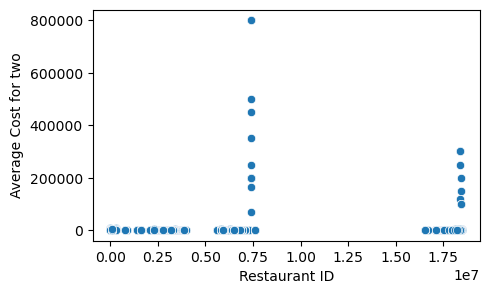

In [15]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=data['Restaurant ID'],y=data['Average Cost for two'])

In [ ]:
#Still let us do an experiment and we this if we will get a good accuracy than it is fine otherwise we can drop this.

In [16]:
data['Restaurant Name'].value_counts()

Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: count, Length: 7446, dtype: int64

In [17]:
pd.set_option('display.max_rows',None)
data['Restaurant Name'].value_counts()

Restaurant Name
Cafe Coffee Day                                           83
Domino's Pizza                                            79
Subway                                                    63
Green Chick Chop                                          51
McDonald's                                                48
Keventers                                                 34
Pizza Hut                                                 30
Giani                                                     29
Baskin Robbins                                            28
Barbeque Nation                                           26
Giani's                                                   22
Dunkin' Donuts                                            22
Barista                                                   22
Costa Coffee                                              20
Pind Balluchi                                             20
Pizza Hut Delivery                                        19
Sagar Ra

#Here we can see that the some restaurants have  many outlets but majority of them are having a single outlet. And it is not feasible to use these many unique columns in our data. So we will group them together.

In [18]:
data.head(2)

Restaurant ID   Restaurant Name  Country Code         City  \
0        6317637  Le Petit Souffle           162  Makati City   
1        6304287  Izakaya Kikufuji           162  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   

                     Cuisines  Average Cost for two          Currency  \
0  French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                    Japanese                  1200  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   

  Rating text  Votes      Country  
0   Excellent    314  Phillipines  
1   Excellent    591  Phillipines

In [19]:
data.groupby(['Restaurant Name'])['Average Cost for two'].mean()

Restaurant Name
 Let's Burrrp                                                400.000000
#45                                                          600.000000
#Dilliwaala6                                                 800.000000
#InstaFreeze                                                 300.000000
#OFF Campus                                                  800.000000
#Urban Cafí©                                                 650.000000
#hashtag                                                     500.000000
'Ohana                                                        45.000000
10 Downing Street                                           1250.000000
10 To 10 In Delhi                                             20.000000
11th Avenue Cafe Bistro                                      400.000000
12212                                                        400.000000
13 Cafe                                                      500.000000
145 Kala Ghoda                                  

In [43]:
#SO here we have to other option than just to group the restaurants on the basis of the outlets they have.
data['Restaurant Name'].value_counts().sort_values(ascending=False)

Restaurant Name
Cafe Coffee Day                                           83
Domino's Pizza                                            79
Subway                                                    63
Green Chick Chop                                          51
McDonald's                                                48
Keventers                                                 34
Pizza Hut                                                 30
Giani                                                     29
Baskin Robbins                                            28
Barbeque Nation                                           26
Barista                                                   22
Dunkin' Donuts                                            22
Giani's                                                   22
Costa Coffee                                              20
Pind Balluchi                                             20
Pizza Hut Delivery                                        19
Sagar Ra

In [20]:
restaurant=data['Restaurant Name'].value_counts()

In [21]:
restaurant

Restaurant Name
Cafe Coffee Day                                           83
Domino's Pizza                                            79
Subway                                                    63
Green Chick Chop                                          51
McDonald's                                                48
Keventers                                                 34
Pizza Hut                                                 30
Giani                                                     29
Baskin Robbins                                            28
Barbeque Nation                                           26
Giani's                                                   22
Dunkin' Donuts                                            22
Barista                                                   22
Costa Coffee                                              20
Pind Balluchi                                             20
Pizza Hut Delivery                                        19
Sagar Ra

In [22]:
restaurant['Cafe Coffee Day']

83

In [23]:
#So we will be grouping the restaurants on the basis of their outlets.
def restautant_group(value):
    if restaurant[value] in range(20,90):
        return 'rest1'
    if restaurant[value] in range(5,20):
        return 'rest2'
    if restaurant[value] in range(3,5):
        return 'rest3'
    if restaurant[value] in range(1,3):
        return 'rest4'

In [24]:
pd.set_option('display.max_rows',15)

In [25]:
data['Restaurant Name'].value_counts()

Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: count, Length: 7446, dtype: int64

#Most of the columns here are having a value count of one. And grouping them will create a very big blunder and imbalace
So we can do other thing change this columns into a continous columns and replace the columns with their respective value counts. We can later transform the column if outlier is there.

In [26]:
data['Restaurant Name'].value_counts()

Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: count, Length: 7446, dtype: int64

In [33]:
def restaurant_column(value):
    return restaurant[value]

In [35]:
restaurant=data['Restaurant Name'].value_counts()

In [36]:
restaurant['Cafe Coffee Day']

83

In [34]:
def name(value):
    return restaurant[value]

In [37]:
name=data['Restaurant Name'].apply(name)

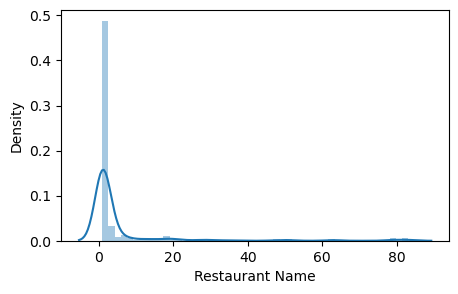

In [38]:
#Let us see the distribution
plt.figure(figsize=(5,3))
sns.distplot(name)
plt.show()

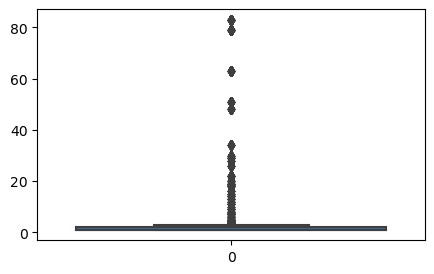

In [39]:
plt.figure(figsize=(5,3))
sns.boxplot(name)
plt.show()

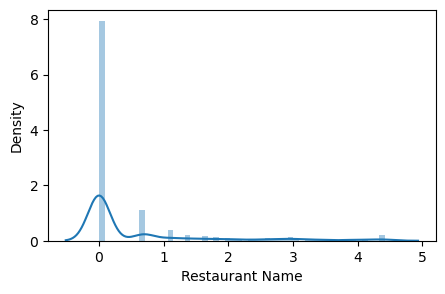

In [40]:
#FUll of outliers
plt.figure(figsize=(5,3))
sns.distplot(np.log(name))
plt.show()

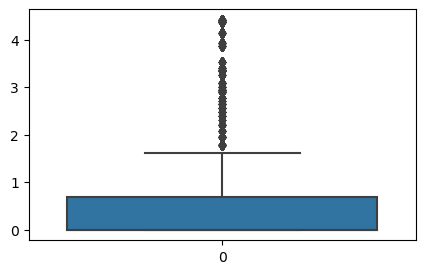

In [41]:
plt.figure(figsize=(5,3))
sns.boxplot(np.log(name))
plt.show()

In [42]:
#Now less outliers are there . let us see with the help of power transformer
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

In [43]:
pt.fit_transform([name])

array([[0., 0., 0., ..., 0., 0., 0.]])

In [44]:
name.value_counts()

Restaurant Name
1     6712
2      936
3      324
4      184
5      140
      ... 
29      29
28      28
26      26
15      15
10      10
Name: count, Length: 30, dtype: int64

In [45]:
name=pd.DataFrame(name.values,columns=['Outlet_number'])

In [46]:
name['Outlet_number'].value_counts()

Outlet_number
1     6712
2      936
3      324
4      184
5      140
      ... 
29      29
28      28
26      26
15      15
10      10
Name: count, Length: 30, dtype: int64

In [47]:
pt = PowerTransformer(method='box-cox')
transformed_data = pt.fit_transform(name[['Outlet_number']])

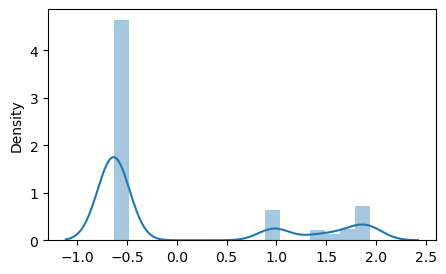

In [48]:
plt.figure(figsize=(5,3))
sns.distplot(transformed_data)
plt.show()

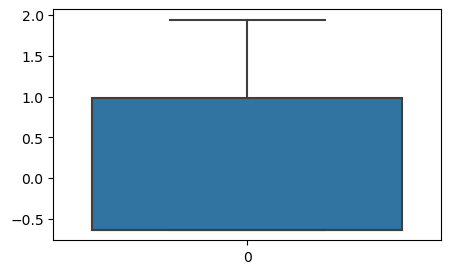

In [49]:
plt.figure(figsize=(5,3))
sns.boxplot(transformed_data)
plt.show()

In [50]:
transformed_data=pd.DataFrame(transformed_data,columns=['Transformed_outletno'])
transformed_data

Transformed_outletno
0                -0.634799
1                -0.634799
2                -0.634799
3                -0.634799
4                -0.634799
...                    ...
9546             -0.634799
9547             -0.634799
9548             -0.634799
9549             -0.634799
9550             -0.634799

[9551 rows x 1 columns]

In [128]:
#Here not outliers are there at all so we can use it

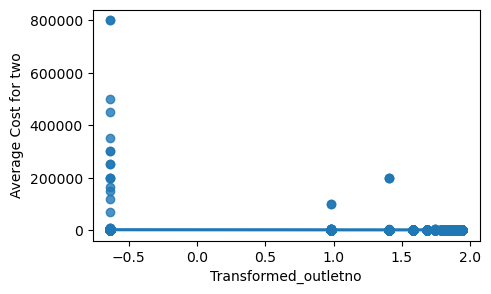

In [51]:
plt.figure(figsize=(5,3))
sns.regplot(x=transformed_data['Transformed_outletno'],y=data['Average Cost for two'])
plt.show()

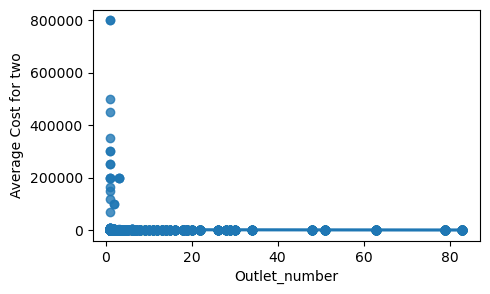

In [52]:
plt.figure(figsize=(5,3))
sns.regplot(x=name['Outlet_number'],y=data['Average Cost for two'])
plt.show()

#We should move ahead with the transformed outlet number because of the fact that it has no outlier and the relation with the
label is also not that much affected

In [53]:
data.head(2)

Restaurant ID   Restaurant Name  Country Code         City  \
0        6317637  Le Petit Souffle           162  Makati City   
1        6304287  Izakaya Kikufuji           162  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   

                     Cuisines  Average Cost for two          Currency  \
0  French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                    Japanese                  1200  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   

  Rating text  Votes      Country  
0   Excellent    314  Phillipines  
1   Excellent    591  Phillipines

In [54]:
data['Transformed_outler_no']=transformed_data['Transformed_outletno']

In [55]:
data.head(2)

Restaurant ID   Restaurant Name  Country Code         City  \
0        6317637  Le Petit Souffle           162  Makati City   
1        6304287  Izakaya Kikufuji           162  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   

                     Cuisines  Average Cost for two          Currency  \
0  French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                    Japanese                  1200  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   

  Rating text  Votes      Country  Transformed_outler_no  
0   Excellent    314  Phillipines              -0.634799  
1   Excellent    591  Phillipines              -0.634799

#We will delete the restautant name later on
So we have changed the restautant name to the number of outlets it has

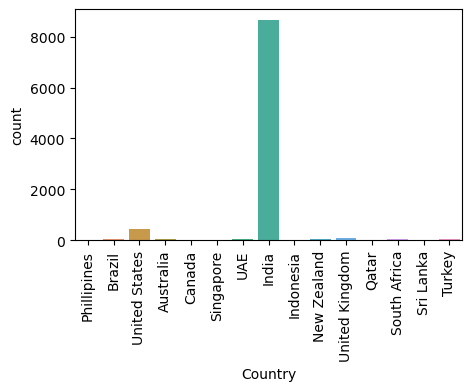

In [56]:
plt.figure(figsize=(5,3))
sns.countplot(x=data['Country'])
plt.xticks(rotation=90)
plt.show()

In [57]:
data['Country'].value_counts()

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

So here most of the country are from india and some from us others have a very little value counts so we will group the remaining together.

In [58]:
def country(value):
    if value in ['India','United States']:
        return value
    else:
        return 'others'

In [59]:
data['Country'].apply(country).value_counts()

Country
India            8652
others            465
United States     434
Name: count, dtype: int64

In [60]:
data['Country']=data['Country'].apply(country)
data['Country'].value_counts()

Country
India            8652
others            465
United States     434
Name: count, dtype: int64

In [61]:
#Doing the same for the country code
data['Country Code'].value_counts()

Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64

In [62]:
def country_code(value):
    if value in [1,216]:
        return value
    else:
        return 'others'

In [63]:
data['Country Code'].apply(country_code).value_counts()

Country Code
1         8652
others     465
216        434
Name: count, dtype: int64

In [64]:
data['Country Code']=data['Country Code'].apply(country_code)
data['Country Code'].value_counts()

Country Code
1         8652
others     465
216        434
Name: count, dtype: int64

In [65]:
#Let us encode this and after that we will use the country column for the analysis
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
one_hot=OneHotEncoder(sparse=False)
lab_enc=LabelEncoder()

In [66]:
data['Country Code']=data['Country Code'].astype('str')

In [67]:
one_hot.fit_transform(data[['Country Code']])

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [68]:
data['Country Code'].value_counts()

Country Code
1         8652
others     465
216        434
Name: count, dtype: int64

In [69]:
a=one_hot.fit_transform(data[['Country Code']])
a=pd.DataFrame(a,columns=['code1','code2','code3'])
data=pd.concat([a,data],axis=1)
data=data.drop(columns='Country Code')
data.head()

code1  code2  code3  Restaurant ID         Restaurant Name  \
0    0.0    0.0    1.0        6317637        Le Petit Souffle   
1    0.0    0.0    1.0        6304287        Izakaya Kikufuji   
2    0.0    0.0    1.0        6300002  Heat - Edsa Shangri-La   
3    0.0    0.0    1.0        6318506                    Ooma   
4    0.0    0.0    1.0        6314302             Sambo Kojin   

               City                                            Address  \
0       Makati City  Third Floor, Century City Mall, Kalayaan Avenu...   
1       Makati City  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Mandaluyong City  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Mandaluyong City  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Mandaluyong City  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   
3                No                  No                No   
4               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   

  Rating text  Votes Country  Transformed_outler_no  
0   Excellent    314  others              -0.634799  
1   Excellent    591  others              -0.634799  
2   Very Good    270  others              -0.634799  
3   Excellent    365  others              -0.634799  
4   Excellent    229  others              -0.634799

In [70]:
data['Country'].value_counts()

Country
India            8652
others            465
United States     434
Name: count, dtype: int64

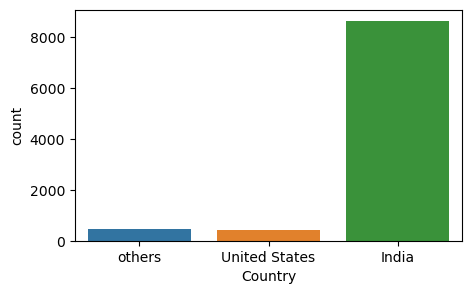

In [71]:
plt.figure(figsize=(5,3))
sns.countplot(x=data['Country'])
plt.show()

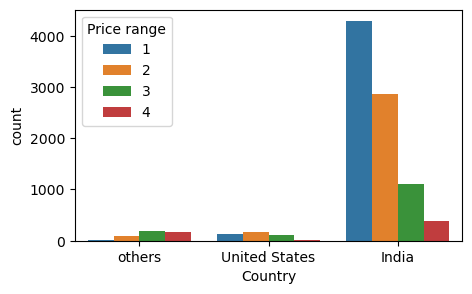

In [72]:
plt.figure(figsize=(5,3))
sns.countplot(x=data['Country'],hue=data['Price range'])
plt.show()

<Figure size 500x300 with 0 Axes>

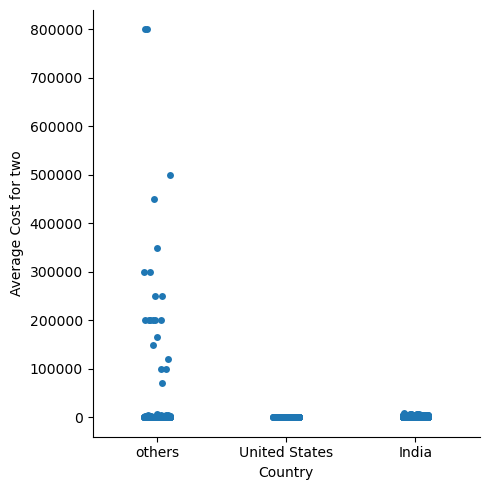

In [73]:
plt.figure(figsize=(5,3))
sns.catplot(x=data['Country'],y=data['Average Cost for two'])
plt.show()

The indian restaurants seem to have very high price for some of the restaurants

In [74]:
data.head()

code1  code2  code3  Restaurant ID         Restaurant Name  \
0    0.0    0.0    1.0        6317637        Le Petit Souffle   
1    0.0    0.0    1.0        6304287        Izakaya Kikufuji   
2    0.0    0.0    1.0        6300002  Heat - Edsa Shangri-La   
3    0.0    0.0    1.0        6318506                    Ooma   
4    0.0    0.0    1.0        6314302             Sambo Kojin   

               City                                            Address  \
0       Makati City  Third Floor, Century City Mall, Kalayaan Avenu...   
1       Makati City  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Mandaluyong City  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Mandaluyong City  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Mandaluyong City  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   
3                No                  No                No   
4               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   

  Rating text  Votes Country  Transformed_outler_no  
0   Excellent    314  others              -0.634799  
1   Excellent    591  others              -0.634799  
2   Very Good    270  others              -0.634799  
3   Excellent    365  others              -0.634799  
4   Excellent    229  others              -0.634799

In [75]:
data['City'].value_counts()

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
                ... 
Huskisson          1
Panchkula          1
Forrest            1
Flaxton            1
Chatham-Kent       1
Name: count, Length: 141, dtype: int64

In [76]:
data['City'].isna().sum()

0

In [77]:
pd.set_option('display.max_rows',None)

In [78]:
data['City'].value_counts()

City
New Delhi                 5473
Gurgaon                   1118
Noida                     1080
Faridabad                  251
Ghaziabad                   25
Bhubaneshwar                21
Guwahati                    21
Amritsar                    21
Lucknow                     21
Ahmedabad                   21
Rio de Janeiro              20
Patna                       20
Mumbai                      20
Mysore                      20
Nagpur                      20
Nashik                      20
Chennai                     20
Pretoria                    20
Puducherry                  20
Sí£o Paulo                  20
Pune                        20
Ranchi                      20
Aurangabad                  20
Surat                       20
Vadodara                    20
Varanasi                    20
Mangalore                   20
Ludhiana                    20
Colombo                     20
Kolkata                     20
Kochi                       20
Kanpur                      20
Jai

I think instead of grouping this which will create a hell lot of imbalance we can replace them with their value counts so that similar city will have similar number and we will not loose any information.

In [79]:
city=data['City'].value_counts()
city=pd.DataFrame(city.values,columns=['city_count'])

In [80]:
city['city_count'].value_counts()

city_count
20      67
1       46
2        8
21       5
18       2
4        2
3        2
5473     1
1118     1
1080     1
251      1
25       1
16       1
14       1
11       1
6        1
Name: count, dtype: int64

<Axes: xlabel='city_count', ylabel='Density'>

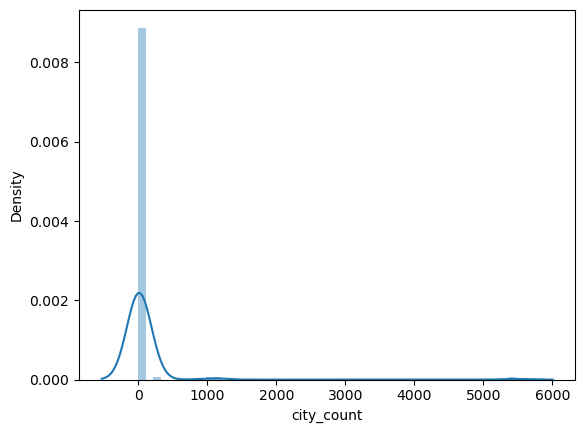

In [81]:
sns.distplot(city['city_count'])

<Axes: >

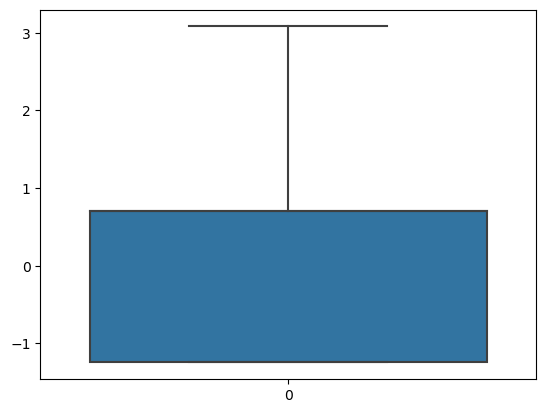

In [82]:
sns.boxplot(pt.fit_transform(city[['city_count']]))

In [83]:
city_count=data['City'].value_counts()
city_count

City
New Delhi                 5473
Gurgaon                   1118
Noida                     1080
Faridabad                  251
Ghaziabad                   25
Bhubaneshwar                21
Guwahati                    21
Amritsar                    21
Lucknow                     21
Ahmedabad                   21
Rio de Janeiro              20
Patna                       20
Mumbai                      20
Mysore                      20
Nagpur                      20
Nashik                      20
Chennai                     20
Pretoria                    20
Puducherry                  20
Sí£o Paulo                  20
Pune                        20
Ranchi                      20
Aurangabad                  20
Surat                       20
Vadodara                    20
Varanasi                    20
Mangalore                   20
Ludhiana                    20
Colombo                     20
Kolkata                     20
Kochi                       20
Kanpur                      20
Jai

In [84]:
data.head(2)

code1  code2  code3  Restaurant ID   Restaurant Name         City  \
0    0.0    0.0    1.0        6317637  Le Petit Souffle  Makati City   
1    0.0    0.0    1.0        6304287  Izakaya Kikufuji  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   

                     Cuisines  Average Cost for two          Currency  \
0  French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                    Japanese                  1200  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   

  Rating text  Votes Country  Transformed_outler_no  
0   Excellent    314  others              -0.634799  
1   Excellent    591  others              -0.634799

In [85]:
data['City'].value_counts()

City
New Delhi                 5473
Gurgaon                   1118
Noida                     1080
Faridabad                  251
Ghaziabad                   25
Bhubaneshwar                21
Guwahati                    21
Amritsar                    21
Lucknow                     21
Ahmedabad                   21
Rio de Janeiro              20
Patna                       20
Mumbai                      20
Mysore                      20
Nagpur                      20
Nashik                      20
Chennai                     20
Pretoria                    20
Puducherry                  20
Sí£o Paulo                  20
Pune                        20
Ranchi                      20
Aurangabad                  20
Surat                       20
Vadodara                    20
Varanasi                    20
Mangalore                   20
Ludhiana                    20
Colombo                     20
Kolkata                     20
Kochi                       20
Kanpur                      20
Jai

In [86]:
data.shape

(9551, 25)

In [87]:
5473+1118+1080

7671

Here are 9551 data rows and in the city column 7671 rows have been occupied by just 3 city.
So here we have 2 options one to group the city with lower value counts together or to replace the city name with their value counts and in this way the we will be able to give unique values to each value counts and later we can simply tranform the colunms if outliers detected

In [88]:
counts=data['City'].value_counts()
counts=pd.DataFrame(counts.values,columns=['City_counts'])
counts

City_counts
0           5473
1           1118
2           1080
3            251
4             25
5             21
6             21
7             21
8             21
9             21
10            20
11            20
12            20
13            20
14            20
15            20
16            20
17            20
18            20
19            20
20            20
21            20
22            20
23            20
24            20
25            20
26            20
27            20
28            20
29            20
30            20
31            20
32            20
33            20
34            20
35            20
36            20
37            20
38            20
39            20
40            20
41            20
42            20
43            20
44            20
45            20
46            20
47            20
48            20
49            20
50            20
51            20
52            20
53            20
54            20
55            20
56            20
57            20
58            20
59            20
60            20
61            20
62            20
63            20
64            20
65            20
66            20
67            20
68            20
69            20
70            20
71            20
72            20
73            20
74            20
75            20
76            20
77            18
78            18
79            16
80            14
81            11
82             6
83             4
84             4
85             3
86             3
87             2
88             2
89             2
90             2
91             2
92             2
93             2
94             2
95             1
96             1
97             1
98             1
99             1
100            1
101            1
102            1
103            1
104            1
105            1
106            1
107            1
108            1
109            1
110            1
111            1
112            1
113            1
114            1
115            1
116            1
117            1
118            1
119            1
120            1
121            1
122            1
123            1
124            1
125            1
126            1
127            1
128            1
129            1
130            1
131            1
132            1
133            1
134            1
135            1
136            1
137            1
138            1
139            1
140            1

<Axes: >

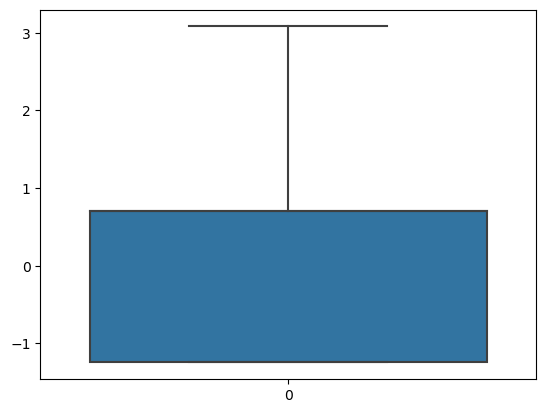

In [89]:
sns.boxplot(pt.fit_transform(counts[['City_counts']]))

<Axes: >

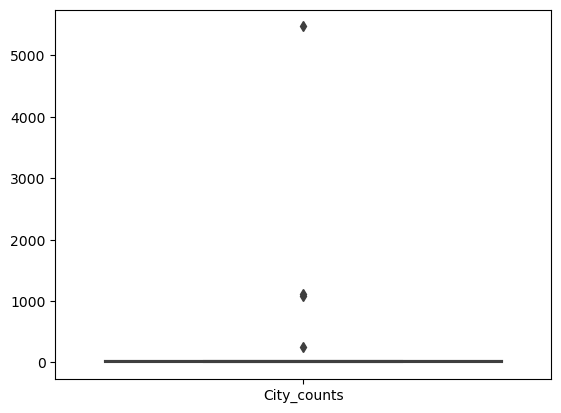

In [90]:
sns.boxplot(counts[['City_counts']])

In [91]:
counts=data['City'].value_counts()

In [92]:
counts

City
New Delhi                 5473
Gurgaon                   1118
Noida                     1080
Faridabad                  251
Ghaziabad                   25
Bhubaneshwar                21
Guwahati                    21
Amritsar                    21
Lucknow                     21
Ahmedabad                   21
Rio de Janeiro              20
Patna                       20
Mumbai                      20
Mysore                      20
Nagpur                      20
Nashik                      20
Chennai                     20
Pretoria                    20
Puducherry                  20
Sí£o Paulo                  20
Pune                        20
Ranchi                      20
Aurangabad                  20
Surat                       20
Vadodara                    20
Varanasi                    20
Mangalore                   20
Ludhiana                    20
Colombo                     20
Kolkata                     20
Kochi                       20
Kanpur                      20
Jai

In [93]:
def city_counts(value):
    return counts[value]

In [94]:
Counts=data['City'].apply(city_counts)
Counts=pd.DataFrame(Counts)

<Axes: >

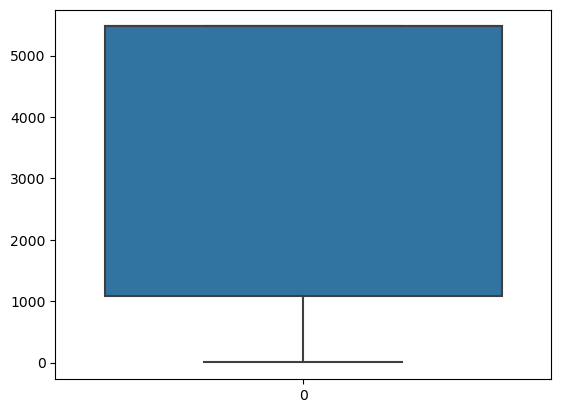

In [95]:
sns.boxplot(Counts['City'])

<Axes: xlabel='City', ylabel='Density'>

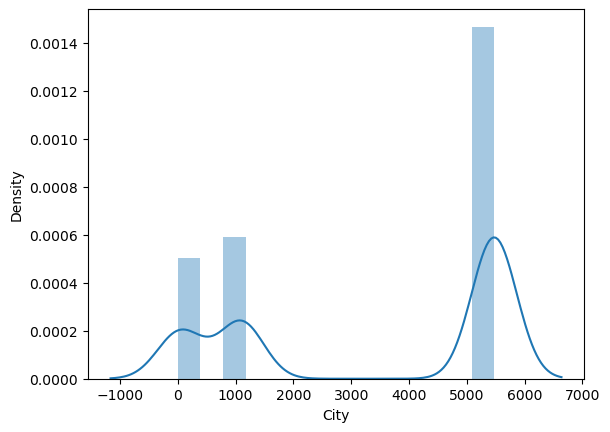

In [96]:
sns.distplot(Counts['City'])

In [275]:
#SO this columns has no outlier so we can definately use this 

In [97]:
Counts['City'].value_counts()

City
5473    5473
20      1340
1118    1118
1080    1080
251      251
21       105
1         46
18        36
25        25
2         16
16        16
14        14
11        11
4          8
3          6
6          6
Name: count, dtype: int64

In [98]:
data['City'].value_counts()

City
New Delhi                 5473
Gurgaon                   1118
Noida                     1080
Faridabad                  251
Ghaziabad                   25
Bhubaneshwar                21
Guwahati                    21
Amritsar                    21
Lucknow                     21
Ahmedabad                   21
Rio de Janeiro              20
Patna                       20
Mumbai                      20
Mysore                      20
Nagpur                      20
Nashik                      20
Chennai                     20
Pretoria                    20
Puducherry                  20
Sí£o Paulo                  20
Pune                        20
Ranchi                      20
Aurangabad                  20
Surat                       20
Vadodara                    20
Varanasi                    20
Mangalore                   20
Ludhiana                    20
Colombo                     20
Kolkata                     20
Kochi                       20
Kanpur                      20
Jai

So this technique has worked very well . If we would have grouped than we may had loose important info of the data. But now every city has been represented in a good and precise way

In [99]:
data['City']=Counts['City']

In [100]:
data['City'].value_counts()

City
5473    5473
20      1340
1118    1118
1080    1080
251      251
21       105
1         46
18        36
25        25
2         16
16        16
14        14
11        11
4          8
3          6
6          6
Name: count, dtype: int64

<Axes: xlabel='City', ylabel='Density'>

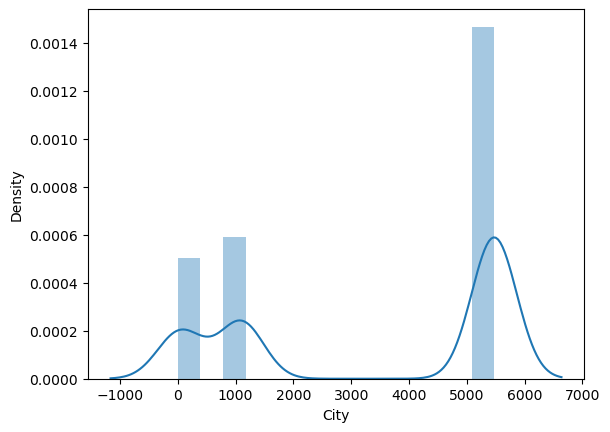

In [101]:
sns.distplot(data['City'])

<Axes: >

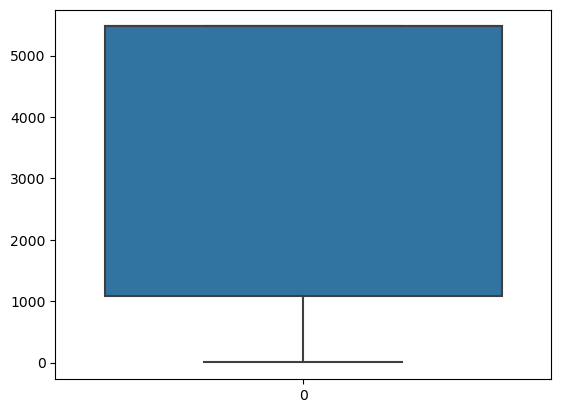

In [102]:
sns.boxplot(data['City'])

In [ ]:
#NO outliers are there so we can proceed further

In [103]:
data.head(2)

code1  code2  code3  Restaurant ID   Restaurant Name  City  \
0    0.0    0.0    1.0        6317637  Le Petit Souffle     2   
1    0.0    0.0    1.0        6304287  Izakaya Kikufuji     2   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   

                     Cuisines  Average Cost for two          Currency  \
0  French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                    Japanese                  1200  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   

  Rating text  Votes Country  Transformed_outler_no  
0   Excellent    314  others              -0.634799  
1   Excellent    591  others              -0.634799

In [104]:
data['Address'].value_counts()

Address
Sector 41, Noida                                                                                                                        11
Dilli Haat, INA, New Delhi                                                                                                              11
Greater Kailash (GK) 1, New Delhi                                                                                                       10
The Imperial, Janpath, New Delhi                                                                                                         9
Palate of Delhi, Dhaula Kuan Metro Station, Chanakyapuri, New Delhi                                                                      8
Food Court, 3rd Floor, Logix City Centre, Sector 32, Near Sector 34, Noida                                                               8
HUDA Market, Sector 56, Gurgaon                                                                                                          8
The Lalit, Barakham

In [105]:
pd.set_option('display.max_rows',15)

In [106]:
data['Address'].value_counts()

Address
Sector 41, Noida                                                                         11
Dilli Haat, INA, New Delhi                                                               11
Greater Kailash (GK) 1, New Delhi                                                        10
The Imperial, Janpath, New Delhi                                                          9
Palate of Delhi, Dhaula Kuan Metro Station, Chanakyapuri, New Delhi                       8
                                                                                         ..
23-24, Defence Colony Market, Defence Colony, New Delhi                                   1
28, Main Market, Defence Colony, New Delhi                                                1
Daryaganj, New Delhi                                                                      1
Ground Floor, E-23, Netaji Subhash Marg, Opposite Golcha Cinema, Daryaganj, New Delhi     1
CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B, KadÛ±kí_y, ÛÁstanbul     

#Here also the number of unique values is very high and if we group them than also it is going to create a hell lot of imbalance. One thing we can do here is that we can replace the address with the value_counts so that every rows will get unique number

In [107]:
counts=data['Address'].value_counts()
counts

Address
Sector 41, Noida                                                                         11
Dilli Haat, INA, New Delhi                                                               11
Greater Kailash (GK) 1, New Delhi                                                        10
The Imperial, Janpath, New Delhi                                                          9
Palate of Delhi, Dhaula Kuan Metro Station, Chanakyapuri, New Delhi                       8
                                                                                         ..
23-24, Defence Colony Market, Defence Colony, New Delhi                                   1
28, Main Market, Defence Colony, New Delhi                                                1
Daryaganj, New Delhi                                                                      1
Ground Floor, E-23, Netaji Subhash Marg, Opposite Golcha Cinema, Daryaganj, New Delhi     1
CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B, KadÛ±kí_y, ÛÁstanbul     

In [108]:
def address_counts(value):
    return counts[value]

In [109]:
Counts=data['Address'].apply(address_counts)
Counts=pd.DataFrame(Counts,columns=['Address'])
Counts

Address
0           1
1           1
2           1
3           1
4           1
...       ...
9546        1
9547        1
9548        1
9549        1
9550        1

[9551 rows x 1 columns]

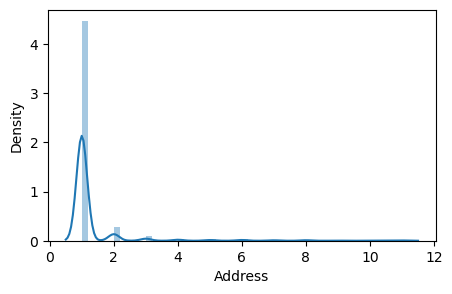

In [110]:
plt.figure(figsize=(5,3))
sns.distplot(Counts['Address'])
plt.show()

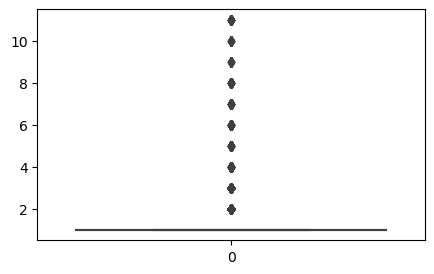

In [111]:
plt.figure(figsize=(5,3))
sns.boxplot(Counts['Address'])
plt.show()

In [112]:
#A hell lot of outliers let us see the transformed column
pt.fit_transform(Counts[['Address']])

array([[-0.34387921],
       [-0.34387921],
       [-0.34387921],
       ...,
       [-0.34387921],
       [-0.34387921],
       [-0.34387921]])

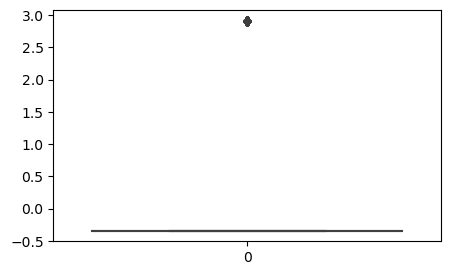

In [113]:
plt.figure(figsize=(5,3))
sns.boxplot(pt.fit_transform(Counts[['Address']]))
plt.show()

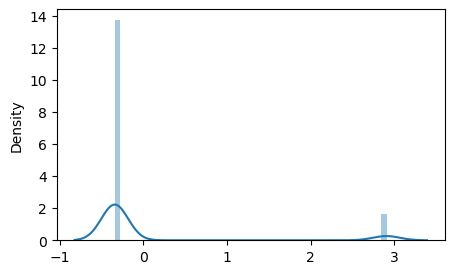

In [114]:
plt.figure(figsize=(5,3))
sns.distplot(pt.fit_transform(Counts[['Address']]))
plt.show()

In [115]:
pt = PowerTransformer(method='yeo-johnson') 

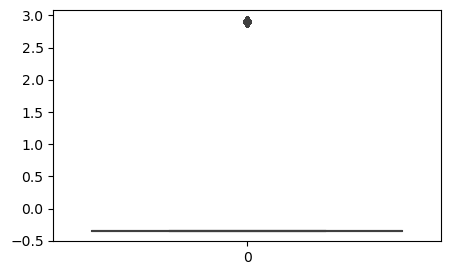

In [116]:
plt.figure(figsize=(5,3))
sns.boxplot(pt.fit_transform(Counts[['Address']]))
plt.show()

In [314]:
pt = PowerTransformer(method='box-cox')

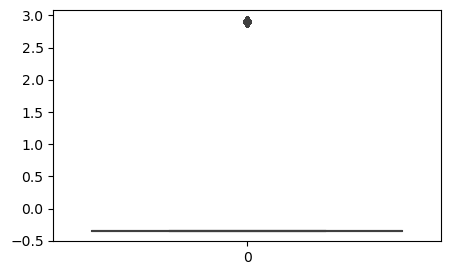

In [117]:
plt.figure(figsize=(5,3))
sns.boxplot(pt.fit_transform(Counts[['Address']]))
plt.show()

In [118]:
pt.fit_transform(Counts[['Address']])

array([[-0.34387837],
       [-0.34387837],
       [-0.34387837],
       ...,
       [-0.34387837],
       [-0.34387837],
       [-0.34387837]])

In [119]:
Counts['Address'].value_counts()

Address
1     8541
2      534
3      165
4       80
6       60
5       55
8       40
7       35
11      22
10      10
9        9
Name: count, dtype: int64

#There is a reduction in the transformed so if we have to use this than we have to use the transformed only 

In [120]:
data['Address'].value_counts()

Address
Sector 41, Noida                                                                         11
Dilli Haat, INA, New Delhi                                                               11
Greater Kailash (GK) 1, New Delhi                                                        10
The Imperial, Janpath, New Delhi                                                          9
Palate of Delhi, Dhaula Kuan Metro Station, Chanakyapuri, New Delhi                       8
                                                                                         ..
23-24, Defence Colony Market, Defence Colony, New Delhi                                   1
28, Main Market, Defence Colony, New Delhi                                                1
Daryaganj, New Delhi                                                                      1
Ground Floor, E-23, Netaji Subhash Marg, Opposite Golcha Cinema, Daryaganj, New Delhi     1
CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B, KadÛ±kí_y, ÛÁstanbul     

This columns is irrevant i know but even if we have to use this we have to can not use it by just grouping we have to use this by using the value counts of the address

In [121]:
pt.fit_transform(Counts[['Address']])

array([[-0.34387837],
       [-0.34387837],
       [-0.34387837],
       ...,
       [-0.34387837],
       [-0.34387837],
       [-0.34387837]])

In [122]:
Counts['Address']

0       1
1       1
2       1
3       1
4       1
       ..
9546    1
9547    1
9548    1
9549    1
9550    1
Name: Address, Length: 9551, dtype: int64

In [123]:
data['Address']=pt.fit_transform(Counts[['Address']])

In [124]:
data['Address'].value_counts()

Address
-0.343878    8541
 2.900433     534
 2.916217     165
 2.916571      80
 2.916591      60
 2.916590      55
 2.916591      40
 2.916591      35
 2.916591      22
 2.916591      10
 2.916591       9
Name: count, dtype: int64

<Axes: xlabel='Address', ylabel='Density'>

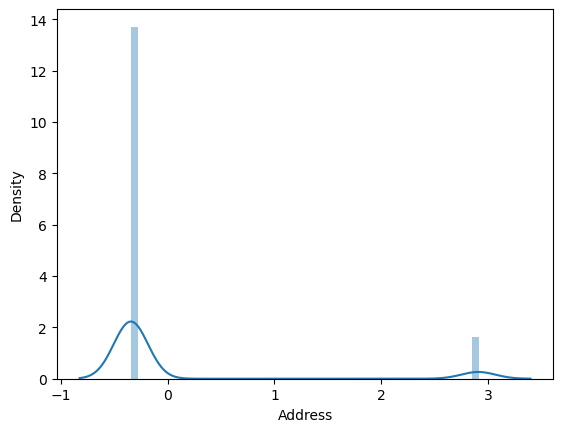

In [125]:
sns.distplot(data['Address'])

<Axes: >

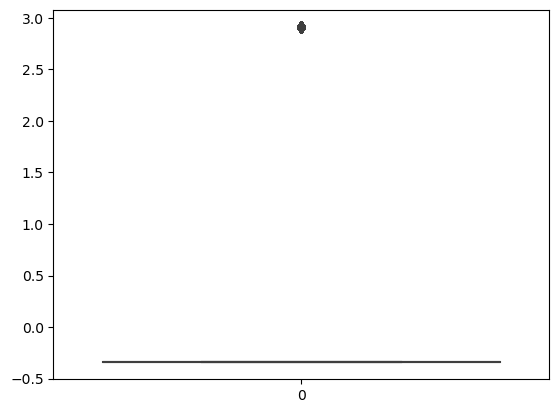

In [126]:
sns.boxplot(data['Address'])

In [127]:
data.head()

code1  code2  code3  Restaurant ID         Restaurant Name  City   Address  \
0    0.0    0.0    1.0        6317637        Le Petit Souffle     2 -0.343878   
1    0.0    0.0    1.0        6304287        Izakaya Kikufuji     2 -0.343878   
2    0.0    0.0    1.0        6300002  Heat - Edsa Shangri-La     4 -0.343878   
3    0.0    0.0    1.0        6318506                    Ooma     4 -0.343878   
4    0.0    0.0    1.0        6314302             Sambo Kojin     4 -0.343878   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   
3                No                  No                No   
4               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   

  Rating text  Votes Country  Transformed_outler_no  
0   Excellent    314  others              -0.634799  
1   Excellent    591  others              -0.634799  
2   Very Good    270  others              -0.634799  
3   Excellent    365  others              -0.634799  
4   Excellent    229  others              -0.634799

In [128]:
data['Locality'].value_counts()

Locality
Connaught Place                                122
Rajouri Garden                                  99
Shahdara                                        87
Defence Colony                                  86
Pitampura                                       85
                                              ... 
Lemon Tree Premier, Sector 29                    1
Omaxe Celebration Mall, Sohna Road, Gurgaon      1
Park Inn, Sector 15, Gurgaon                     1
Plaza Mall, MG Road                              1
Moda                                             1
Name: count, Length: 1208, dtype: int64

This time also i think we will have to use the same method because every locality can be given a separate number by this process

In [129]:
pd.set_option('display.max_rows',None)

In [130]:
data['Locality'].value_counts()

Locality
Connaught Place                                        122
Rajouri Garden                                          99
Shahdara                                                87
Defence Colony                                          86
Pitampura                                               85
Malviya Nagar                                           85
Mayur Vihar Phase 1                                     84
Rajinder Nagar                                          81
Safdarjung                                              80
Satyaniketan                                            79
Krishna Nagar                                           77
Sector 62                                               76
Karol Bagh                                              76
Sector 18                                               75
Hauz Khas                                               74
Kalkaji                                                 73
Sector 15                                      

In [131]:
pd.set_option('display.max_rows',15)

In [132]:
data['Locality'].value_counts()

Locality
Connaught Place                                122
Rajouri Garden                                  99
Shahdara                                        87
Defence Colony                                  86
Pitampura                                       85
                                              ... 
Lemon Tree Premier, Sector 29                    1
Omaxe Celebration Mall, Sohna Road, Gurgaon      1
Park Inn, Sector 15, Gurgaon                     1
Plaza Mall, MG Road                              1
Moda                                             1
Name: count, Length: 1208, dtype: int64

In [133]:
counts=data['Locality'].value_counts()
counts

Locality
Connaught Place                                122
Rajouri Garden                                  99
Shahdara                                        87
Defence Colony                                  86
Pitampura                                       85
                                              ... 
Lemon Tree Premier, Sector 29                    1
Omaxe Celebration Mall, Sohna Road, Gurgaon      1
Park Inn, Sector 15, Gurgaon                     1
Plaza Mall, MG Road                              1
Moda                                             1
Name: count, Length: 1208, dtype: int64

In [134]:
def locality_counts(value):
    return counts[value]

In [135]:
Counts=data['Locality'].apply(locality_counts)
Counts=pd.DataFrame(Counts.values,columns=['Locality_count'])
Counts

Locality_count
0                  1
1                  1
2                  1
3                  3
4                  3
...              ...
9546               4
9547               1
9548               2
9549               2
9550               1

[9551 rows x 1 columns]

In [136]:
Counts['Locality_count'].value_counts()

Locality_count
1     551
2     346
3     309
60    240
5     210
     ... 
22     44
35     35
34     34
11     33
29     29
Name: count, Length: 82, dtype: int64

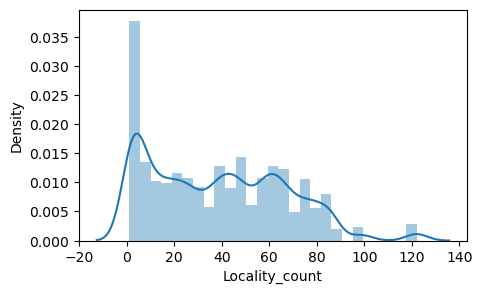

In [137]:
plt.figure(figsize=(5,3))
sns.distplot(Counts['Locality_count'])
plt.show()

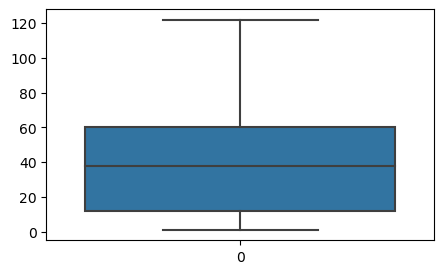

In [138]:
plt.figure(figsize=(5,3))
sns.boxplot(Counts['Locality_count'])
plt.show()

#NO outliers detected so we can use this also with any transformation and later with standardization we will eliminate
the ordinal relation  between the columns

In [139]:
data['Locality']=Counts['Locality_count']

In [140]:
data['Locality'].value_counts()

Locality
1     551
2     346
3     309
60    240
5     210
     ... 
22     44
35     35
34     34
11     33
29     29
Name: count, Length: 82, dtype: int64

In [141]:
data.head()

code1  code2  code3  Restaurant ID         Restaurant Name  City   Address  \
0    0.0    0.0    1.0        6317637        Le Petit Souffle     2 -0.343878   
1    0.0    0.0    1.0        6304287        Izakaya Kikufuji     2 -0.343878   
2    0.0    0.0    1.0        6300002  Heat - Edsa Shangri-La     4 -0.343878   
3    0.0    0.0    1.0        6318506                    Ooma     4 -0.343878   
4    0.0    0.0    1.0        6314302             Sambo Kojin     4 -0.343878   

   Locality                                   Locality Verbose   Longitude  \
0         1  Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1         1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2         1  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3         3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4         3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   

    Latitude                          Cuisines  Average Cost for two  \
0  14.565443        French, Japanese, Desserts                  1100   
1  14.553708                          Japanese                  1200   
2  14.581404  Seafood, Asian, Filipino, Indian                  4000   
3  14.585318                   Japanese, Sushi                  1500   
4  14.584450                  Japanese, Korean                  1500   

           Currency Has Table booking Has Online delivery Is delivering now  \
0  Botswana Pula(P)               Yes                  No                No   
1  Botswana Pula(P)               Yes                  No                No   
2  Botswana Pula(P)               Yes                  No                No   
3  Botswana Pula(P)                No                  No                No   
4  Botswana Pula(P)               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   

  Rating text  Votes Country  Transformed_outler_no  
0   Excellent    314  others              -0.634799  
1   Excellent    591  others              -0.634799  
2   Very Good    270  others              -0.634799  
3   Excellent    365  others              -0.634799  
4   Excellent    229  others              -0.634799

In [142]:
data['Locality Verbose'].value_counts()

Locality Verbose
Connaught Place, New Delhi                    122
Rajouri Garden, New Delhi                      99
Shahdara, New Delhi                            87
Defence Colony, New Delhi                      86
Pitampura, New Delhi                           85
                                             ... 
Ramada Gurgaon Central, Sector 44, Gurgaon      1
Sector 5, Gurgaon                               1
Sector 53, Gurgaon                              1
The Claremont, MG Road, Gurgaon                 1
Moda, ÛÁstanbul                                 1
Name: count, Length: 1265, dtype: int64

In [143]:
#This columns is same as the previous one so no point in using this we will drop this
data=data.drop(columns='Locality Verbose')

In [144]:
data.head()

code1  code2  code3  Restaurant ID         Restaurant Name  City   Address  \
0    0.0    0.0    1.0        6317637        Le Petit Souffle     2 -0.343878   
1    0.0    0.0    1.0        6304287        Izakaya Kikufuji     2 -0.343878   
2    0.0    0.0    1.0        6300002  Heat - Edsa Shangri-La     4 -0.343878   
3    0.0    0.0    1.0        6318506                    Ooma     4 -0.343878   
4    0.0    0.0    1.0        6314302             Sambo Kojin     4 -0.343878   

   Locality   Longitude   Latitude                          Cuisines  \
0         1  121.027535  14.565443        French, Japanese, Desserts   
1         1  121.014101  14.553708                          Japanese   
2         1  121.056831  14.581404  Seafood, Asian, Filipino, Indian   
3         3  121.056475  14.585318                   Japanese, Sushi   
4         3  121.057508  14.584450                  Japanese, Korean   

   Average Cost for two          Currency Has Table booking  \
0                  1100  Botswana Pula(P)               Yes   
1                  1200  Botswana Pula(P)               Yes   
2                  4000  Botswana Pula(P)               Yes   
3                  1500  Botswana Pula(P)                No   
4                  1500  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu  Price range  \
0                  No                No                   No            3   
1                  No                No                   No            3   
2                  No                No                   No            4   
3                  No                No                   No            4   
4                  No                No                   No            4   

   Aggregate rating Rating color Rating text  Votes Country  \
0               4.8   Dark Green   Excellent    314  others   
1               4.5   Dark Green   Excellent    591  others   
2               4.4        Green   Very Good    270  others   
3               4.9   Dark Green   Excellent    365  others   
4               4.8   Dark Green   Excellent    229  others   

   Transformed_outler_no  
0              -0.634799  
1              -0.634799  
2              -0.634799  
3              -0.634799  
4              -0.634799

In [145]:
data['Longitude'].value_counts()

Longitude
0.000000     498
77.353663     19
77.230412     12
77.088688     10
77.251426      9
            ... 
77.227294      1
77.225420      1
77.230347      1
77.230578      1
29.026016      1
Name: count, Length: 8120, dtype: int64

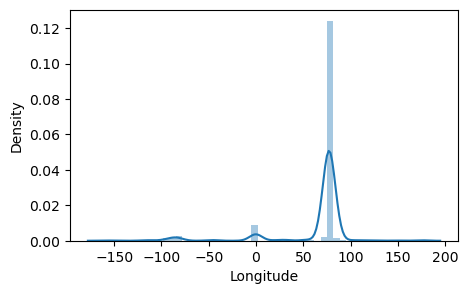

In [146]:
plt.figure(figsize=(5,3))
sns.distplot(data['Longitude'])
plt.show()

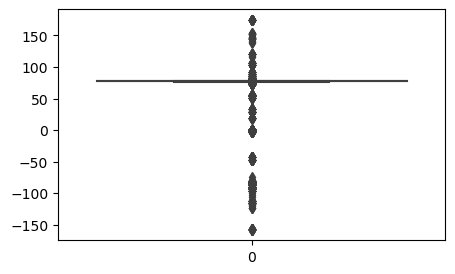

In [147]:
plt.figure(figsize=(5,3))
sns.boxplot(data['Longitude'])
plt.show()

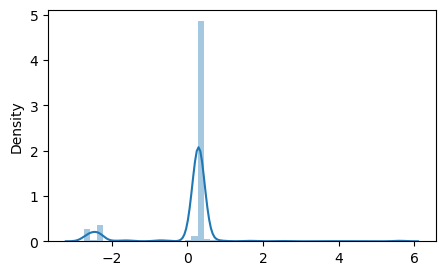

In [148]:
pt = PowerTransformer(method='yeo-johnson') 
plt.figure(figsize=(5,3))
sns.distplot(pt.fit_transform(data[['Longitude']]))
plt.show()

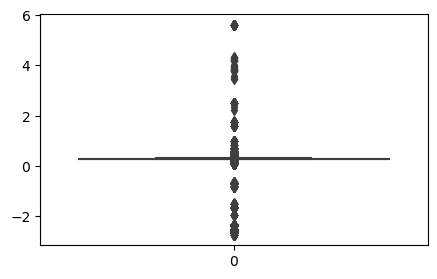

In [149]:
plt.figure(figsize=(5,3))
sns.boxplot(pt.fit_transform(data[['Longitude']]))
plt.show()

<Axes: >

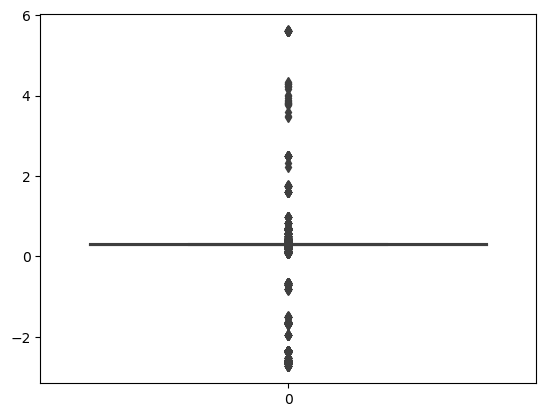

In [150]:
sns.boxplot(pt.fit_transform(data[['Longitude']]))

<Axes: >

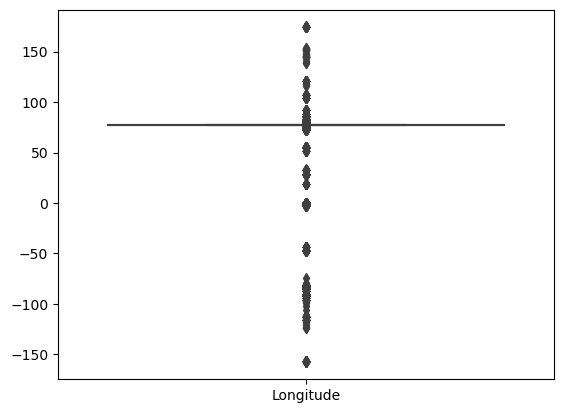

In [151]:
sns.boxplot(data[['Longitude']])

In [152]:
data['Longitude']

0       121.027535
1       121.014101
2       121.056831
3       121.056475
4       121.057508
           ...    
9546     28.977392
9547     29.041297
9548     29.034640
9549     29.036019
9550     29.026016
Name: Longitude, Length: 9551, dtype: float64

In [153]:
a=data['Longitude']+140
a

0       261.027535
1       261.014101
2       261.056831
3       261.056475
4       261.057508
           ...    
9546    168.977392
9547    169.041297
9548    169.034640
9549    169.036019
9550    169.026016
Name: Longitude, Length: 9551, dtype: float64

<Axes: >

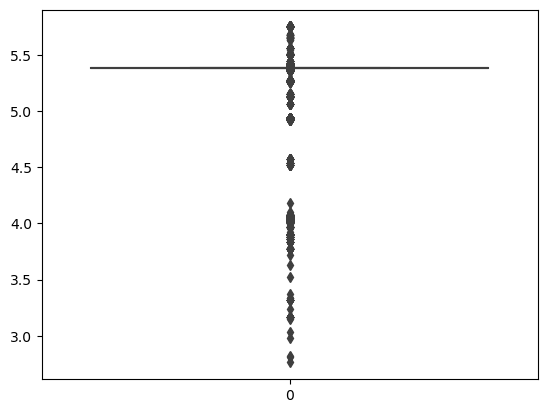

In [154]:
sns.boxplot(np.log(a))

<Axes: xlabel='Longitude', ylabel='Density'>

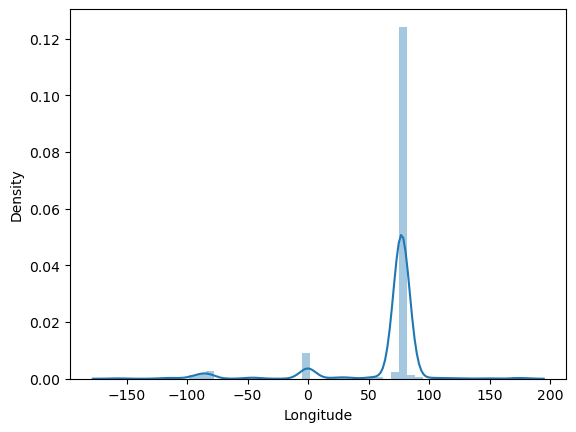

In [155]:
sns.distplot(data['Longitude'])

In [156]:
data.head()

code1  code2  code3  Restaurant ID         Restaurant Name  City   Address  \
0    0.0    0.0    1.0        6317637        Le Petit Souffle     2 -0.343878   
1    0.0    0.0    1.0        6304287        Izakaya Kikufuji     2 -0.343878   
2    0.0    0.0    1.0        6300002  Heat - Edsa Shangri-La     4 -0.343878   
3    0.0    0.0    1.0        6318506                    Ooma     4 -0.343878   
4    0.0    0.0    1.0        6314302             Sambo Kojin     4 -0.343878   

   Locality   Longitude   Latitude                          Cuisines  \
0         1  121.027535  14.565443        French, Japanese, Desserts   
1         1  121.014101  14.553708                          Japanese   
2         1  121.056831  14.581404  Seafood, Asian, Filipino, Indian   
3         3  121.056475  14.585318                   Japanese, Sushi   
4         3  121.057508  14.584450                  Japanese, Korean   

   Average Cost for two          Currency Has Table booking  \
0                  1100  Botswana Pula(P)               Yes   
1                  1200  Botswana Pula(P)               Yes   
2                  4000  Botswana Pula(P)               Yes   
3                  1500  Botswana Pula(P)                No   
4                  1500  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu  Price range  \
0                  No                No                   No            3   
1                  No                No                   No            3   
2                  No                No                   No            4   
3                  No                No                   No            4   
4                  No                No                   No            4   

   Aggregate rating Rating color Rating text  Votes Country  \
0               4.8   Dark Green   Excellent    314  others   
1               4.5   Dark Green   Excellent    591  others   
2               4.4        Green   Very Good    270  others   
3               4.9   Dark Green   Excellent    365  others   
4               4.8   Dark Green   Excellent    229  others   

   Transformed_outler_no  
0              -0.634799  
1              -0.634799  
2              -0.634799  
3              -0.634799  
4              -0.634799

In [157]:
data['Longitude'].value_counts()

Longitude
0.000000     498
77.353663     19
77.230412     12
77.088688     10
77.251426      9
            ... 
77.227294      1
77.225420      1
77.230347      1
77.230578      1
29.026016      1
Name: count, Length: 8120, dtype: int64

<Axes: ylabel='Density'>

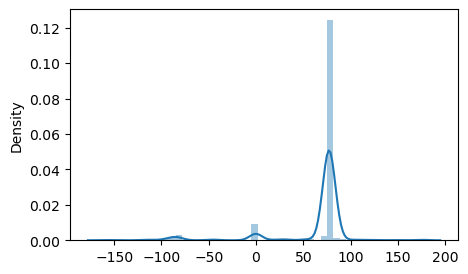

In [158]:
plt.figure(figsize=(5,3))
sns.distplot(x=data['Longitude'])

<Axes: >

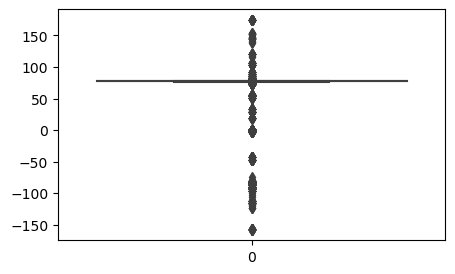

In [159]:
plt.figure(figsize=(5,3))
sns.boxplot(data['Longitude'])

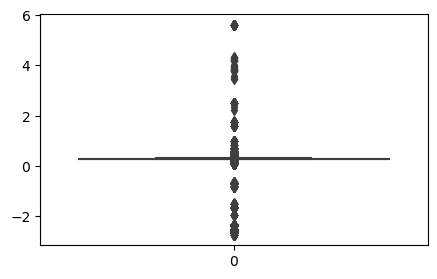

In [160]:
plt.figure(figsize=(5,3))
sns.boxplot(pt.fit_transform(data[['Longitude']]))
plt.show()

In [161]:
a=pt.fit_transform(data[['Longitude']])

In [162]:
#LEt us see the amount of outliers which are here
from scipy.stats import zscore

In [163]:
Zscore=np.abs(zscore(data['Longitude']))
len(np.where(Zscore>3)[0])

438

In [164]:
len(np.where(Zscore>3)[0])

438

In [165]:
Zscore=np.abs(zscore(pt.fit_transform(data[['Longitude']])))

In [166]:
len(np.where(Zscore>3)[0])

62

In [ ]:
#IN the transformed longitude onlyt 62 outliers are there so we will use this 

<Axes: ylabel='Density'>

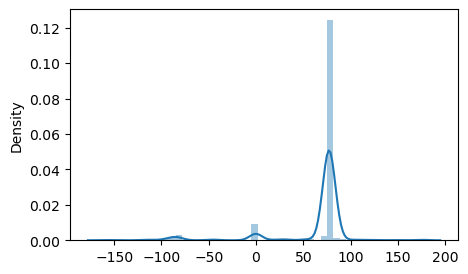

In [167]:
plt.figure(figsize=(5,3))
sns.distplot(x=data['Longitude'])

<Axes: ylabel='Density'>

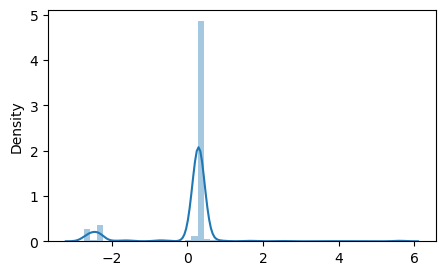

In [168]:
plt.figure(figsize=(5,3))
sns.distplot(x=pt.fit_transform(data[['Longitude']]))

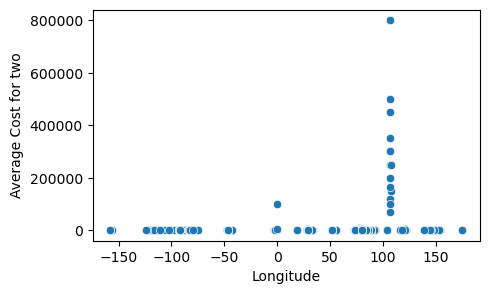

In [169]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=data['Longitude'],y=data['Average Cost for two'])
plt.show()

In [172]:
transformed=pt.fit_transform(data[['Longitude']])
transformed=pd.DataFrame(transformed,columns=['Transformed_longi'])

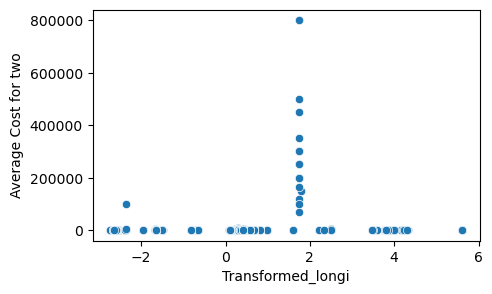

In [173]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=transformed['Transformed_longi'],y=data['Average Cost for two'])
plt.show()

In [176]:
pd.concat([transformed['Transformed_longi'],data['Average Cost for two'],data['Longitude']],axis=1).corr()

Transformed_longi  Average Cost for two  Longitude
Transformed_longi              1.000000              0.070720   0.915869
Average Cost for two           0.070720              1.000000   0.045891
Longitude                      0.915869              0.045891   1.000000

The transformation increased the relation so we will definately use this

<Axes: ylabel='Density'>

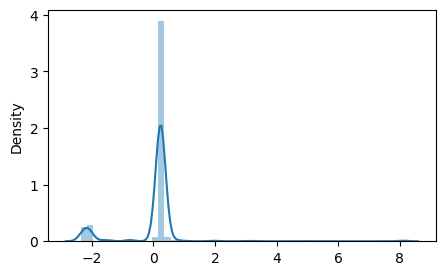

In [177]:
data['Longitude']=pt.fit_transform(data[['Longitude']])
plt.figure(figsize=(5,3))
sns.distplot(x=pt.fit_transform(data[['Longitude']]))

<Axes: >

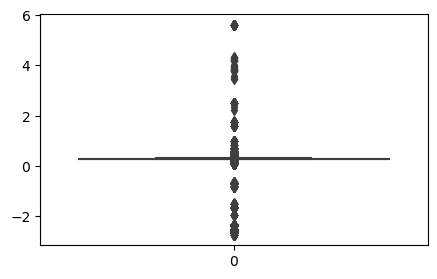

In [178]:
plt.figure(figsize=(5,3))
sns.boxplot(data['Longitude'])

In [179]:
data['Longitude']

0       2.498033
1       2.497306
2       2.499617
3       2.499598
4       2.499653
          ...   
9546   -1.640540
9547   -1.638445
9548   -1.638664
9549   -1.638619
9550   -1.638946
Name: Longitude, Length: 9551, dtype: float64

In [180]:
Zscore=np.abs(zscore(data['Longitude']))
len(np.where(Zscore>3)[0])

62

In [181]:
#So preprocessing of the longitude also done succesfullu
data.head()

code1  code2  code3  Restaurant ID         Restaurant Name  City   Address  \
0    0.0    0.0    1.0        6317637        Le Petit Souffle     2 -0.343878   
1    0.0    0.0    1.0        6304287        Izakaya Kikufuji     2 -0.343878   
2    0.0    0.0    1.0        6300002  Heat - Edsa Shangri-La     4 -0.343878   
3    0.0    0.0    1.0        6318506                    Ooma     4 -0.343878   
4    0.0    0.0    1.0        6314302             Sambo Kojin     4 -0.343878   

   Locality  Longitude   Latitude                          Cuisines  \
0         1   2.498033  14.565443        French, Japanese, Desserts   
1         1   2.497306  14.553708                          Japanese   
2         1   2.499617  14.581404  Seafood, Asian, Filipino, Indian   
3         3   2.499598  14.585318                   Japanese, Sushi   
4         3   2.499653  14.584450                  Japanese, Korean   

   Average Cost for two          Currency Has Table booking  \
0                  1100  Botswana Pula(P)               Yes   
1                  1200  Botswana Pula(P)               Yes   
2                  4000  Botswana Pula(P)               Yes   
3                  1500  Botswana Pula(P)                No   
4                  1500  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu  Price range  \
0                  No                No                   No            3   
1                  No                No                   No            3   
2                  No                No                   No            4   
3                  No                No                   No            4   
4                  No                No                   No            4   

   Aggregate rating Rating color Rating text  Votes Country  \
0               4.8   Dark Green   Excellent    314  others   
1               4.5   Dark Green   Excellent    591  others   
2               4.4        Green   Very Good    270  others   
3               4.9   Dark Green   Excellent    365  others   
4               4.8   Dark Green   Excellent    229  others   

   Transformed_outler_no  
0              -0.634799  
1              -0.634799  
2              -0.634799  
3              -0.634799  
4              -0.634799

In [182]:
data['Latitude'].value_counts()

Latitude
0.000000     498
28.574309     16
28.574300      9
28.551456      9
28.597103      8
            ... 
28.645175      1
28.646194      1
28.648280      1
28.643514      1
40.984776      1
Name: count, Length: 8677, dtype: int64

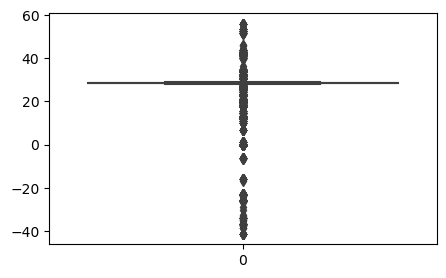

In [183]:
plt.figure(figsize=(5,3))
sns.boxplot(data['Latitude'])
plt.show()

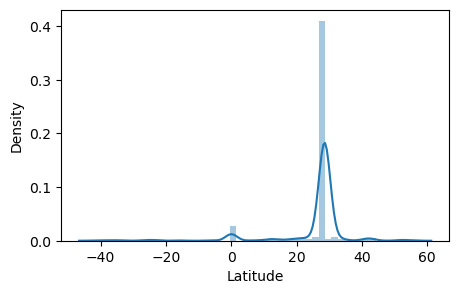

In [184]:
plt.figure(figsize=(5,3))
sns.distplot(data['Latitude'])
plt.show()

In [185]:
Zscore=np.abs(zscore(data['Latitude']))
len(np.where(Zscore>3)[0])

183

In [186]:
Zscore=np.abs(zscore(pt.fit_transform(data[['Latitude']])))
len(np.where(Zscore>3)[0])

86

In [187]:
pt.fit_transform(data[['Latitude']])

array([[-1.60277142],
       [-1.60398861],
       [-1.60111504],
       ...,
       [ 2.27696856],
       [ 2.27736561],
       [ 2.2639274 ]])

In [188]:
Zscore=np.abs(zscore(pt.fit_transform(data[['Latitude']])))
len(np.where(Zscore>3)[0])

86

In [189]:
#So there is a reduction in the outliers in this columns after the transformation so we will use this here also
data['Latitude']=pt.fit_transform(data[['Latitude']])

In [190]:
Zscore=np.abs(zscore(data['Latitude']))
len(np.where(Zscore>3)[0])

86

In [424]:
#latitude also succesfully done

In [191]:
data.head()

code1  code2  code3  Restaurant ID         Restaurant Name  City   Address  \
0    0.0    0.0    1.0        6317637        Le Petit Souffle     2 -0.343878   
1    0.0    0.0    1.0        6304287        Izakaya Kikufuji     2 -0.343878   
2    0.0    0.0    1.0        6300002  Heat - Edsa Shangri-La     4 -0.343878   
3    0.0    0.0    1.0        6318506                    Ooma     4 -0.343878   
4    0.0    0.0    1.0        6314302             Sambo Kojin     4 -0.343878   

   Locality  Longitude  Latitude                          Cuisines  \
0         1   2.498033 -1.602771        French, Japanese, Desserts   
1         1   2.497306 -1.603989                          Japanese   
2         1   2.499617 -1.601115  Seafood, Asian, Filipino, Indian   
3         3   2.499598 -1.600709                   Japanese, Sushi   
4         3   2.499653 -1.600799                  Japanese, Korean   

   Average Cost for two          Currency Has Table booking  \
0                  1100  Botswana Pula(P)               Yes   
1                  1200  Botswana Pula(P)               Yes   
2                  4000  Botswana Pula(P)               Yes   
3                  1500  Botswana Pula(P)                No   
4                  1500  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu  Price range  \
0                  No                No                   No            3   
1                  No                No                   No            3   
2                  No                No                   No            4   
3                  No                No                   No            4   
4                  No                No                   No            4   

   Aggregate rating Rating color Rating text  Votes Country  \
0               4.8   Dark Green   Excellent    314  others   
1               4.5   Dark Green   Excellent    591  others   
2               4.4        Green   Very Good    270  others   
3               4.9   Dark Green   Excellent    365  others   
4               4.8   Dark Green   Excellent    229  others   

   Transformed_outler_no  
0              -0.634799  
1              -0.634799  
2              -0.634799  
3              -0.634799  
4              -0.634799

In [192]:
data['Cuisines'].value_counts()

Cuisines
North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64

In [193]:
cuisines=data['Cuisines'].str.split(',')

In [194]:
cuisines

0              [French,  Japanese,  Desserts]
1                                  [Japanese]
2       [Seafood,  Asian,  Filipino,  Indian]
3                          [Japanese,  Sushi]
4                         [Japanese,  Korean]
                        ...                  
9546                                [Turkish]
9547      [World Cuisine,  Patisserie,  Cafe]
9548                [Italian,  World Cuisine]
9549                        [Restaurant Cafe]
9550                                   [Cafe]
Name: Cuisines, Length: 9551, dtype: object

In [195]:
pd.set_option('display.max_rows',None)

In [196]:
cuisines

0                          [French,  Japanese,  Desserts]
1                                              [Japanese]
2                   [Seafood,  Asian,  Filipino,  Indian]
3                                      [Japanese,  Sushi]
4                                     [Japanese,  Korean]
5                                               [Chinese]
6                                      [Asian,  European]
7                 [Seafood,  Filipino,  Asian,  European]
8                             [European,  Asian,  Indian]
9                                              [Filipino]
10                                   [Filipino,  Mexican]
11                      [American,  Ice Cream,  Desserts]
12                                   [Filipino,  Mexican]
13                                             [Filipino]
14                                               [Korean]
15                 [Cafe,  American,  Italian,  Filipino]
16                                      [Italian,  Pizza]
17            

In [197]:
pd.set_option('display.max_rows',10)

In [198]:
data.head()

code1  code2  code3  Restaurant ID         Restaurant Name  City   Address  \
0    0.0    0.0    1.0        6317637        Le Petit Souffle     2 -0.343878   
1    0.0    0.0    1.0        6304287        Izakaya Kikufuji     2 -0.343878   
2    0.0    0.0    1.0        6300002  Heat - Edsa Shangri-La     4 -0.343878   
3    0.0    0.0    1.0        6318506                    Ooma     4 -0.343878   
4    0.0    0.0    1.0        6314302             Sambo Kojin     4 -0.343878   

   Locality  Longitude  Latitude                          Cuisines  \
0         1   2.498033 -1.602771        French, Japanese, Desserts   
1         1   2.497306 -1.603989                          Japanese   
2         1   2.499617 -1.601115  Seafood, Asian, Filipino, Indian   
3         3   2.499598 -1.600709                   Japanese, Sushi   
4         3   2.499653 -1.600799                  Japanese, Korean   

   Average Cost for two          Currency Has Table booking  \
0                  1100  Botswana Pula(P)               Yes   
1                  1200  Botswana Pula(P)               Yes   
2                  4000  Botswana Pula(P)               Yes   
3                  1500  Botswana Pula(P)                No   
4                  1500  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu  Price range  \
0                  No                No                   No            3   
1                  No                No                   No            3   
2                  No                No                   No            4   
3                  No                No                   No            4   
4                  No                No                   No            4   

   Aggregate rating Rating color Rating text  Votes Country  \
0               4.8   Dark Green   Excellent    314  others   
1               4.5   Dark Green   Excellent    591  others   
2               4.4        Green   Very Good    270  others   
3               4.9   Dark Green   Excellent    365  others   
4               4.8   Dark Green   Excellent    229  others   

   Transformed_outler_no  
0              -0.634799  
1              -0.634799  
2              -0.634799  
3              -0.634799  
4              -0.634799

In [199]:
data['Cuisines'].isna().sum()

9

In [200]:
data.isna().sum()

code1                    0
code2                    0
code3                    0
Restaurant ID            0
Restaurant Name          0
                        ..
Rating color             0
Rating text              0
Votes                    0
Country                  0
Transformed_outler_no    0
Length: 24, dtype: int64

In [201]:
pd.set_option('display.max_rows',30)

In [202]:
data.isna().sum()

code1                    0
code2                    0
code3                    0
Restaurant ID            0
Restaurant Name          0
City                     0
Address                  0
Locality                 0
Longitude                0
Latitude                 0
Cuisines                 9
Average Cost for two     0
Currency                 0
Has Table booking        0
Has Online delivery      0
Is delivering now        0
Switch to order menu     0
Price range              0
Aggregate rating         0
Rating color             0
Rating text              0
Votes                    0
Country                  0
Transformed_outler_no    0
dtype: int64

In [203]:
#LEt us fill the nulls with the mode
data['Cuisines']=data['Cuisines'].fillna(value=data['Cuisines'].mode()[0])

In [204]:
data.isna().sum()

code1                    0
code2                    0
code3                    0
Restaurant ID            0
Restaurant Name          0
City                     0
Address                  0
Locality                 0
Longitude                0
Latitude                 0
Cuisines                 0
Average Cost for two     0
Currency                 0
Has Table booking        0
Has Online delivery      0
Is delivering now        0
Switch to order menu     0
Price range              0
Aggregate rating         0
Rating color             0
Rating text              0
Votes                    0
Country                  0
Transformed_outler_no    0
dtype: int64

In [205]:
cuisines=data['Cuisines'].str.split(',')

In [206]:
cuisines

0              [French,  Japanese,  Desserts]
1                                  [Japanese]
2       [Seafood,  Asian,  Filipino,  Indian]
3                          [Japanese,  Sushi]
4                         [Japanese,  Korean]
                        ...                  
9546                                [Turkish]
9547      [World Cuisine,  Patisserie,  Cafe]
9548                [Italian,  World Cuisine]
9549                        [Restaurant Cafe]
9550                                   [Cafe]
Name: Cuisines, Length: 9551, dtype: object

In [207]:
for i in range(0,9551):
    print(len(cuisines[i]))

3
1
4
2
2
1
2
4
3
1
2
3
2
1
1
4
2
1
3
4
4
4
2
1
1
1
1
1
1
1
2
1
1
2
2
1
2
2
1
1
1
2
3
2
2
3
1
1
2
4
2
1
1
1
1
3
1
2
2
1
2
2
2
2
1
1
2
3
2
1
1
2
3
1
2
2
1
2
1
2
3
2
3
2
1
1
2
1
1
3
3
3
3
1
1
3
2
3
3
3
2
3
3
1
1
2
3
2
3
3
3
1
3
1
1
3
2
2
1
3
2
3
2
3
3
3
2
2
1
1
3
3
1
3
3
1
1
1
1
2
1
1
2
2
2
3
2
2
3
2
2
1
2
1
1
3
2
3
1
1
3
1
3
2
1
3
3
1
3
1
3
1
1
3
2
3
1
1
2
3
1
2
3
2
2
3
1
3
2
2
3
3
3
3
1
1
2
2
1
2
2
1
3
3
3
2
1
2
3
1
2
1
1
2
1
1
3
1
1
2
1
3
3
2
3
2
2
3
1
2
1
1
2
3
1
1
1
1
1
1
1
1
2
3
3
2
3
3
2
2
2
2
4
3
1
2
3
2
1
3
2
2
1
2
1
1
1
3
1
3
1
3
2
3
2
2
1
2
2
1
2
3
4
3
1
3
3
3
1
1
3
3
1
2
2
3
1
1
3
1
2
1
2
3
3
3
1
3
2
1
2
3
1
2
1
3
3
3
3
1
3
3
1
3
1
3
3
2
1
2
3
2
1
3
1
2
2
1
1
2
3
1
1
3
3
1
3
2
3
1
1
3
3
3
2
3
1
2
3
2
3
2
3
3
1
3
2
3
2
1
3
2
3
2
2
3
2
1
2
2
2
3
2
3
1
3
3
2
1
2
1
3
1
1
3
1
1
2
1
3
1
3
2
3
3
2
1
3
1
3
1
3
3
1
1
3
2
3
3
3
2
2
2
2
2
3
2
3
3
3
1
1
1
3
3
3
1
2
2
1
1
1
3
1
2
3
1
3
3
3
1
1
3
3
3
3
2
3
3
1
1
3
2
3
2
3
2
2
2
3
2
2
2
1
1
2
3
3
2
3
2
1
1
2
2
1
2
1
3
2
1
1
1
2
2
3
1
1
2
2


In [208]:
Cuisines=[]
for i in range(0,9551):
    Cuisines.append(len(cuisines[i]))
Cuisines

[3,
 1,
 4,
 2,
 2,
 1,
 2,
 4,
 3,
 1,
 2,
 3,
 2,
 1,
 1,
 4,
 2,
 1,
 3,
 4,
 4,
 4,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 3,
 2,
 2,
 3,
 1,
 1,
 2,
 4,
 2,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 3,
 2,
 1,
 1,
 2,
 3,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 3,
 2,
 3,
 2,
 1,
 1,
 2,
 1,
 1,
 3,
 3,
 3,
 3,
 1,
 1,
 3,
 2,
 3,
 3,
 3,
 2,
 3,
 3,
 1,
 1,
 2,
 3,
 2,
 3,
 3,
 3,
 1,
 3,
 1,
 1,
 3,
 2,
 2,
 1,
 3,
 2,
 3,
 2,
 3,
 3,
 3,
 2,
 2,
 1,
 1,
 3,
 3,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 1,
 2,
 1,
 1,
 3,
 2,
 3,
 1,
 1,
 3,
 1,
 3,
 2,
 1,
 3,
 3,
 1,
 3,
 1,
 3,
 1,
 1,
 3,
 2,
 3,
 1,
 1,
 2,
 3,
 1,
 2,
 3,
 2,
 2,
 3,
 1,
 3,
 2,
 2,
 3,
 3,
 3,
 3,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 3,
 3,
 3,
 2,
 1,
 2,
 3,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 3,
 1,
 1,
 2,
 1,
 3,
 3,
 2,
 3,
 2,
 2,
 3,
 1,
 2,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 3,
 2,
 3,
 3,
 2,
 2,


In [209]:
max(Cuisines)

8

In [210]:
#SO what we will do it we wil replace the cuisines with the number of cuisinses the restaurant has
data['Cuisines'].value_counts()

Cuisines
North Indian                                             945
North Indian, Chinese                                    511
Fast Food                                                354
Chinese                                                  354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: count, Length: 1825, dtype: int64

In [211]:
Cuisines=pd.DataFrame(Cuisines,columns=['No_of_cuisines'])

In [212]:
Cuisines

No_of_cuisines
0                  3
1                  1
2                  4
3                  2
4                  2
...              ...
9546               1
9547               3
9548               2
9549               1
9550               1

[9551 rows x 1 columns]

In [213]:
Cuisines['No_of_cuisines'].value_counts()

No_of_cuisines
2    3444
1    3403
3    1840
4     584
5     164
6      74
7      28
8      14
Name: count, dtype: int64

In [214]:
#Now we can easily group them together
data['Cuisines']=Cuisines['No_of_cuisines']

In [215]:
data['Cuisines'].value_counts()

Cuisines
2    3444
1    3403
3    1840
4     584
5     164
6      74
7      28
8      14
Name: count, dtype: int64

In [216]:
#The 7 and 8 have very less value counts so we can combine them together
data['Cuisines']=data['Cuisines'].replace(8,7)

In [217]:
data['Cuisines'].value_counts()

Cuisines
2    3444
1    3403
3    1840
4     584
5     164
6      74
7      42
Name: count, dtype: int64

In [218]:
data['Cuisines']=data['Cuisines'].replace(7,6) #Combining 7 and 6 also
data['Cuisines'].value_counts()

Cuisines
2    3444
1    3403
3    1840
4     584
5     164
6     116
Name: count, dtype: int64

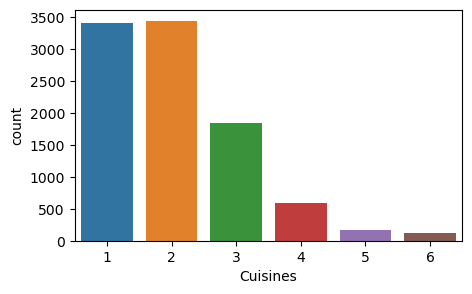

In [219]:
#Now let us see the relation after that we can one hot encode this
plt.figure(figsize=(5,3))
sns.countplot(x=data['Cuisines'])
plt.show()

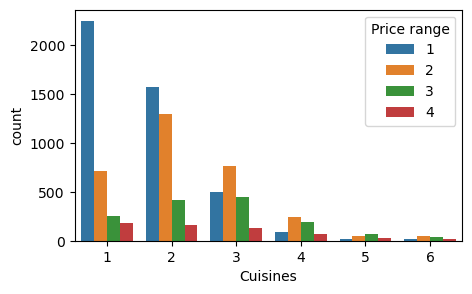

In [220]:
plt.figure(figsize=(5,3))
sns.countplot(x=data['Cuisines'],hue=data['Price range'])
plt.show()

<Figure size 500x300 with 0 Axes>

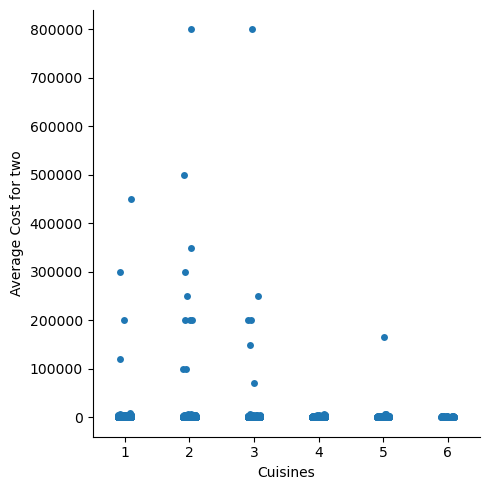

In [221]:
plt.figure(figsize=(5,3))
sns.catplot(x=data['Cuisines'],y=data["Average Cost for two"])
plt.show()

In [222]:
#ENcoding
a=one_hot.fit_transform(data[['Cuisines']])
a=pd.DataFrame(a,columns=['c1','c2','c3','c4','c5','c6'])

In [223]:
pd.concat([a,data],axis=1).head()

c1   c2   c3   c4   c5   c6  code1  code2  code3  Restaurant ID  \
0  0.0  0.0  1.0  0.0  0.0  0.0    0.0    0.0    1.0        6317637   
1  1.0  0.0  0.0  0.0  0.0  0.0    0.0    0.0    1.0        6304287   
2  0.0  0.0  0.0  1.0  0.0  0.0    0.0    0.0    1.0        6300002   
3  0.0  1.0  0.0  0.0  0.0  0.0    0.0    0.0    1.0        6318506   
4  0.0  1.0  0.0  0.0  0.0  0.0    0.0    0.0    1.0        6314302   

          Restaurant Name  City   Address  Locality  Longitude  Latitude  \
0        Le Petit Souffle     2 -0.343878         1   2.498033 -1.602771   
1        Izakaya Kikufuji     2 -0.343878         1   2.497306 -1.603989   
2  Heat - Edsa Shangri-La     4 -0.343878         1   2.499617 -1.601115   
3                    Ooma     4 -0.343878         3   2.499598 -1.600709   
4             Sambo Kojin     4 -0.343878         3   2.499653 -1.600799   

   Cuisines  Average Cost for two          Currency Has Table booking  \
0         3                  1100  Botswana Pula(P)               Yes   
1         1                  1200  Botswana Pula(P)               Yes   
2         4                  4000  Botswana Pula(P)               Yes   
3         2                  1500  Botswana Pula(P)                No   
4         2                  1500  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu  Price range  \
0                  No                No                   No            3   
1                  No                No                   No            3   
2                  No                No                   No            4   
3                  No                No                   No            4   
4                  No                No                   No            4   

   Aggregate rating Rating color Rating text  Votes Country  \
0               4.8   Dark Green   Excellent    314  others   
1               4.5   Dark Green   Excellent    591  others   
2               4.4        Green   Very Good    270  others   
3               4.9   Dark Green   Excellent    365  others   
4               4.8   Dark Green   Excellent    229  others   

   Transformed_outler_no  
0              -0.634799  
1              -0.634799  
2              -0.634799  
3              -0.634799  
4              -0.634799

In [224]:
data=pd.concat([a,data],axis=1)
data=data.drop(columns='Cuisines')
data.head()

c1   c2   c3   c4   c5   c6  code1  code2  code3  Restaurant ID  \
0  0.0  0.0  1.0  0.0  0.0  0.0    0.0    0.0    1.0        6317637   
1  1.0  0.0  0.0  0.0  0.0  0.0    0.0    0.0    1.0        6304287   
2  0.0  0.0  0.0  1.0  0.0  0.0    0.0    0.0    1.0        6300002   
3  0.0  1.0  0.0  0.0  0.0  0.0    0.0    0.0    1.0        6318506   
4  0.0  1.0  0.0  0.0  0.0  0.0    0.0    0.0    1.0        6314302   

          Restaurant Name  City   Address  Locality  Longitude  Latitude  \
0        Le Petit Souffle     2 -0.343878         1   2.498033 -1.602771   
1        Izakaya Kikufuji     2 -0.343878         1   2.497306 -1.603989   
2  Heat - Edsa Shangri-La     4 -0.343878         1   2.499617 -1.601115   
3                    Ooma     4 -0.343878         3   2.499598 -1.600709   
4             Sambo Kojin     4 -0.343878         3   2.499653 -1.600799   

   Average Cost for two          Currency Has Table booking  \
0                  1100  Botswana Pula(P)               Yes   
1                  1200  Botswana Pula(P)               Yes   
2                  4000  Botswana Pula(P)               Yes   
3                  1500  Botswana Pula(P)                No   
4                  1500  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu  Price range  \
0                  No                No                   No            3   
1                  No                No                   No            3   
2                  No                No                   No            4   
3                  No                No                   No            4   
4                  No                No                   No            4   

   Aggregate rating Rating color Rating text  Votes Country  \
0               4.8   Dark Green   Excellent    314  others   
1               4.5   Dark Green   Excellent    591  others   
2               4.4        Green   Very Good    270  others   
3               4.9   Dark Green   Excellent    365  others   
4               4.8   Dark Green   Excellent    229  others   

   Transformed_outler_no  
0              -0.634799  
1              -0.634799  
2              -0.634799  
3              -0.634799  
4              -0.634799

In [225]:
data['Average Cost for two'].value_counts()

Average Cost for two
500       900
300       897
400       857
200       687
600       652
         ... 
8000        1
2350        1
150000      1
70000       1
545         1
Name: count, Length: 140, dtype: int64

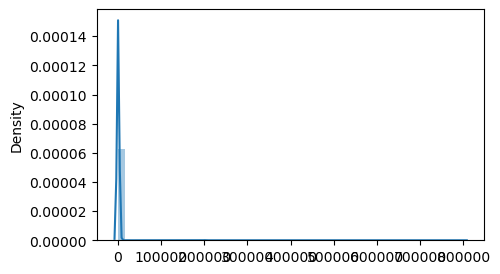

In [226]:
plt.figure(figsize=(5,3))
sns.distplot(x=data['Average Cost for two'])
plt.show()

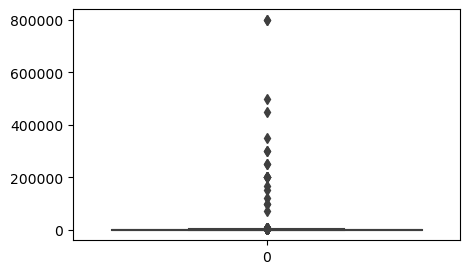

In [227]:
plt.figure(figsize=(5,3))
sns.boxplot(data['Average Cost for two'])
plt.show()

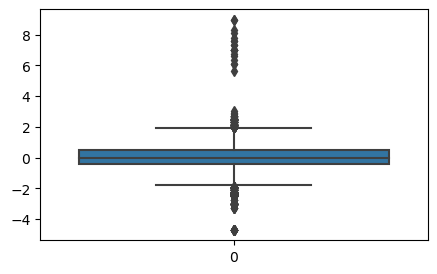

In [228]:
plt.figure(figsize=(5,3))
sns.boxplot(pt.fit_transform(data[['Average Cost for two']]))
plt.show()

In [229]:
#We will see the average cost for two later on
data.head()

c1   c2   c3   c4   c5   c6  code1  code2  code3  Restaurant ID  \
0  0.0  0.0  1.0  0.0  0.0  0.0    0.0    0.0    1.0        6317637   
1  1.0  0.0  0.0  0.0  0.0  0.0    0.0    0.0    1.0        6304287   
2  0.0  0.0  0.0  1.0  0.0  0.0    0.0    0.0    1.0        6300002   
3  0.0  1.0  0.0  0.0  0.0  0.0    0.0    0.0    1.0        6318506   
4  0.0  1.0  0.0  0.0  0.0  0.0    0.0    0.0    1.0        6314302   

          Restaurant Name  City   Address  Locality  Longitude  Latitude  \
0        Le Petit Souffle     2 -0.343878         1   2.498033 -1.602771   
1        Izakaya Kikufuji     2 -0.343878         1   2.497306 -1.603989   
2  Heat - Edsa Shangri-La     4 -0.343878         1   2.499617 -1.601115   
3                    Ooma     4 -0.343878         3   2.499598 -1.600709   
4             Sambo Kojin     4 -0.343878         3   2.499653 -1.600799   

   Average Cost for two          Currency Has Table booking  \
0                  1100  Botswana Pula(P)               Yes   
1                  1200  Botswana Pula(P)               Yes   
2                  4000  Botswana Pula(P)               Yes   
3                  1500  Botswana Pula(P)                No   
4                  1500  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu  Price range  \
0                  No                No                   No            3   
1                  No                No                   No            3   
2                  No                No                   No            4   
3                  No                No                   No            4   
4                  No                No                   No            4   

   Aggregate rating Rating color Rating text  Votes Country  \
0               4.8   Dark Green   Excellent    314  others   
1               4.5   Dark Green   Excellent    591  others   
2               4.4        Green   Very Good    270  others   
3               4.9   Dark Green   Excellent    365  others   
4               4.8   Dark Green   Excellent    229  others   

   Transformed_outler_no  
0              -0.634799  
1              -0.634799  
2              -0.634799  
3              -0.634799  
4              -0.634799

In [230]:
data['Currency'].value_counts()

Currency
Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(£)                  80
Brazilian Real(R$)          60
Emirati Diram(AED)          60
Rand(R)                     60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: count, dtype: int64

#Let us group all the currency except indian and he dollar together
One second this columns and the country column are exactly same so let us apply the chi2 to see

In [231]:
from scipy.stats import chi2_contingency

In [232]:
chi2_contingency(pd.crosstab(data['Currency'],data['Country']))

Chi2ContingencyResult(statistic=17263.135269709543, pvalue=0.0, dof=22, expected_freq=array([[1.99292221e+01, 9.99685897e-01, 1.07109203e+00],
       [5.43524238e+01, 2.72641608e+00, 2.92116009e+00],
       [4.36631138e+02, 2.19022092e+01, 2.34666527e+01],
       [5.43524238e+01, 2.72641608e+00, 2.92116009e+00],
       [7.83761952e+03, 3.93149199e+02, 4.21231285e+02],
       [1.90233483e+01, 9.54245629e-01, 1.02240603e+00],
       [3.62349492e+01, 1.81761072e+00, 1.94744006e+00],
       [7.24698984e+01, 3.63522144e+00, 3.89488012e+00],
       [1.81174746e+01, 9.08805361e-01, 9.73720029e-01],
       [5.43524238e+01, 2.72641608e+00, 2.92116009e+00],
       [1.81174746e+01, 9.08805361e-01, 9.73720029e-01],
       [3.07997068e+01, 1.54496911e+00, 1.65532405e+00]]))

In [233]:
data['Country'].value_counts()

Country
India            8652
others            465
United States     434
Name: count, dtype: int64

In [234]:
#They are related but let us use this also
data['Currency'].value_counts()

Currency
Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(£)                  80
Brazilian Real(R$)          60
Emirati Diram(AED)          60
Rand(R)                     60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: count, dtype: int64

In [240]:
def currency(value):
    if value in ['Indian Rupees(Rs.)','Dollar($)']:
        return value
    else:
         return 'others'

In [241]:
data['Currency'].apply(currency).value_counts()

Currency
Indian Rupees(Rs.)    8652
Dollar($)              482
others                 417
Name: count, dtype: int64

In [242]:
data['Currency']=data['Currency'].apply(currency)

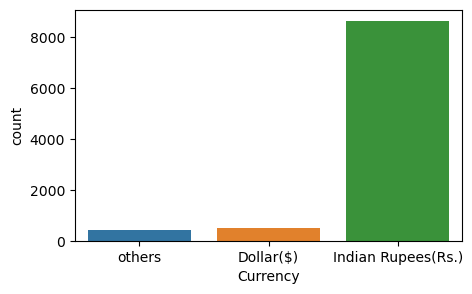

In [245]:
plt.figure(figsize=(5,3))
sns.countplot(x=data['Currency'])
plt.show()

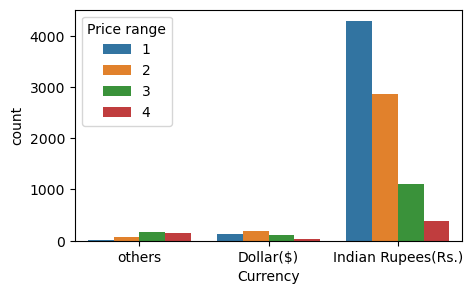

In [246]:
plt.figure(figsize=(5,3))
sns.countplot(x=data['Currency'],hue=data['Price range'])
plt.show()

In [247]:
#ONe hot encoding
a=one_hot.fit_transform(data[['Currency']])
a=pd.DataFrame(a,columns=['cu1','cu2','cu3'])
data=pd.concat([a,data],axis=1)
data=data.drop(columns='Currency')
data.head()

cu1  cu2  cu3   c1   c2   c3   c4   c5   c6  code1  code2  code3  \
0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0    0.0    0.0    1.0   
1  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0    0.0    1.0   
2  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0    0.0    0.0    1.0   
3  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0    0.0    1.0   
4  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0    0.0    1.0   

   Restaurant ID         Restaurant Name  City   Address  Locality  Longitude  \
0        6317637        Le Petit Souffle     2 -0.343878         1   2.498033   
1        6304287        Izakaya Kikufuji     2 -0.343878         1   2.497306   
2        6300002  Heat - Edsa Shangri-La     4 -0.343878         1   2.499617   
3        6318506                    Ooma     4 -0.343878         3   2.499598   
4        6314302             Sambo Kojin     4 -0.343878         3   2.499653   

   Latitude  Average Cost for two Has Table booking Has Online delivery  \
0 -1.602771                  1100               Yes                  No   
1 -1.603989                  1200               Yes                  No   
2 -1.601115                  4000               Yes                  No   
3 -1.600709                  1500                No                  No   
4 -1.600799                  1500               Yes                  No   

  Is delivering now Switch to order menu  Price range  Aggregate rating  \
0                No                   No            3               4.8   
1                No                   No            3               4.5   
2                No                   No            4               4.4   
3                No                   No            4               4.9   
4                No                   No            4               4.8   

  Rating color Rating text  Votes Country  Transformed_outler_no  
0   Dark Green   Excellent    314  others              -0.634799  
1   Dark Green   Excellent    591  others              -0.634799  
2        Green   Very Good    270  others              -0.634799  
3   Dark Green   Excellent    365  others              -0.634799  
4   Dark Green   Excellent    229  others              -0.634799

In [248]:
data['Has Table booking'].value_counts()

Has Table booking
No     8393
Yes    1158
Name: count, dtype: int64

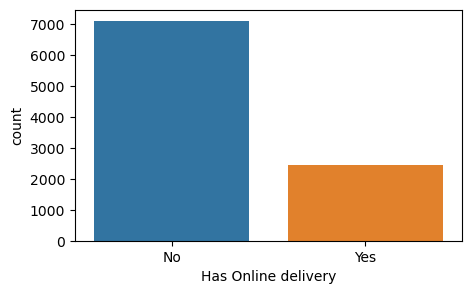

In [249]:
#Imbalance is there
plt.figure(figsize=(5,3))
sns.countplot(x=data['Has Online delivery'])
plt.show()

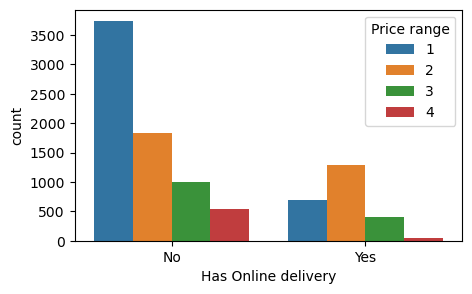

In [250]:
plt.figure(figsize=(5,3))
sns.countplot(x=data['Has Online delivery'],hue=data['Price range'])
plt.show()

<Figure size 500x300 with 0 Axes>

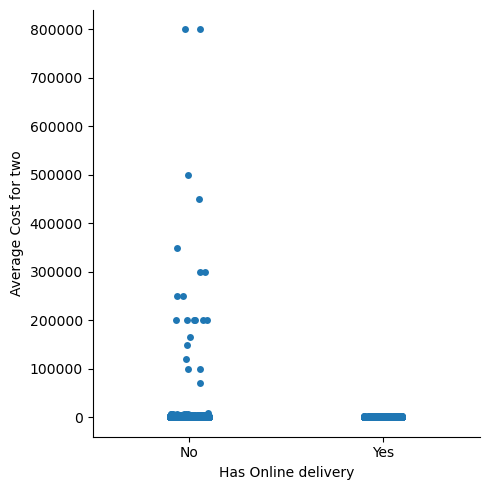

In [251]:
plt.figure(figsize=(5,3))
sns.catplot(x=data['Has Online delivery'],y=data['Average Cost for two'])
plt.show()

In [252]:
a=one_hot.fit_transform(data[['Has Online delivery']])
a=pd.DataFrame(a,columns=['d1','d2'])
data=pd.concat([a,data],axis=1)
data=data.drop(columns='Has Online delivery')
data.head()

d1   d2  cu1  cu2  cu3   c1   c2   c3   c4   c5   c6  code1  code2  code3  \
0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0    0.0    0.0    1.0   
1  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0    0.0    1.0   
2  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0    0.0    0.0    1.0   
3  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0    0.0    1.0   
4  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0    0.0    1.0   

   Restaurant ID         Restaurant Name  City   Address  Locality  Longitude  \
0        6317637        Le Petit Souffle     2 -0.343878         1   2.498033   
1        6304287        Izakaya Kikufuji     2 -0.343878         1   2.497306   
2        6300002  Heat - Edsa Shangri-La     4 -0.343878         1   2.499617   
3        6318506                    Ooma     4 -0.343878         3   2.499598   
4        6314302             Sambo Kojin     4 -0.343878         3   2.499653   

   Latitude  Average Cost for two Has Table booking Is delivering now  \
0 -1.602771                  1100               Yes                No   
1 -1.603989                  1200               Yes                No   
2 -1.601115                  4000               Yes                No   
3 -1.600709                  1500                No                No   
4 -1.600799                  1500               Yes                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   

  Rating text  Votes Country  Transformed_outler_no  
0   Excellent    314  others              -0.634799  
1   Excellent    591  others              -0.634799  
2   Very Good    270  others              -0.634799  
3   Excellent    365  others              -0.634799  
4   Excellent    229  others              -0.634799

In [253]:
data['Has Table booking'].value_counts()

Has Table booking
No     8393
Yes    1158
Name: count, dtype: int64

In [254]:
a=one_hot.fit_transform(data[['Has Table booking']])
a=pd.DataFrame(a,columns=['b1','b2'])
data=pd.concat([a,data],axis=1)
data=data.drop(columns='Has Table booking')
data.head()

b1   b2   d1   d2  cu1  cu2  cu3   c1   c2   c3   c4   c5   c6  code1  \
0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0    0.0   
1  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0   
2  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0    0.0   
3  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0   
4  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0   

   code2  code3  Restaurant ID         Restaurant Name  City   Address  \
0    0.0    1.0        6317637        Le Petit Souffle     2 -0.343878   
1    0.0    1.0        6304287        Izakaya Kikufuji     2 -0.343878   
2    0.0    1.0        6300002  Heat - Edsa Shangri-La     4 -0.343878   
3    0.0    1.0        6318506                    Ooma     4 -0.343878   
4    0.0    1.0        6314302             Sambo Kojin     4 -0.343878   

   Locality  Longitude  Latitude  Average Cost for two Is delivering now  \
0         1   2.498033 -1.602771                  1100                No   
1         1   2.497306 -1.603989                  1200                No   
2         1   2.499617 -1.601115                  4000                No   
3         3   2.499598 -1.600709                  1500                No   
4         3   2.499653 -1.600799                  1500                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   

  Rating text  Votes Country  Transformed_outler_no  
0   Excellent    314  others              -0.634799  
1   Excellent    591  others              -0.634799  
2   Very Good    270  others              -0.634799  
3   Excellent    365  others              -0.634799  
4   Excellent    229  others              -0.634799

In [255]:
data['Is delivering now'].value_counts()

Is delivering now
No     9517
Yes      34
Name: count, dtype: int64

In [256]:
#This column is really imbalanced but still use this and see if we can get a good accuracy or not
a=one_hot.fit_transform(data[['Is delivering now']])
a=pd.DataFrame(a,columns=['de1','de2'])
data=pd.concat([a,data],axis=1)
data=data.drop(columns='Is delivering now')
data.head()

de1  de2   b1   b2   d1   d2  cu1  cu2  cu3   c1   c2   c3   c4   c5   c6  \
0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0   
1  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0   
2  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0   
3  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   
4  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   

   code1  code2  code3  Restaurant ID         Restaurant Name  City   Address  \
0    0.0    0.0    1.0        6317637        Le Petit Souffle     2 -0.343878   
1    0.0    0.0    1.0        6304287        Izakaya Kikufuji     2 -0.343878   
2    0.0    0.0    1.0        6300002  Heat - Edsa Shangri-La     4 -0.343878   
3    0.0    0.0    1.0        6318506                    Ooma     4 -0.343878   
4    0.0    0.0    1.0        6314302             Sambo Kojin     4 -0.343878   

   Locality  Longitude  Latitude  Average Cost for two Switch to order menu  \
0         1   2.498033 -1.602771                  1100                   No   
1         1   2.497306 -1.603989                  1200                   No   
2         1   2.499617 -1.601115                  4000                   No   
3         3   2.499598 -1.600709                  1500                   No   
4         3   2.499653 -1.600799                  1500                   No   

   Price range  Aggregate rating Rating color Rating text  Votes Country  \
0            3               4.8   Dark Green   Excellent    314  others   
1            3               4.5   Dark Green   Excellent    591  others   
2            4               4.4        Green   Very Good    270  others   
3            4               4.9   Dark Green   Excellent    365  others   
4            4               4.8   Dark Green   Excellent    229  others   

   Transformed_outler_no  
0              -0.634799  
1              -0.634799  
2              -0.634799  
3              -0.634799  
4              -0.634799

In [257]:
data['Switch to order menu'].value_counts()

Switch to order menu
No    9551
Name: count, dtype: int64

In [258]:
#No use of this columns let us delete this
data=data.drop(columns='Switch to order menu')

In [259]:
data.head()

de1  de2   b1   b2   d1   d2  cu1  cu2  cu3   c1   c2   c3   c4   c5   c6  \
0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0   
1  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0   
2  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0   
3  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   
4  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   

   code1  code2  code3  Restaurant ID         Restaurant Name  City   Address  \
0    0.0    0.0    1.0        6317637        Le Petit Souffle     2 -0.343878   
1    0.0    0.0    1.0        6304287        Izakaya Kikufuji     2 -0.343878   
2    0.0    0.0    1.0        6300002  Heat - Edsa Shangri-La     4 -0.343878   
3    0.0    0.0    1.0        6318506                    Ooma     4 -0.343878   
4    0.0    0.0    1.0        6314302             Sambo Kojin     4 -0.343878   

   Locality  Longitude  Latitude  Average Cost for two  Price range  \
0         1   2.498033 -1.602771                  1100            3   
1         1   2.497306 -1.603989                  1200            3   
2         1   2.499617 -1.601115                  4000            4   
3         3   2.499598 -1.600709                  1500            4   
4         3   2.499653 -1.600799                  1500            4   

   Aggregate rating Rating color Rating text  Votes Country  \
0               4.8   Dark Green   Excellent    314  others   
1               4.5   Dark Green   Excellent    591  others   
2               4.4        Green   Very Good    270  others   
3               4.9   Dark Green   Excellent    365  others   
4               4.8   Dark Green   Excellent    229  others   

   Transformed_outler_no  
0              -0.634799  
1              -0.634799  
2              -0.634799  
3              -0.634799  
4              -0.634799

In [260]:
data['Price range'].value_counts()

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

In [261]:
#THis is our one of the label and we will treat this later on after treating all the remaining colunmns
data['Aggregate rating'].value_counts()

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
       ... 
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, Length: 33, dtype: int64

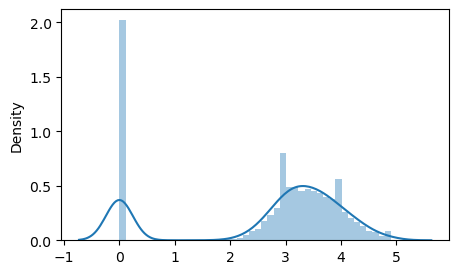

In [262]:
plt.figure(figsize=(5,3))
sns.distplot(x=data['Aggregate rating'])
plt.show()

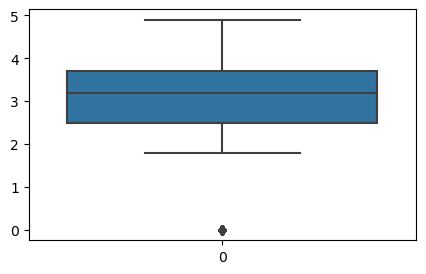

In [263]:
plt.figure(figsize=(5,3))
sns.boxplot(data['Aggregate rating'])
plt.show()

In [264]:
#SOme outliers are there which will be treated later on
data.head()

de1  de2   b1   b2   d1   d2  cu1  cu2  cu3   c1   c2   c3   c4   c5   c6  \
0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0   
1  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0   
2  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0   
3  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   
4  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   

   code1  code2  code3  Restaurant ID         Restaurant Name  City   Address  \
0    0.0    0.0    1.0        6317637        Le Petit Souffle     2 -0.343878   
1    0.0    0.0    1.0        6304287        Izakaya Kikufuji     2 -0.343878   
2    0.0    0.0    1.0        6300002  Heat - Edsa Shangri-La     4 -0.343878   
3    0.0    0.0    1.0        6318506                    Ooma     4 -0.343878   
4    0.0    0.0    1.0        6314302             Sambo Kojin     4 -0.343878   

   Locality  Longitude  Latitude  Average Cost for two  Price range  \
0         1   2.498033 -1.602771                  1100            3   
1         1   2.497306 -1.603989                  1200            3   
2         1   2.499617 -1.601115                  4000            4   
3         3   2.499598 -1.600709                  1500            4   
4         3   2.499653 -1.600799                  1500            4   

   Aggregate rating Rating color Rating text  Votes Country  \
0               4.8   Dark Green   Excellent    314  others   
1               4.5   Dark Green   Excellent    591  others   
2               4.4        Green   Very Good    270  others   
3               4.9   Dark Green   Excellent    365  others   
4               4.8   Dark Green   Excellent    229  others   

   Transformed_outler_no  
0              -0.634799  
1              -0.634799  
2              -0.634799  
3              -0.634799  
4              -0.634799

In [265]:
data['Rating color'].value_counts()

Rating color
Orange        3737
White         2148
Yellow        2100
Green         1079
Dark Green     301
Red            186
Name: count, dtype: int64

In [266]:
#COmbining the red and green together as red has vey less
data['Rating color']=data['Rating color'].replace('Red','Dark Green')
data['Rating color'].value_counts()

Rating color
Orange        3737
White         2148
Yellow        2100
Green         1079
Dark Green     487
Name: count, dtype: int64

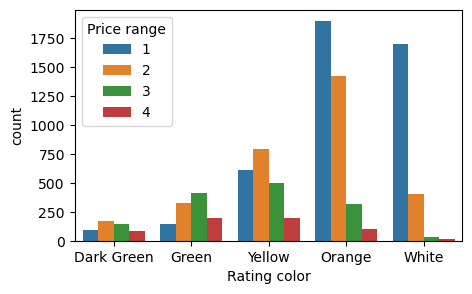

In [267]:
plt.figure(figsize=(5,3))
sns.countplot(x=data['Rating color'],hue=data['Price range'])
plt.show()

Dominance of different price range can be seen in different rating colour which means some kind of relation is definately is there.

In [268]:
a=one_hot.fit_transform(data[['Rating color']])
a=pd.DataFrame(a,columns=['col1','col2','col3','col4','col5'])
data=pd.concat([a,data],axis=1)
data=data.drop(columns='Rating color')
data.head()

col1  col2  col3  col4  col5  de1  de2   b1   b2   d1   d2  cu1  cu2  cu3  \
0   1.0   0.0   0.0   0.0   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0   
1   1.0   0.0   0.0   0.0   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0   
2   0.0   1.0   0.0   0.0   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0   
3   1.0   0.0   0.0   0.0   0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0   
4   1.0   0.0   0.0   0.0   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0   

    c1   c2   c3   c4   c5   c6  code1  code2  code3  Restaurant ID  \
0  0.0  0.0  1.0  0.0  0.0  0.0    0.0    0.0    1.0        6317637   
1  1.0  0.0  0.0  0.0  0.0  0.0    0.0    0.0    1.0        6304287   
2  0.0  0.0  0.0  1.0  0.0  0.0    0.0    0.0    1.0        6300002   
3  0.0  1.0  0.0  0.0  0.0  0.0    0.0    0.0    1.0        6318506   
4  0.0  1.0  0.0  0.0  0.0  0.0    0.0    0.0    1.0        6314302   

          Restaurant Name  City   Address  Locality  Longitude  Latitude  \
0        Le Petit Souffle     2 -0.343878         1   2.498033 -1.602771   
1        Izakaya Kikufuji     2 -0.343878         1   2.497306 -1.603989   
2  Heat - Edsa Shangri-La     4 -0.343878         1   2.499617 -1.601115   
3                    Ooma     4 -0.343878         3   2.499598 -1.600709   
4             Sambo Kojin     4 -0.343878         3   2.499653 -1.600799   

   Average Cost for two  Price range  Aggregate rating Rating text  Votes  \
0                  1100            3               4.8   Excellent    314   
1                  1200            3               4.5   Excellent    591   
2                  4000            4               4.4   Very Good    270   
3                  1500            4               4.9   Excellent    365   
4                  1500            4               4.8   Excellent    229   

  Country  Transformed_outler_no  
0  others              -0.634799  
1  others              -0.634799  
2  others              -0.634799  
3  others              -0.634799  
4  others              -0.634799

In [269]:
data['Rating text'].value_counts()

Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64

In [270]:
a=one_hot.fit_transform(data[['Rating text']])
a=pd.DataFrame(a,columns=['ra1','ra2','ra3','ra4','ra5','ra6'])
data=pd.concat([a,data],axis=1)
data=data.drop(columns='Rating text')
data.head()

ra1  ra2  ra3  ra4  ra5  ra6  col1  col2  col3  col4  col5  de1  de2   b1  \
0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0  0.0   
1  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0  0.0   
3  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0  1.0   
4  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0  0.0   

    b2   d1   d2  cu1  cu2  cu3   c1   c2   c3   c4   c5   c6  code1  code2  \
0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0    0.0    0.0   
1  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0    0.0   
2  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0    0.0    0.0   
3  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0    0.0   
4  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0    0.0   

   code3  Restaurant ID         Restaurant Name  City   Address  Locality  \
0    1.0        6317637        Le Petit Souffle     2 -0.343878         1   
1    1.0        6304287        Izakaya Kikufuji     2 -0.343878         1   
2    1.0        6300002  Heat - Edsa Shangri-La     4 -0.343878         1   
3    1.0        6318506                    Ooma     4 -0.343878         3   
4    1.0        6314302             Sambo Kojin     4 -0.343878         3   

   Longitude  Latitude  Average Cost for two  Price range  Aggregate rating  \
0   2.498033 -1.602771                  1100            3               4.8   
1   2.497306 -1.603989                  1200            3               4.5   
2   2.499617 -1.601115                  4000            4               4.4   
3   2.499598 -1.600709                  1500            4               4.9   
4   2.499653 -1.600799                  1500            4               4.8   

   Votes Country  Transformed_outler_no  
0    314  others              -0.634799  
1    591  others              -0.634799  
2    270  others              -0.634799  
3    365  others              -0.634799  
4    229  others              -0.634799

In [271]:
data['Votes'].value_counts()

Votes
0      1094
1       483
2       327
3       244
4       207
       ... 
538       1
823       1
650       1
660       1
901       1
Name: count, Length: 1012, dtype: int64

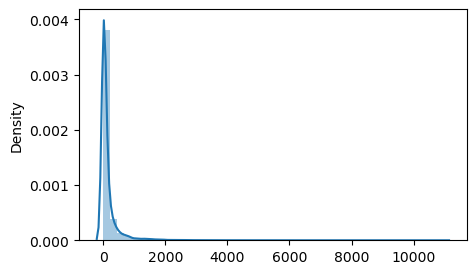

In [272]:
plt.figure(figsize=(5,3))
sns.distplot(x=data['Votes'])
plt.show()

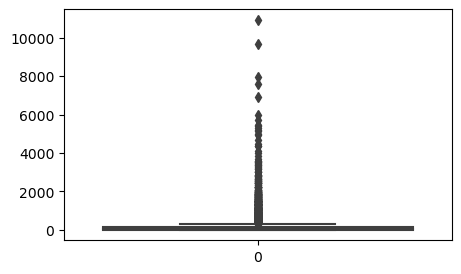

In [273]:
plt.figure(figsize=(5,3))
sns.boxplot(data['Votes'])
plt.show()

In [547]:
pt = PowerTransformer(method='yeo-johnson')

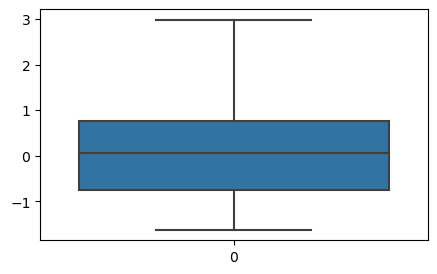

In [274]:
plt.figure(figsize=(5,3))
sns.boxplot(pt.fit_transform(data[['Votes']]))
plt.show()

In [549]:
#With the transformed there are no outliers

In [275]:
Zscore=np.abs(zscore(data['Votes']))
len(np.where(Zscore>3)[0])

173

In [276]:
Zscore=np.abs(zscore(pt.fit_transform(data[['Votes']])))
len(np.where(Zscore>3)[0])

0

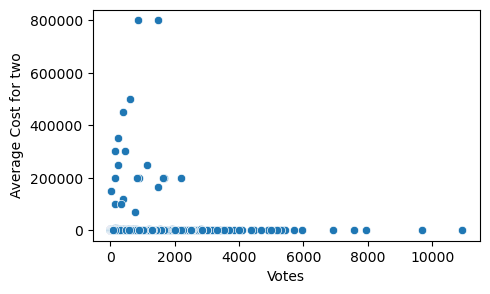

In [277]:
#We we make the model with both and see which has a better accurayc
plt.figure(figsize=(5,3))
sns.scatterplot(x=data['Votes'],y=data['Average Cost for two'])
plt.show()

In [278]:
transformed=pt.fit_transform(data[['Votes']])

In [279]:
transformed=pd.DataFrame(transformed,columns=['VOtes_trans'])

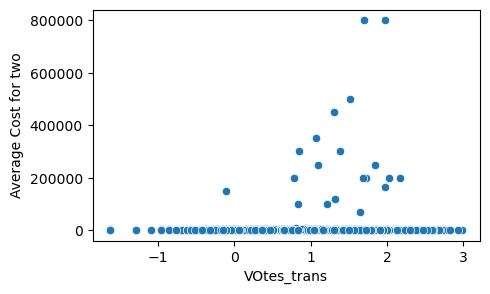

In [280]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=transformed['VOtes_trans'],y=data['Average Cost for two'])
plt.show()

In [281]:
pd.concat([data['Average Cost for two'],transformed['VOtes_trans'],data['Votes']],axis=1).corr()

Average Cost for two  VOtes_trans     Votes
Average Cost for two              1.000000     0.070303  0.067783
VOtes_trans                       0.070303     1.000000  0.556147
Votes                             0.067783     0.556147  1.000000

In [282]:
#After the transformation the label is now more realted so we will use the transformed columns
data['Votes']=transformed['VOtes_trans']

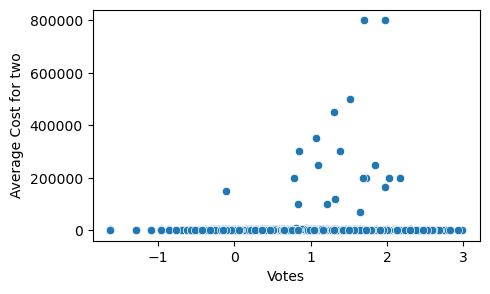

In [283]:
#We we make the model with both and see which has a better accurayc
plt.figure(figsize=(5,3))
sns.scatterplot(x=data['Votes'],y=data['Average Cost for two'])
plt.show()

In [284]:
data.head()

ra1  ra2  ra3  ra4  ra5  ra6  col1  col2  col3  col4  col5  de1  de2   b1  \
0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0  0.0   
1  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0  0.0   
3  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0  1.0   
4  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0  0.0   

    b2   d1   d2  cu1  cu2  cu3   c1   c2   c3   c4   c5   c6  code1  code2  \
0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0    0.0    0.0   
1  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0    0.0   
2  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0    0.0    0.0   
3  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0    0.0   
4  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0    0.0   

   code3  Restaurant ID         Restaurant Name  City   Address  Locality  \
0    1.0        6317637        Le Petit Souffle     2 -0.343878         1   
1    1.0        6304287        Izakaya Kikufuji     2 -0.343878         1   
2    1.0        6300002  Heat - Edsa Shangri-La     4 -0.343878         1   
3    1.0        6318506                    Ooma     4 -0.343878         3   
4    1.0        6314302             Sambo Kojin     4 -0.343878         3   

   Longitude  Latitude  Average Cost for two  Price range  Aggregate rating  \
0   2.498033 -1.602771                  1100            3               4.8   
1   2.497306 -1.603989                  1200            3               4.5   
2   2.499617 -1.601115                  4000            4               4.4   
3   2.499598 -1.600709                  1500            4               4.9   
4   2.499653 -1.600799                  1500            4               4.8   

      Votes Country  Transformed_outler_no  
0  1.191885  others              -0.634799  
1  1.507786  others              -0.634799  
2  1.116765  others              -0.634799  
3  1.266889  others              -0.634799  
4  1.034953  others              -0.634799

In [285]:
full_dataset=data.copy() #creted a copy maybe we need it later on

In [286]:
data=data.drop(columns=['Restaurant Name','Country'])

In [288]:
data.head()

ra1  ra2  ra3  ra4  ra5  ra6  col1  col2  col3  col4  col5  de1  de2   b1  \
0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0  0.0   
1  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0  0.0   
3  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0  1.0   
4  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0  0.0   

    b2   d1   d2  cu1  cu2  cu3   c1   c2   c3   c4   c5   c6  code1  code2  \
0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0    0.0    0.0   
1  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0    0.0   
2  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0    0.0    0.0   
3  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0    0.0   
4  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0    0.0   

   code3  Restaurant ID  City   Address  Locality  Longitude  Latitude  \
0    1.0        6317637     2 -0.343878         1   2.498033 -1.602771   
1    1.0        6304287     2 -0.343878         1   2.497306 -1.603989   
2    1.0        6300002     4 -0.343878         1   2.499617 -1.601115   
3    1.0        6318506     4 -0.343878         3   2.499598 -1.600709   
4    1.0        6314302     4 -0.343878         3   2.499653 -1.600799   

   Average Cost for two  Price range  Aggregate rating     Votes  \
0                  1100            3               4.8  1.191885   
1                  1200            3               4.5  1.507786   
2                  4000            4               4.4  1.116765   
3                  1500            4               4.9  1.266889   
4                  1500            4               4.8  1.034953   

   Transformed_outler_no  
0              -0.634799  
1              -0.634799  
2              -0.634799  
3              -0.634799  
4              -0.634799

In [295]:
zomato_data

Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730              NamlÛ± Gurme           208         ÛÁstanbul   
9547        5908749             Ceviz AÛôacÛ±           208         ÛÁstanbul   
9548        5915807                     Huqqa           208         ÛÁstanbul   
9549        5916112              Aôôk Kahve           208         ÛÁstanbul   
9550        5927402  Walter's Coffee Roastery           208         ÛÁstanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...   
9547  Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...   
9548  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9550  CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karakí_y   
9547                                   Koôuyolu   
9548                                 Kuruí_eôme   
9549                                 Kuruí_eôme   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karakí_y, ÛÁstanbul   28.977392   
9547                               Koôuyolu, ÛÁstanbul   29.041297   
9548                             Kuruí_eôme, ÛÁstanbul   29.034640   
9549                             Kuruí_eôme, ÛÁstanbul   29.036019   
9550                                    Moda, ÛÁstanbul   29.026016   

       Latitude                          Cuisines  Average Cost for two  \
0     14.565443        French, Japanese, Desserts                  1100   
1     14.553708                          Japanese                  1200   
2     14.581404  Seafood, Asian, Filipino, Indian                  4000   
3     14.585318                   Japanese, Sushi                  1500   
4     14.584450                  Japanese, Korean                  1500   
...         ...                               ...                   ...   
9546  41.022793                           Turkish                    80   
9547  41.009847   World Cuisine, Patisserie, Cafe                   105   
9548  41.055817            Italian, World Cuisine                   170   
9549  41.057979                   Restaurant Cafe                   120   
9550  40.984776      

In [297]:
zomato_data['Restaurant Name'].value_counts()

Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: count, Length: 7446, dtype: int64

In [298]:
data['Restaurant Name']=zomato_data['Restaurant Name']

In [299]:
data.head()

ra1  ra2  ra3  ra4  ra5  ra6  col1  col2  col3  col4  col5  de1  de2   b1  \
0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0  0.0   
1  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0  0.0   
3  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0  1.0   
4  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0  0.0   

    b2   d1   d2  cu1  cu2  cu3   c1   c2   c3   c4   c5   c6  code1  code2  \
0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0    0.0    0.0   
1  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0    0.0   
2  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0    0.0    0.0   
3  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0    0.0   
4  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0    0.0   

   code3  Restaurant ID  City   Address  Locality  Longitude  Latitude  \
0    1.0        6317637     2 -0.343878         1   2.498033 -1.602771   
1    1.0        6304287     2 -0.343878         1   2.497306 -1.603989   
2    1.0        6300002     4 -0.343878         1   2.499617 -1.601115   
3    1.0        6318506     4 -0.343878         3   2.499598 -1.600709   
4    1.0        6314302     4 -0.343878         3   2.499653 -1.600799   

   Average Cost for two  Price range  Aggregate rating     Votes  \
0                  1100            3               4.8  1.191885   
1                  1200            3               4.5  1.507786   
2                  4000            4               4.4  1.116765   
3                  1500            4               4.9  1.266889   
4                  1500            4               4.8  1.034953   

   Transformed_outler_no         Restaurant Name  
0              -0.634799        Le Petit Souffle  
1              -0.634799        Izakaya Kikufuji  
2              -0.634799  Heat - Edsa Shangri-La  
3              -0.634799                    Ooma  
4              -0.634799             Sambo Kojin

In [300]:
#Still one column restaurant name left for encoding
data['Restaurant Name'].value_counts()

Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: count, Length: 7446, dtype: int64

In [301]:
restaurant=data['Restaurant Name'].value_counts()
restaurant

Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: count, Length: 7446, dtype: int64

In [302]:
restaurant['Cafe Coffee Day']

83

In [303]:
def restaurant_name(value):
    return restaurant[value]

In [306]:
a=data['Restaurant Name'].apply(restaurant_name)

<Axes: xlabel='Restaurant Name', ylabel='Density'>

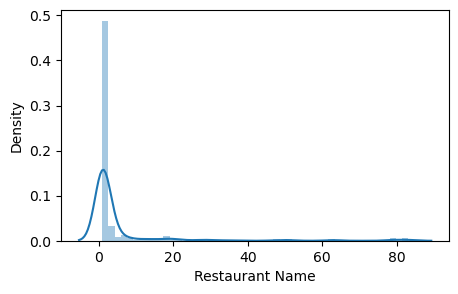

In [307]:
plt.figure(figsize=(5,3))
sns.distplot(a)

In [316]:
transformed=pt.fit_transform(data['Restaurant Name'].apply(restaurant_name).values.reshape(-1,1))
transformed

array([[-0.6247539],
       [-0.6247539],
       [-0.6247539],
       ...,
       [-0.6247539],
       [-0.6247539],
       [-0.6247539]])

<Axes: ylabel='Density'>

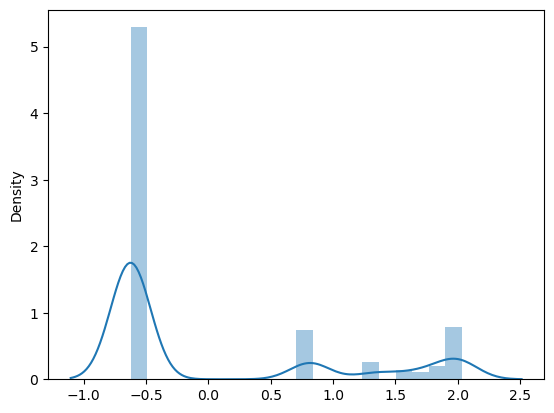

In [317]:
sns.distplot(transformed)

<Axes: >

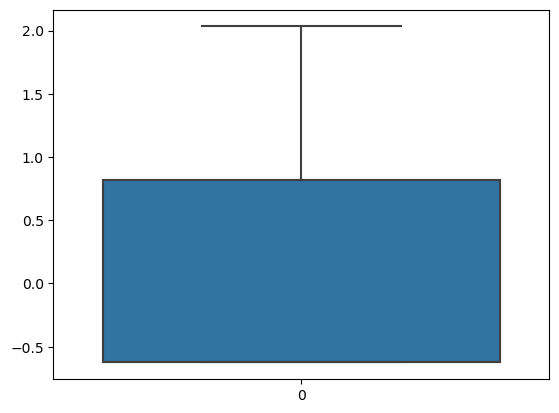

In [318]:
sns.boxplot(transformed)

<Axes: >

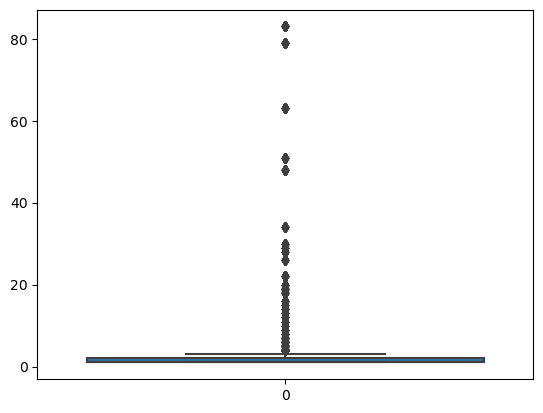

In [319]:
sns.boxplot(data['Restaurant Name'].apply(restaurant_name))

In [321]:
transformed=pd.DataFrame(transformed,columns=['Transformed_restaurant'])

In [322]:
transformed['Transformed_restaurant']

0      -0.624754
1      -0.624754
2      -0.624754
3      -0.624754
4      -0.624754
          ...   
9546   -0.624754
9547   -0.624754
9548   -0.624754
9549   -0.624754
9550   -0.624754
Name: Transformed_restaurant, Length: 9551, dtype: float64

<Axes: >

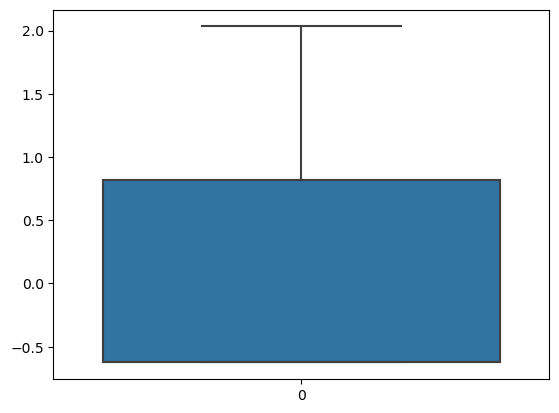

In [323]:
sns.boxplot(transformed['Transformed_restaurant'])

In [329]:
pd.concat([data['Average Cost for two'],data['Restaurant Name'].apply(restaurant_name),transformed['Transformed_restaurant']],axis=1).corr()

Average Cost for two  Restaurant Name  \
Average Cost for two                1.000000        -0.011640   
Restaurant Name                    -0.011640         1.000000   
Transformed_restaurant             -0.015078         0.596554   

                        Transformed_restaurant  
Average Cost for two                 -0.015078  
Restaurant Name                       0.596554  
Transformed_restaurant                1.000000

In [330]:
data['Restaurant Name'].value_counts()

Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: count, Length: 7446, dtype: int64

In [331]:
data['Restaurant Name']=transformed['Transformed_restaurant']

In [332]:
data.head()

ra1  ra2  ra3  ra4  ra5  ra6  col1  col2  col3  col4  col5  de1  de2   b1  \
0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0  0.0   
1  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0  0.0   
3  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0  1.0   
4  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0  0.0   

    b2   d1   d2  cu1  cu2  cu3   c1   c2   c3   c4   c5   c6  code1  code2  \
0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0    0.0    0.0   
1  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0    0.0   
2  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0    0.0    0.0   
3  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0    0.0   
4  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0    0.0   

   code3  Restaurant ID  City   Address  Locality  Longitude  Latitude  \
0    1.0        6317637     2 -0.343878         1   2.498033 -1.602771   
1    1.0        6304287     2 -0.343878         1   2.497306 -1.603989   
2    1.0        6300002     4 -0.343878         1   2.499617 -1.601115   
3    1.0        6318506     4 -0.343878         3   2.499598 -1.600709   
4    1.0        6314302     4 -0.343878         3   2.499653 -1.600799   

   Average Cost for two  Price range  Aggregate rating     Votes  \
0                  1100            3               4.8  1.191885   
1                  1200            3               4.5  1.507786   
2                  4000            4               4.4  1.116765   
3                  1500            4               4.9  1.266889   
4                  1500            4               4.8  1.034953   

   Transformed_outler_no  Restaurant Name  
0              -0.634799        -0.624754  
1              -0.634799        -0.624754  
2              -0.634799        -0.624754  
3              -0.634799        -0.624754  
4              -0.634799        -0.624754

In [333]:
full_dataset=data.copy()
full_dataset.head()

ra1  ra2  ra3  ra4  ra5  ra6  col1  col2  col3  col4  col5  de1  de2   b1  \
0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0  0.0   
1  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0  0.0   
3  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0  1.0   
4  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0  0.0   

    b2   d1   d2  cu1  cu2  cu3   c1   c2   c3   c4   c5   c6  code1  code2  \
0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0    0.0    0.0   
1  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0    0.0   
2  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0    0.0    0.0   
3  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0    0.0   
4  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0    0.0   

   code3  Restaurant ID  City   Address  Locality  Longitude  Latitude  \
0    1.0        6317637     2 -0.343878         1   2.498033 -1.602771   
1    1.0        6304287     2 -0.343878         1   2.497306 -1.603989   
2    1.0        6300002     4 -0.343878         1   2.499617 -1.601115   
3    1.0        6318506     4 -0.343878         3   2.499598 -1.600709   
4    1.0        6314302     4 -0.343878         3   2.499653 -1.600799   

   Average Cost for two  Price range  Aggregate rating     Votes  \
0                  1100            3               4.8  1.191885   
1                  1200            3               4.5  1.507786   
2                  4000            4               4.4  1.116765   
3                  1500            4               4.9  1.266889   
4                  1500            4               4.8  1.034953   

   Transformed_outler_no  Restaurant Name  
0              -0.634799        -0.624754  
1              -0.634799        -0.624754  
2              -0.634799        -0.624754  
3              -0.634799        -0.624754  
4              -0.634799        -0.624754

In [ ]:
#At first we will be making the regression model
#At first let us clean out dataste by deleting all the outliers

In [334]:
data.columns

Index(['ra1', 'ra2', 'ra3', 'ra4', 'ra5', 'ra6', 'col1', 'col2', 'col3',
       'col4', 'col5', 'de1', 'de2', 'b1', 'b2', 'd1', 'd2', 'cu1', 'cu2',
       'cu3', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'code1', 'code2', 'code3',
       'Restaurant ID', 'City', 'Address', 'Locality', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes',
       'Transformed_outler_no', 'Restaurant Name'],
      dtype='object')

In [337]:
continous_columns=['Restaurant ID', 'City', 'Address', 'Locality', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes',
       'Transformed_outler_no', 'Restaurant Name']

In [338]:
data[continous_columns]

Restaurant ID  City   Address  Locality  Longitude  Latitude  \
0           6317637     2 -0.343878         1   2.498033 -1.602771   
1           6304287     2 -0.343878         1   2.497306 -1.603989   
2           6300002     4 -0.343878         1   2.499617 -1.601115   
3           6318506     4 -0.343878         3   2.499598 -1.600709   
4           6314302     4 -0.343878         3   2.499653 -1.600799   
...             ...   ...       ...       ...        ...       ...   
9546        5915730    14 -0.343878         4  -1.640540  2.270905   
9547        5908749    14 -0.343878         1  -1.638445  2.268528   
9548        5915807    14 -0.343878         2  -1.638664  2.276969   
9549        5916112    14 -0.343878         2  -1.638619  2.277366   
9550        5927402    14 -0.343878         1  -1.638946  2.263927   

      Average Cost for two  Price range  Aggregate rating     Votes  \
0                     1100            3               4.8  1.191885   
1                     1200            3               4.5  1.507786   
2                     4000            4               4.4  1.116765   
3                     1500            4               4.9  1.266889   
4                     1500            4               4.8  1.034953   
...                    ...          ...               ...       ...   
9546                    80            3               4.1  1.652086   
9547                   105            3               4.2  1.788687   
9548                   170            4               3.7  1.563891   
9549                   120            4               4.0  1.719424   
9550                    55            2               4.0  1.507786   

      Transformed_outler_no  Restaurant Name  
0                 -0.634799        -0.624754  
1                 -0.634799        -0.624754  
2                 -0.634799        -0.624754  
3                 -0.634799        -0.624754  
4                 -0.634799        -0.624754  
...                     ...              ...  
9546              -0.634799        -0.624754  
9547              -0.634799        -0.624754  
9548              -0.634799        -0.624754  
9549              -0.634799        -0.624754  
9550              -0.634799        -0.624754  

[9551 rows x 12 columns]

In [339]:
Zscore=np.abs(zscore(data[continous_columns]))

In [342]:
index=np.where(Zscore>3)[0]

In [343]:
len(index)

169

In [ ]:
#Onlt 169 rows with outliers we can surely delete it

In [344]:
index

array([ 182,  183,  327,  493,  516,  518,  519,  520,  521,  522,  523,
        524,  525,  526,  527,  528,  529,  530,  532,  533,  534,  535,
        536,  537,  538,  539,  541,  543, 9276, 9277, 9278, 9279, 9280,
       9281, 9282, 9283, 9284, 9285, 9286, 9287, 9288, 9289, 9290, 9291,
       9292, 9293, 9294, 9295, 9296, 9297, 9298, 9299, 9300, 9301, 9302,
       9303, 9304, 9305, 9306, 9307, 9308, 9309, 9310, 9311, 9312, 9313,
       9314, 9315, 9316, 9317, 9318, 9319, 9320, 9321, 9322, 9323, 9324,
       9325, 9326, 9327, 9328, 9329, 9330, 9331, 9332, 9333, 9334, 9335,
       9336, 9337, 9338, 9339, 9340, 9341, 9342, 9343, 9344, 9345, 9346,
       9347, 9348, 9349, 9350, 9351, 9352, 9353, 9354, 9355, 9356, 9357,
       9358, 9359, 9360, 9361, 9362, 9363, 9364, 9365, 9366, 9367, 9368,
       9369, 9370, 9371, 9372, 9373, 9374, 9375, 9376, 9377, 9378, 9379,
       9380, 9381, 9382, 9383, 9384, 9385, 9386, 9387, 9388, 9389, 9390,
       9391, 9392, 9393, 9394, 9395, 9396, 9397, 93

In [346]:
Zscore.iloc[9413]

Restaurant ID            0.256040
City                     1.392193
Address                  0.343878
Locality                 1.246585
Longitude                2.374260
Latitude                 4.744363
Average Cost for two     0.072530
Price range              0.215516
Aggregate rating         1.011430
Votes                    1.290903
Transformed_outler_no    0.634799
Restaurant Name          0.624754
Name: 9413, dtype: float64

In [347]:
Zscore.iloc[182]

Restaurant ID            0.967751
City                     1.400021
Address                  0.343878
Locality                 1.316759
Longitude                2.678418
Latitude                 3.240074
Average Cost for two     0.073771
Price range              0.888771
Aggregate rating         1.077380
Votes                    0.605945
Transformed_outler_no    0.634799
Restaurant Name          0.624754
Name: 182, dtype: float64

In [348]:
np.where(zscore(data['Restaurant ID'])>3)

(array([], dtype=int64),)

In [350]:
#Let us delete the outliers
data=data.drop(index=index)
data.reset_index(drop=True,inplace=True)
data.head()

ra1  ra2  ra3  ra4  ra5  ra6  col1  col2  col3  col4  col5  de1  de2   b1  \
0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0  0.0   
1  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0  0.0   
3  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0  1.0   
4  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0  0.0   

    b2   d1   d2  cu1  cu2  cu3   c1   c2   c3   c4   c5   c6  code1  code2  \
0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0    0.0    0.0   
1  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0    0.0   
2  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0    0.0    0.0   
3  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0    0.0   
4  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0    0.0   

   code3  Restaurant ID  City   Address  Locality  Longitude  Latitude  \
0    1.0        6317637     2 -0.343878         1   2.498033 -1.602771   
1    1.0        6304287     2 -0.343878         1   2.497306 -1.603989   
2    1.0        6300002     4 -0.343878         1   2.499617 -1.601115   
3    1.0        6318506     4 -0.343878         3   2.499598 -1.600709   
4    1.0        6314302     4 -0.343878         3   2.499653 -1.600799   

   Average Cost for two  Price range  Aggregate rating     Votes  \
0                  1100            3               4.8  1.191885   
1                  1200            3               4.5  1.507786   
2                  4000            4               4.4  1.116765   
3                  1500            4               4.9  1.266889   
4                  1500            4               4.8  1.034953   

   Transformed_outler_no  Restaurant Name  
0              -0.634799        -0.624754  
1              -0.634799        -0.624754  
2              -0.634799        -0.624754  
3              -0.634799        -0.624754  
4              -0.634799        -0.624754

In [351]:
#Let us make the classification model
x=data.drop(columns='Price range')
y=data['Price range']

In [352]:
x

ra1  ra2  ra3  ra4  ra5  ra6  col1  col2  col3  col4  col5  de1  de2  \
0     0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0   
1     0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   
3     0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0   
4     0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0   
...   ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ...  ...  ...   
9377  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   
9378  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   
9379  0.0  0.0  1.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   1.0  1.0  0.0   
9380  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   
9381  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   

       b1   b2   d1   d2  cu1  cu2  cu3   c1   c2   c3   c4   c5   c6  code1  \
0     0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0    0.0   
1     0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0   
2     0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0    0.0   
3     1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0   
4     0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...   
9377  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0   
9378  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0    0.0   
9379  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0   
9380  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0   
9381  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0   

      code2  code3  Restaurant ID  City   Address  Locality  Longitude  \
0       0.0    1.0        6317637     2 -0.343878         1   2.498033   
1       0.0    1.0        6304287     2 -0.343878         1   2.497306   
2       0.0    1.0        6300002     4 -0.343878         1   2.499617   
3       0.0    1.0        6318506     4 -0.343878         3   2.499598   
4       0.0    1.0        6314302     4 -0.343878         3   2.499653   
...     ...    ...            ...   ...       ...       ...        ...   
9377    0.0    1.0        5915730    14 -0.343878         4  -1.640540   
9378    0.0    1.0        5908749    14 -0.343878         1  -1.638445   
9379    0.0    1.0        5915807    14 -0.343878         2  -1.638664   
9380    0.0    1.0        5916112    14 -0.343878         2  -1.638619   
9381    0.0    1.0        5927402    14 -0.343878         1  -1.638946   

      Latitude  Average Cost for two  Aggregate rating     Votes  \
0    -1.602771                  1100               4.8  1.191885   
1    -1.603989                  1200               4.5  1.507786   
2    -1.601115                  4000               4.4  1.116765   
3    -1.600709                  1500               4.9  1.266889   
4    -1.600799                  1500               4.8  1.034953   
...        ...                   ...               ...       ...   
9377  2.270905                    80               4.1  1.652086   
9378  2.268528                   105               4.2  1.788687   
9379  2.276969                   170               3.7  1.563891   
9380  2.277366                   120               4.0  1.719424   
9381  2.263927                    55               4.0  1.507786   

      Transformed_outler_no  Restaurant Name  
0                 -0.634799        -0.624754  
1                 -0.634799        -0.624754  
2                 -0.634799        -0.624754  
3                 -0.634799        -0.624754  
4                 -0.634799        -0.624754  
...                     ...              ...  
9377              -0.634799        -0.624754  
9378              -0.63479

<Axes: xlabel='Average Cost for two', ylabel='Density'>

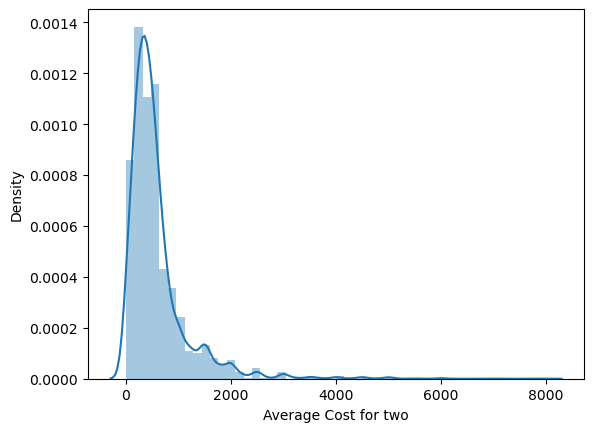

In [353]:
sns.distplot(x['Average Cost for two'])

<Axes: >

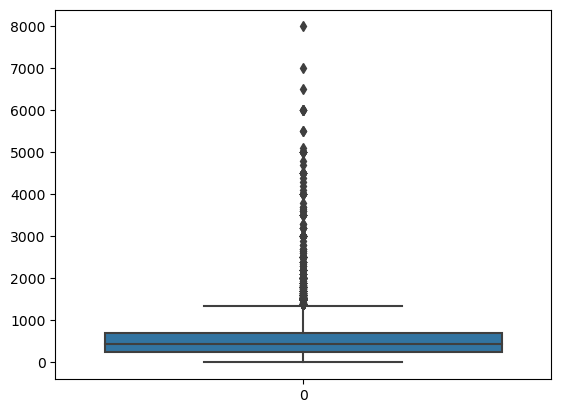

In [354]:
sns.boxplot(x['Average Cost for two'])

In [360]:
pt = PowerTransformer(method='yeo-johnson') 

In [363]:
transformed=pt.fit_transform(data[['Average Cost for two']])
transformed=pd.DataFrame(transformed,columns=['Transformed_rating'])

In [365]:
x['Average Cost for two']=transformed['Transformed_rating']

In [366]:
x.head()

ra1  ra2  ra3  ra4  ra5  ra6  col1  col2  col3  col4  col5  de1  de2   b1  \
0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0  0.0   
1  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0  0.0   
3  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0  1.0   
4  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0  0.0   

    b2   d1   d2  cu1  cu2  cu3   c1   c2   c3   c4   c5   c6  code1  code2  \
0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0    0.0    0.0   
1  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0    0.0   
2  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0    0.0    0.0   
3  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0    0.0   
4  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0    0.0   

   code3  Restaurant ID  City   Address  Locality  Longitude  Latitude  \
0    1.0        6317637     2 -0.343878         1   2.498033 -1.602771   
1    1.0        6304287     2 -0.343878         1   2.497306 -1.603989   
2    1.0        6300002     4 -0.343878         1   2.499617 -1.601115   
3    1.0        6318506     4 -0.343878         3   2.499598 -1.600709   
4    1.0        6314302     4 -0.343878         3   2.499653 -1.600799   

   Average Cost for two  Aggregate rating     Votes  Transformed_outler_no  \
0              1.110770               4.8  1.191885              -0.634799   
1              1.228880               4.5  1.507786              -0.634799   
2              3.136702               4.4  1.116765              -0.634799   
3              1.543040               4.9  1.266889              -0.634799   
4              1.543040               4.8  1.034953              -0.634799   

   Restaurant Name  
0        -0.624754  
1        -0.624754  
2        -0.624754  
3        -0.624754  
4        -0.624754

In [367]:
#let us see the correlation and the covariance
continous_columns

['Restaurant ID',
 'City',
 'Address',
 'Locality',
 'Longitude',
 'Latitude',
 'Average Cost for two',
 'Price range',
 'Aggregate rating',
 'Votes',
 'Transformed_outler_no',
 'Restaurant Name']

In [368]:
continous_columns.remove('Price range')

In [370]:
corr=data[continous_columns].corr()

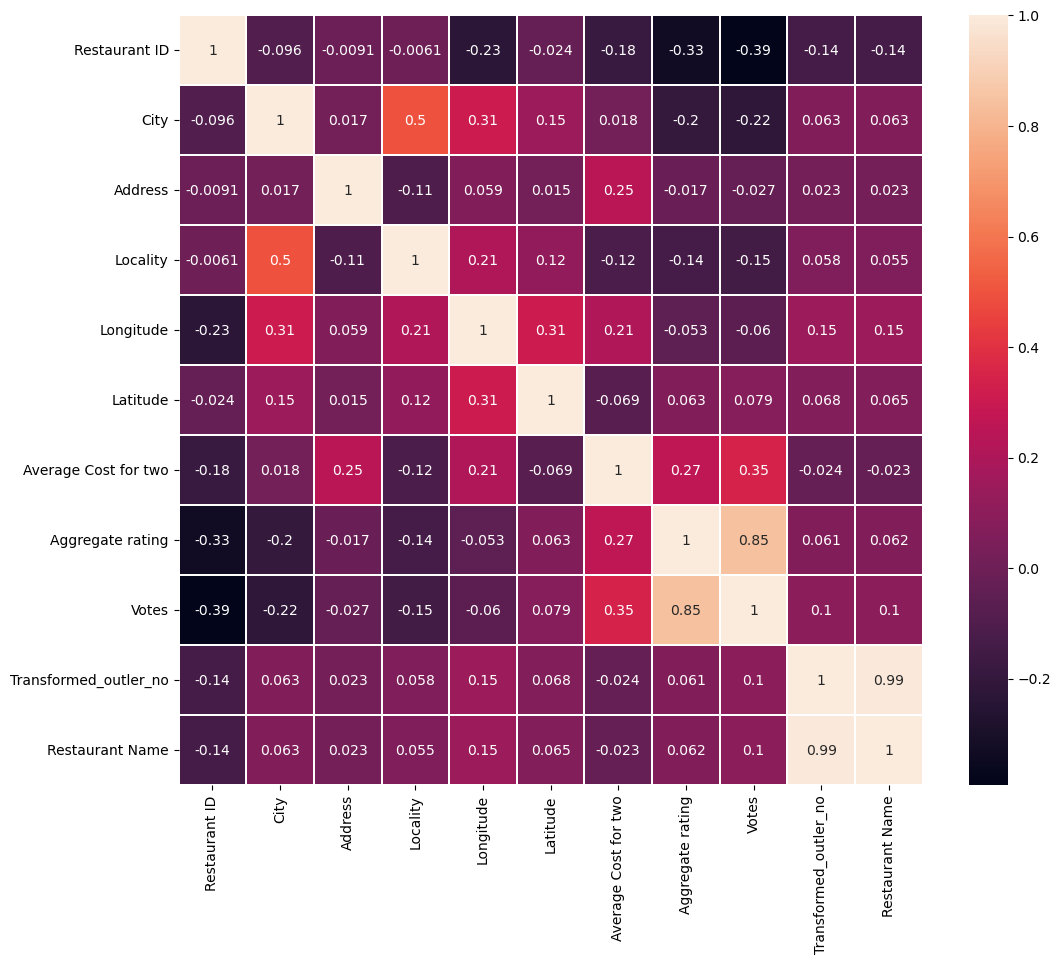

In [371]:
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,linewidths=0.1)
plt.show()

In [373]:
#one correlation can be seen is the transformed outlet no and the restaurant name.
#Let us see the vif score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [374]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [377]:
continous_scaled=scaler.fit_transform(data[continous_columns])
continous_scaled=pd.DataFrame(continous_scaled,columns=continous_columns)
continous_scaled

Restaurant ID      City   Address  Locality  Longitude  Latitude  \
0         -0.307891 -1.437433 -0.346946 -1.346158   2.832662 -1.830443   
1         -0.309400 -1.437433 -0.346946 -1.346158   2.831843 -1.831849   
2         -0.309884 -1.436602 -0.346946 -1.346158   2.834448 -1.828530   
3         -0.307793 -1.436602 -0.346946 -1.275613   2.834426 -1.828061   
4         -0.308268 -1.436602 -0.346946 -1.275613   2.834489 -1.828165   
...             ...       ...       ...       ...        ...       ...   
9377      -0.353311 -1.432445 -0.346946 -1.240340  -1.832694  2.644274   
9378      -0.354100 -1.432445 -0.346946 -1.346158  -1.830333  2.641529   
9379      -0.353302 -1.432445 -0.346946 -1.310886  -1.830579  2.651279   
9380      -0.353268 -1.432445 -0.346946 -1.310886  -1.830528  2.651737   
9381      -0.351992 -1.432445 -0.346946 -1.346158  -1.830898  2.636214   

      Average Cost for two  Aggregate rating     Votes  Transformed_outler_no  \
0                 0.844802          1.424337  1.205833              -0.639646   
1                 1.010658          1.226423  1.521714              -0.639646   
2                 5.654641          1.160452  1.130718              -0.639646   
3                 1.508228          1.490308  1.280833              -0.639646   
4                 1.508228          1.424337  1.048912              -0.639646   
...                    ...               ...       ...                    ...   
9377             -0.846935          0.962538  1.666005              -0.639646   
9378             -0.805471          1.028510  1.802598              -0.639646   
9379             -0.697664          0.698654  1.577816              -0.639646   
9380             -0.780592          0.896567  1.733339              -0.639646   
9381             -0.888399          0.896567  1.521714              -0.639646   

      Restaurant Name  
0           -0.629505  
1           -0.629505  
2           -0.629505  
3           -0.629505  
4           -0.629505  
...               ...  
9377        -0.629505  
9378        -0.629505  
9379        -0.629505  
9380        -0.629505  
9381        -0.629505  

[9382 rows x 11 columns]

In [378]:
for i in range(11):
    print(variance_inflation_factor(continous_scaled,i))
    print(continous_columns[i])
    print('*'*10)

1.3346787507966495
Restaurant ID
**********
1.5149459638108413
City
**********
1.098712636230603
Address
**********
1.394834085079976
Locality
**********
1.4298239968847437
Longitude
**********
1.1913125357503738
Latitude
**********
1.4131349591242222
Average Cost for two
**********
3.526054944107172
Aggregate rating
**********
4.225504385486358
Votes
**********
55.249737953831236
Transformed_outler_no
**********
55.29520375964021
Restaurant Name
**********


In [379]:
#we will make the model as it is if accuracy is not achieved than we will delete the restaurant name

In [380]:
continous_scaled

Restaurant ID      City   Address  Locality  Longitude  Latitude  \
0         -0.307891 -1.437433 -0.346946 -1.346158   2.832662 -1.830443   
1         -0.309400 -1.437433 -0.346946 -1.346158   2.831843 -1.831849   
2         -0.309884 -1.436602 -0.346946 -1.346158   2.834448 -1.828530   
3         -0.307793 -1.436602 -0.346946 -1.275613   2.834426 -1.828061   
4         -0.308268 -1.436602 -0.346946 -1.275613   2.834489 -1.828165   
...             ...       ...       ...       ...        ...       ...   
9377      -0.353311 -1.432445 -0.346946 -1.240340  -1.832694  2.644274   
9378      -0.354100 -1.432445 -0.346946 -1.346158  -1.830333  2.641529   
9379      -0.353302 -1.432445 -0.346946 -1.310886  -1.830579  2.651279   
9380      -0.353268 -1.432445 -0.346946 -1.310886  -1.830528  2.651737   
9381      -0.351992 -1.432445 -0.346946 -1.346158  -1.830898  2.636214   

      Average Cost for two  Aggregate rating     Votes  Transformed_outler_no  \
0                 0.844802          1.424337  1.205833              -0.639646   
1                 1.010658          1.226423  1.521714              -0.639646   
2                 5.654641          1.160452  1.130718              -0.639646   
3                 1.508228          1.490308  1.280833              -0.639646   
4                 1.508228          1.424337  1.048912              -0.639646   
...                    ...               ...       ...                    ...   
9377             -0.846935          0.962538  1.666005              -0.639646   
9378             -0.805471          1.028510  1.802598              -0.639646   
9379             -0.697664          0.698654  1.577816              -0.639646   
9380             -0.780592          0.896567  1.733339              -0.639646   
9381             -0.888399          0.896567  1.521714              -0.639646   

      Restaurant Name  
0           -0.629505  
1           -0.629505  
2           -0.629505  
3           -0.629505  
4           -0.629505  
...               ...  
9377        -0.629505  
9378        -0.629505  
9379        -0.629505  
9380        -0.629505  
9381        -0.629505  

[9382 rows x 11 columns]

In [383]:
x=x.drop(columns=continous_columns)

In [385]:
x=pd.concat([x,continous_scaled],axis=1)
x

ra1  ra2  ra3  ra4  ra5  ra6  col1  col2  col3  col4  col5  de1  de2  \
0     0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0   
1     0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   
3     0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0   
4     0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0   
...   ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ...  ...  ...   
9377  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   
9378  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   
9379  0.0  0.0  1.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   1.0  1.0  0.0   
9380  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   
9381  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   

       b1   b2   d1   d2  cu1  cu2  cu3   c1   c2   c3   c4   c5   c6  code1  \
0     0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0    0.0   
1     0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0   
2     0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0    0.0   
3     1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0   
4     0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...   
9377  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0   
9378  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0    0.0   
9379  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0   
9380  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0   
9381  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0   

      code2  code3  Restaurant ID      City   Address  Locality  Longitude  \
0       0.0    1.0      -0.307891 -1.437433 -0.346946 -1.346158   2.832662   
1       0.0    1.0      -0.309400 -1.437433 -0.346946 -1.346158   2.831843   
2       0.0    1.0      -0.309884 -1.436602 -0.346946 -1.346158   2.834448   
3       0.0    1.0      -0.307793 -1.436602 -0.346946 -1.275613   2.834426   
4       0.0    1.0      -0.308268 -1.436602 -0.346946 -1.275613   2.834489   
...     ...    ...            ...       ...       ...       ...        ...   
9377    0.0    1.0      -0.353311 -1.432445 -0.346946 -1.240340  -1.832694   
9378    0.0    1.0      -0.354100 -1.432445 -0.346946 -1.346158  -1.830333   
9379    0.0    1.0      -0.353302 -1.432445 -0.346946 -1.310886  -1.830579   
9380    0.0    1.0      -0.353268 -1.432445 -0.346946 -1.310886  -1.830528   
9381    0.0    1.0      -0.351992 -1.432445 -0.346946 -1.346158  -1.830898   

      Latitude  Average Cost for two  Aggregate rating     Votes  \
0    -1.830443              0.844802          1.424337  1.205833   
1    -1.831849              1.010658          1.226423  1.521714   
2    -1.828530              5.654641          1.160452  1.130718   
3    -1.828061              1.508228          1.490308  1.280833   
4    -1.828165              1.508228          1.424337  1.048912   
...        ...                   ...               ...       ...   
9377  2.644274             -0.846935          0.962538  1.666005   
9378  2.641529             -0.805471          1.028510  1.802598   
9379  2.651279             -0.697664          0.698654  1.577816   
9380  2.651737             -0.780592          0.896567  1.733339   
9381  2.636214             -0.888399          0.896567  1.521714   

      Transformed_outler_no  Restaurant Name  
0                 -0.639646        -0.629505  
1                 -0.639646        -0.629505  
2                 -0.639646        -0.629505  
3                 -0.639646        -0.629505  
4                 -0.639646        -0.629505  
...                     ...              ...  
9377              -0.6396

Added the continous scaled columns to the feature columns. Now let us proceeed further.

In [386]:
x

ra1  ra2  ra3  ra4  ra5  ra6  col1  col2  col3  col4  col5  de1  de2  \
0     0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0   
1     0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   
3     0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0   
4     0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0   
...   ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ...  ...  ...   
9377  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   
9378  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   
9379  0.0  0.0  1.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   1.0  1.0  0.0   
9380  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   
9381  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   

       b1   b2   d1   d2  cu1  cu2  cu3   c1   c2   c3   c4   c5   c6  code1  \
0     0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0    0.0   
1     0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0   
2     0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0    0.0   
3     1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0   
4     0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...   
9377  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0   
9378  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0    0.0   
9379  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0   
9380  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0   
9381  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0   

      code2  code3  Restaurant ID      City   Address  Locality  Longitude  \
0       0.0    1.0      -0.307891 -1.437433 -0.346946 -1.346158   2.832662   
1       0.0    1.0      -0.309400 -1.437433 -0.346946 -1.346158   2.831843   
2       0.0    1.0      -0.309884 -1.436602 -0.346946 -1.346158   2.834448   
3       0.0    1.0      -0.307793 -1.436602 -0.346946 -1.275613   2.834426   
4       0.0    1.0      -0.308268 -1.436602 -0.346946 -1.275613   2.834489   
...     ...    ...            ...       ...       ...       ...        ...   
9377    0.0    1.0      -0.353311 -1.432445 -0.346946 -1.240340  -1.832694   
9378    0.0    1.0      -0.354100 -1.432445 -0.346946 -1.346158  -1.830333   
9379    0.0    1.0      -0.353302 -1.432445 -0.346946 -1.310886  -1.830579   
9380    0.0    1.0      -0.353268 -1.432445 -0.346946 -1.310886  -1.830528   
9381    0.0    1.0      -0.351992 -1.432445 -0.346946 -1.346158  -1.830898   

      Latitude  Average Cost for two  Aggregate rating     Votes  \
0    -1.830443              0.844802          1.424337  1.205833   
1    -1.831849              1.010658          1.226423  1.521714   
2    -1.828530              5.654641          1.160452  1.130718   
3    -1.828061              1.508228          1.490308  1.280833   
4    -1.828165              1.508228          1.424337  1.048912   
...        ...                   ...               ...       ...   
9377  2.644274             -0.846935          0.962538  1.666005   
9378  2.641529             -0.805471          1.028510  1.802598   
9379  2.651279             -0.697664          0.698654  1.577816   
9380  2.651737             -0.780592          0.896567  1.733339   
9381  2.636214             -0.888399          0.896567  1.521714   

      Transformed_outler_no  Restaurant Name  
0                 -0.639646        -0.629505  
1                 -0.639646        -0.629505  
2                 -0.639646        -0.629505  
3                 -0.639646        -0.629505  
4                 -0.639646        -0.629505  
...                     ...              ...  
9377              -0.6396

In [388]:
y.value_counts()

Price range
1    4430
2    3064
3    1335
4     553
Name: count, dtype: int64

In [390]:
#Now all the preprocessing has been now let us make the model
#now let us import the libraries to make our model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

In [391]:
# we will use the linearregression to check the best random state
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LogisticRegression()
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.9364876385336743 92


In [392]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=maxrs)

In [393]:
rfc=RandomForestClassifier()
et=ExtraTreesClassifier()
lg=LogisticRegression()
sv=SVC()
dc=DecisionTreeClassifier()
gbdt=GradientBoostingClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()
knn=KNeighborsClassifier()
#Great the logistic regression which does not gives good accuracy for the classification tasks is giving a great accuracy
#Let us do it for the other models also.

In [394]:
models=[rfc,et,lg,sv,dc,gbdt,abc,bc]

In [395]:
for i in models:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i,'  ', accuracy_score(y_test,pred))

RandomForestClassifier()    0.9646206308610401
ExtraTreesClassifier()    0.8716965046888321
LogisticRegression()    0.9364876385336743
SVC()    0.90153452685422
DecisionTreeClassifier()    0.9859335038363172
GradientBoostingClassifier()    0.9842284739982949
AdaBoostClassifier()    0.9254049445865302
BaggingClassifier()    0.9855072463768116


#Great the gradientboost and the decesion tree is having a great accuracy let us make the model by deleting the`rest name

In [399]:
x=x.drop(columns='Restaurant Name')

In [400]:
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LogisticRegression()
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.9364876385336743 92


In [401]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=maxrs)

In [402]:
for i in models:
    i.fit(X_train,Y_train)
    pred=i.predict(X_test)
    print(i,'  ', accuracy_score(Y_test,pred))

RandomForestClassifier()    0.9688832054560955
ExtraTreesClassifier()    0.8712702472293266
LogisticRegression()    0.9364876385336743
SVC()    0.9045183290707587
DecisionTreeClassifier()    0.985080988917306
GradientBoostingClassifier()    0.9825234441602728
AdaBoostClassifier()    0.9254049445865302
BaggingClassifier()    0.9872122762148338


In [406]:
#Great it inceased the accuracy by 0.25%
#Let us do the cross validation
from sklearn.model_selection import cross_val_score
for i in models:
    print(i, '  ',cross_val_score(i,x,y,cv=5).mean())

RandomForestClassifier()    0.9236985594896361
ExtraTreesClassifier()    0.8144554834473648
LogisticRegression()    0.9044046265362432
SVC()    0.8805284029657633
DecisionTreeClassifier()    0.9275369101671792
GradientBoostingClassifier()    0.951084671020421
AdaBoostClassifier()    0.7321483381479087
BaggingClassifier()    0.9251933687222612


#I am not done yet for the last time i will make the model deleting the rest id and will see if there is any betterment or not.

In [409]:
x1=x.drop(columns='Restaurant ID')

In [410]:
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LogisticRegression()
    x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.9386189258312021 92


In [412]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.25,random_state=maxrs)

In [413]:
for i in models:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i,'  ', accuracy_score(y_test,pred))

RandomForestClassifier()    0.9667519181585678
ExtraTreesClassifier()    0.8878942881500427
LogisticRegression()    0.9386189258312021
SVC()    0.907928388746803
DecisionTreeClassifier()    0.9808184143222506
GradientBoostingClassifier()    0.9838022165387894
AdaBoostClassifier()    0.9254049445865302
BaggingClassifier()    0.985080988917306


In [414]:
from sklearn.model_selection import cross_val_score
for i in models:
    print(i, '  ',cross_val_score(i,x1,y,cv=5).mean())

RandomForestClassifier()    0.9239122334896793
ExtraTreesClassifier()    0.8063555235467386
LogisticRegression()    0.905683205859734
SVC()    0.8862851054113708
DecisionTreeClassifier()    0.9241273842371974
GradientBoostingClassifier()    0.9487402776058061
AdaBoostClassifier()    0.7263944756012919
BaggingClassifier()    0.9217822524488449


In [416]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier


param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4,],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

grid_search_gb = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit to the training data
grid_search_gb.fit(X_train,Y_train)


print(grid_search_gb.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
{'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [433]:
model_classi=GradientBoostingClassifier(learning_rate=0.1,max_depth=4,max_features='sqrt',
                                       min_samples_leaf=2,min_samples_split=5,
                                       n_estimators=200)

In [418]:
model_classi.fit(X_train,Y_train)

GradientBoostingClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=2,
                           min_samples_split=5, n_estimators=200)

In [419]:
pred=model_classi.predict(X_test)

In [420]:
accuracy_score(Y_test,pred)

0.979539641943734

In [421]:
y.value_counts()

Price range
1    4430
2    3064
3    1335
4     553
Name: count, dtype: int64

In [423]:
#Let us reshample the label and see if there is any improvement or not
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X1_train,Y1_train=sm.fit_resample(X_train,Y_train)

In [424]:
X1_test,y1_test=sm.fit_resample(X_test,Y_test)

In [430]:
model_classi.fit(X1_train,Y1_train)

GradientBoostingClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=2,
                           min_samples_split=5, n_estimators=200)

In [431]:
pred=model_classi.predict(X1_test)

In [432]:
accuracy_score(y1_test,pred)

0.964447463768116

In [434]:
model_classi.fit(X_train,Y_train)
pred=model_classi.predict(X_test)
accuracy_score(Y_test,pred)

0.979539641943734

#So by far this has been out best model

In [ ]:
#For the last time let us fine the best random state for this

In [435]:
maxACC=0
maxrs=0
for i in range(1,200):
    model_classi=GradientBoostingClassifier(learning_rate=0.1,max_depth=4,max_features='sqrt',
                                       min_samples_leaf=2,min_samples_split=5,
                                       n_estimators=200)
    model_classi.fit(X_train,Y_train)
    pred=model_classi.predict(X_test)
    acc=accuracy_score(Y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)


KeyboardInterrupt



In [439]:
maxACC

0.9829497016197783

In [443]:
model_classi=GradientBoostingClassifier(learning_rate=0.1,max_depth=4,max_features='sqrt',
                                       min_samples_leaf=2,min_samples_split=5,
                                       n_estimators=200,random_state=maxrs)
model_classi.fit(X_train,Y_train)
pred=model_classi.predict(X_test)
accuracy_score(Y_test,pred)

0.9803921568627451

In [444]:
#SO by far this has been the best model

In [450]:
#SO let us save this model and proceed for the regression task
import joblib
joblib.dump(model_classi,'CLasification')

['CLasification']

So the classification taks gave us a excellent accuracy of 98.1% which is great
Let us see for the regression task.

In [451]:
data

ra1  ra2  ra3  ra4  ra5  ra6  col1  col2  col3  col4  col5  de1  de2  \
0     0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0   
1     0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   
3     0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0   
4     0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0   
...   ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ...  ...  ...   
9377  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   
9378  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   
9379  0.0  0.0  1.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   1.0  1.0  0.0   
9380  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   
9381  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   

       b1   b2   d1   d2  cu1  cu2  cu3   c1   c2   c3   c4   c5   c6  code1  \
0     0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0    0.0   
1     0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0   
2     0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0    0.0   
3     1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0   
4     0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...   
9377  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0   
9378  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0    0.0   
9379  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0   
9380  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0   
9381  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0   

      code2  code3  Restaurant ID  City   Address  Locality  Longitude  \
0       0.0    1.0        6317637     2 -0.343878         1   2.498033   
1       0.0    1.0        6304287     2 -0.343878         1   2.497306   
2       0.0    1.0        6300002     4 -0.343878         1   2.499617   
3       0.0    1.0        6318506     4 -0.343878         3   2.499598   
4       0.0    1.0        6314302     4 -0.343878         3   2.499653   
...     ...    ...            ...   ...       ...       ...        ...   
9377    0.0    1.0        5915730    14 -0.343878         4  -1.640540   
9378    0.0    1.0        5908749    14 -0.343878         1  -1.638445   
9379    0.0    1.0        5915807    14 -0.343878         2  -1.638664   
9380    0.0    1.0        5916112    14 -0.343878         2  -1.638619   
9381    0.0    1.0        5927402    14 -0.343878         1  -1.638946   

      Latitude  Average Cost for two  Price range  Aggregate rating     Votes  \
0    -1.602771                  1100            3               4.8  1.191885   
1    -1.603989                  1200            3               4.5  1.507786   
2    -1.601115                  4000            4               4.4  1.116765   
3    -1.600709                  1500            4               4.9  1.266889   
4    -1.600799                  1500            4               4.8  1.034953   
...        ...                   ...          ...               ...       ...   
9377  2.270905                    80            3               4.1  1.652086   
9378  2.268528                   105            3               4.2  1.788687   
9379  2.276969                   170            4               3.7  1.563891   
9380  2.277366                   120            4               4.0  1.719424   
9381  2.263927                    55            2               4.0  1.507786   

      Transformed_outler_no  Restaurant Name  
0                 -0.634799        -0.624754  
1                 -0.634799        -0.624754  
2                 -0.634799        -0.624754  
3                 -0.634799        -0.624754  
4          

In [456]:
x=data.drop(columns='Average Cost for two')
y=data['Average Cost for two']

In [457]:
x

ra1  ra2  ra3  ra4  ra5  ra6  col1  col2  col3  col4  col5  de1  de2  \
0     0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0   
1     0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   
3     0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0   
4     0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0   
...   ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ...  ...  ...   
9377  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   
9378  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   
9379  0.0  0.0  1.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   1.0  1.0  0.0   
9380  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   
9381  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   

       b1   b2   d1   d2  cu1  cu2  cu3   c1   c2   c3   c4   c5   c6  code1  \
0     0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0    0.0   
1     0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0   
2     0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0    0.0   
3     1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0   
4     0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...   
9377  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0   
9378  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0    0.0   
9379  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0   
9380  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0   
9381  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0   

      code2  code3  Restaurant ID  City   Address  Locality  Longitude  \
0       0.0    1.0        6317637     2 -0.343878         1   2.498033   
1       0.0    1.0        6304287     2 -0.343878         1   2.497306   
2       0.0    1.0        6300002     4 -0.343878         1   2.499617   
3       0.0    1.0        6318506     4 -0.343878         3   2.499598   
4       0.0    1.0        6314302     4 -0.343878         3   2.499653   
...     ...    ...            ...   ...       ...       ...        ...   
9377    0.0    1.0        5915730    14 -0.343878         4  -1.640540   
9378    0.0    1.0        5908749    14 -0.343878         1  -1.638445   
9379    0.0    1.0        5915807    14 -0.343878         2  -1.638664   
9380    0.0    1.0        5916112    14 -0.343878         2  -1.638619   
9381    0.0    1.0        5927402    14 -0.343878         1  -1.638946   

      Latitude  Price range  Aggregate rating     Votes  \
0    -1.602771            3               4.8  1.191885   
1    -1.603989            3               4.5  1.507786   
2    -1.601115            4               4.4  1.116765   
3    -1.600709            4               4.9  1.266889   
4    -1.600799            4               4.8  1.034953   
...        ...          ...               ...       ...   
9377  2.270905            3               4.1  1.652086   
9378  2.268528            3               4.2  1.788687   
9379  2.276969            4               3.7  1.563891   
9380  2.277366            4               4.0  1.719424   
9381  2.263927            2               4.0  1.507786   

      Transformed_outler_no  Restaurant Name  
0                 -0.634799        -0.624754  
1                 -0.634799        -0.624754  
2                 -0.634799        -0.624754  
3                 -0.634799        -0.624754  
4                 -0.634799        -0.624754  
...                     ...              ...  
9377              -0.634799        -0.624754  
9378              -0.634799        -0.624754  
9379              -0.634799        -0.624754  
9380              -0.634799        -0.62

In [463]:
#Here firs we need to encode the price range because this time it is not a feature but a label
a=one_hot.fit_transform(x[['Price range']])
a=pd.DataFrame(a,columns=['p1','p2','p3','p4'])
x=pd.concat([a,x],axis=1)
x=x.drop(columns='Price range')

ra1  ra2  ra3  ra4  ra5  ra6  col1  col2  col3  col4  col5  de1  de2   b1  \
0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0  0.0   
1  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0  0.0   
3  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0  1.0   
4  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0  0.0   

    b2   d1   d2  cu1  cu2  cu3   c1   c2   c3   c4   c5   c6  code1  code2  \
0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0    0.0    0.0   
1  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0    0.0   
2  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0    0.0    0.0   
3  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0    0.0   
4  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0    0.0   

   code3  Restaurant ID  City   Address  Locality  Longitude  Latitude  \
0    1.0        6317637     2 -0.343878         1   2.498033 -1.602771   
1    1.0        6304287     2 -0.343878         1   2.497306 -1.603989   
2    1.0        6300002     4 -0.343878         1   2.499617 -1.601115   
3    1.0        6318506     4 -0.343878         3   2.499598 -1.600709   
4    1.0        6314302     4 -0.343878         3   2.499653 -1.600799   

   Average Cost for two  Price range  Aggregate rating     Votes  \
0                  1100            3               4.8  1.191885   
1                  1200            3               4.5  1.507786   
2                  4000            4               4.4  1.116765   
3                  1500            4               4.9  1.266889   
4                  1500            4               4.8  1.034953   

   Transformed_outler_no  Restaurant Name  
0              -0.634799        -0.624754  
1              -0.634799        -0.624754  
2              -0.634799        -0.624754  
3              -0.634799        -0.624754  
4              -0.634799        -0.624754

In [464]:
x.head()

p1   p2   p3   p4  ra1  ra2  ra3  ra4  ra5  ra6  col1  col2  col3  col4  \
0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   
1  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   
2  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   
3  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   
4  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   

   col5  de1  de2   b1   b2   d1   d2  cu1  cu2  cu3   c1   c2   c3   c4   c5  \
0   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0   
1   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0   
2   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0   
3   0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
4   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   

    c6  code1  code2  code3  Restaurant ID  City   Address  Locality  \
0  0.0    0.0    0.0    1.0        6317637     2 -0.343878         1   
1  0.0    0.0    0.0    1.0        6304287     2 -0.343878         1   
2  0.0    0.0    0.0    1.0        6300002     4 -0.343878         1   
3  0.0    0.0    0.0    1.0        6318506     4 -0.343878         3   
4  0.0    0.0    0.0    1.0        6314302     4 -0.343878         3   

   Longitude  Latitude  Aggregate rating     Votes  Transformed_outler_no  \
0   2.498033 -1.602771               4.8  1.191885              -0.634799   
1   2.497306 -1.603989               4.5  1.507786              -0.634799   
2   2.499617 -1.601115               4.4  1.116765              -0.634799   
3   2.499598 -1.600709               4.9  1.266889              -0.634799   
4   2.499653 -1.600799               4.8  1.034953              -0.634799   

   Restaurant Name  
0        -0.624754  
1        -0.624754  
2        -0.624754  
3        -0.624754  
4        -0.624754

In [465]:
x

p1   p2   p3   p4  ra1  ra2  ra3  ra4  ra5  ra6  col1  col2  col3  \
0     0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   
1     0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   
2     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   
3     0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   
4     0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
9377  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   
9378  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   
9379  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0   0.0   0.0   
9380  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   
9381  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   

      col4  col5  de1  de2   b1   b2   d1   d2  cu1  cu2  cu3   c1   c2   c3  \
0      0.0   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
1      0.0   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0   
2      0.0   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
3      0.0   0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
4      0.0   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
...    ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
9377   0.0   0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0   
9378   0.0   0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
9379   0.0   1.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
9380   0.0   0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0   
9381   0.0   0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0   

       c4   c5   c6  code1  code2  code3  Restaurant ID  City   Address  \
0     0.0  0.0  0.0    0.0    0.0    1.0        6317637     2 -0.343878   
1     0.0  0.0  0.0    0.0    0.0    1.0        6304287     2 -0.343878   
2     1.0  0.0  0.0    0.0    0.0    1.0        6300002     4 -0.343878   
3     0.0  0.0  0.0    0.0    0.0    1.0        6318506     4 -0.343878   
4     0.0  0.0  0.0    0.0    0.0    1.0        6314302     4 -0.343878   
...   ...  ...  ...    ...    ...    ...            ...   ...       ...   
9377  0.0  0.0  0.0    0.0    0.0    1.0        5915730    14 -0.343878   
9378  0.0  0.0  0.0    0.0    0.0    1.0        5908749    14 -0.343878   
9379  0.0  0.0  0.0    0.0    0.0    1.0        5915807    14 -0.343878   
9380  0.0  0.0  0.0    0.0    0.0    1.0        5916112    14 -0.343878   
9381  0.0  0.0  0.0    0.0    0.0    1.0        5927402    14 -0.343878   

      Locality  Longitude  Latitude  Aggregate rating     Votes  \
0            1   2.498033 -1.602771               4.8  1.191885   
1            1   2.497306 -1.603989               4.5  1.507786   
2            1   2.499617 -1.601115               4.4  1.116765   
3            3   2.499598 -1.600709               4.9  1.266889   
4            3   2.499653 -1.600799               4.8  1.034953   
...        ...        ...       ...               ...       ...   
9377         4  -1.640540  2.270905               4.1  1.652086   
9378         1  -1.638445  2.268528               4.2  1.788687   
9379         2  -1.638664  2.276969               3.7  1.563891   
9380         2  -1.638619  2.277366               4.0  1.719424   
9381         1  -1.638946  2.263927               4.0  1.507786   

      Transformed_outler_no  Restaurant Name  
0                 -0.634799        -0.624754  
1                 -0.634799        -0.624754  
2                 -0.634799        -0.624754  
3                 -0.634799        -0.624754  
4                 -0.634799        -0.624754  
...                     ...              ...  
9377              -0.634799        -0.624754  
9378              -0.634799        -0.624754  
9379

In [466]:
x.columns

Index(['p1', 'p2', 'p3', 'p4', 'ra1', 'ra2', 'ra3', 'ra4', 'ra5', 'ra6',
       'col1', 'col2', 'col3', 'col4', 'col5', 'de1', 'de2', 'b1', 'b2', 'd1',
       'd2', 'cu1', 'cu2', 'cu3', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'code1',
       'code2', 'code3', 'Restaurant ID', 'City', 'Address', 'Locality',
       'Longitude', 'Latitude', 'Aggregate rating', 'Votes',
       'Transformed_outler_no', 'Restaurant Name'],
      dtype='object')

In [468]:
continous_columns=['Restaurant ID', 'City', 'Address', 'Locality',
       'Longitude', 'Latitude', 'Aggregate rating', 'Votes',
       'Transformed_outler_no', 'Restaurant Name']

In [469]:
x[continous_columns]

Restaurant ID  City   Address  Locality  Longitude  Latitude  \
0           6317637     2 -0.343878         1   2.498033 -1.602771   
1           6304287     2 -0.343878         1   2.497306 -1.603989   
2           6300002     4 -0.343878         1   2.499617 -1.601115   
3           6318506     4 -0.343878         3   2.499598 -1.600709   
4           6314302     4 -0.343878         3   2.499653 -1.600799   
...             ...   ...       ...       ...        ...       ...   
9377        5915730    14 -0.343878         4  -1.640540  2.270905   
9378        5908749    14 -0.343878         1  -1.638445  2.268528   
9379        5915807    14 -0.343878         2  -1.638664  2.276969   
9380        5916112    14 -0.343878         2  -1.638619  2.277366   
9381        5927402    14 -0.343878         1  -1.638946  2.263927   

      Aggregate rating     Votes  Transformed_outler_no  Restaurant Name  
0                  4.8  1.191885              -0.634799        -0.624754  
1                  4.5  1.507786              -0.634799        -0.624754  
2                  4.4  1.116765              -0.634799        -0.624754  
3                  4.9  1.266889              -0.634799        -0.624754  
4                  4.8  1.034953              -0.634799        -0.624754  
...                ...       ...                    ...              ...  
9377               4.1  1.652086              -0.634799        -0.624754  
9378               4.2  1.788687              -0.634799        -0.624754  
9379               3.7  1.563891              -0.634799        -0.624754  
9380               4.0  1.719424              -0.634799        -0.624754  
9381               4.0  1.507786              -0.634799        -0.624754  

[9382 rows x 10 columns]

In [471]:
corr=x[continous_columns].corr()

<Axes: >

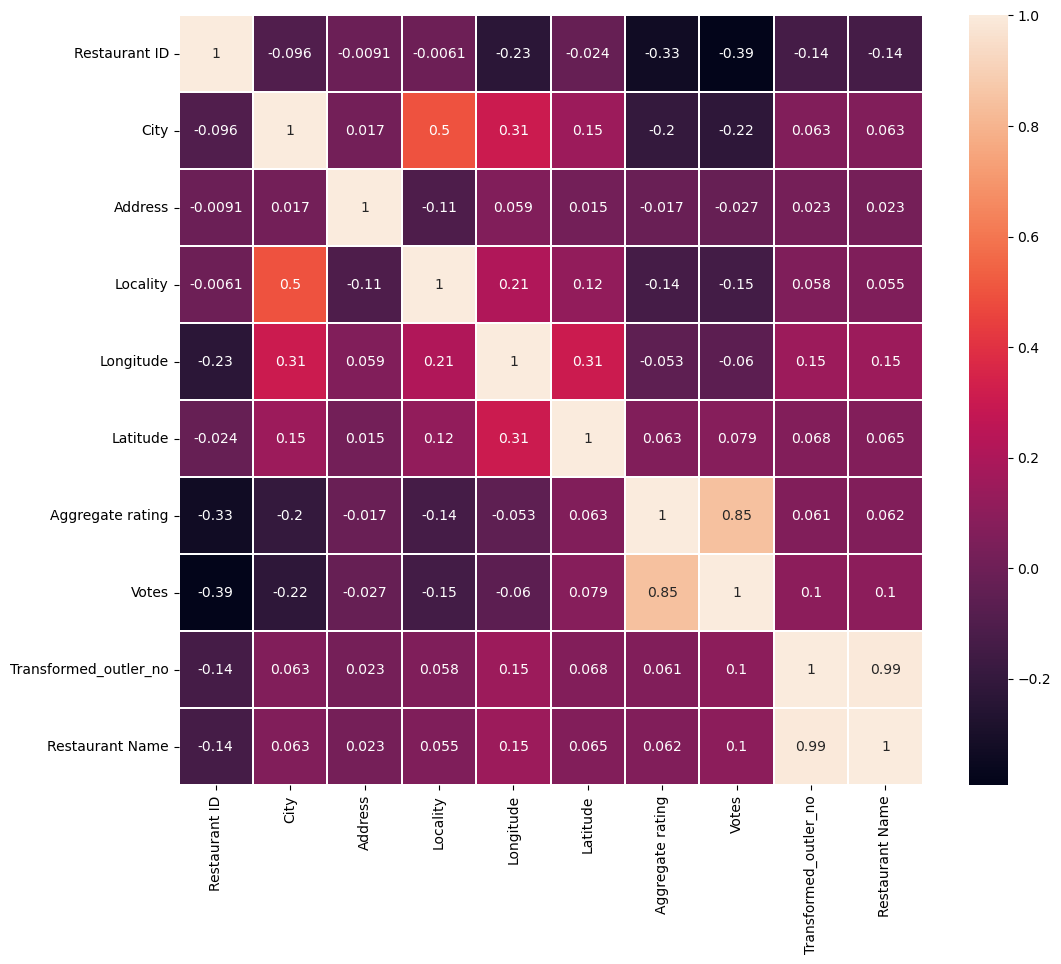

In [472]:
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,linewidths=0.1)

In [ ]:
#Again the same correlation but we will make the model using all

In [473]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV #ridge and the lassocv also act as a feature selector
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score    

In [474]:
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.77880900547973 133


In [475]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=maxrs)

In [476]:
rr=RandomForestRegressor()
er=ExtraTreesRegressor()
lr=LinearRegression()
gb=GradientBoostingRegressor()
ad=AdaBoostRegressor()
bg=BaggingRegressor()
ri=Ridge()
ls=LassoCV()
ds=DecisionTreeRegressor()

In [477]:
models=[rr,er,lr,gb,ad,bg,ri,ls,ds] #These are the different models which will be tested and the best one will be kept

In [478]:
accuracy={}
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy[model]=r2_score(y_test,pred)
accuracy

{RandomForestRegressor(): 0.8787841502832373,
 ExtraTreesRegressor(): 0.8317375629169776,
 LinearRegression(): 0.77880900547973,
 GradientBoostingRegressor(): 0.8678933274762486,
 AdaBoostRegressor(): 0.6472839911457436,
 BaggingRegressor(): 0.8796768672521822,
 Ridge(): 0.7790544601291178,
 LassoCV(): 0.029069526531188106,
 DecisionTreeRegressor(): 0.729129222397382}

In [ ]:
#The models are giving good accuracy but still there is a chance of improvement
#Let us drop the rest id and se

In [480]:
x=x.drop(columns='Restaurant Name')
x

p1   p2   p3   p4  ra1  ra2  ra3  ra4  ra5  ra6  col1  col2  col3  \
0     0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   
1     0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   
2     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   
3     0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   
4     0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
9377  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   
9378  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   
9379  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0   0.0   0.0   
9380  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   
9381  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   

      col4  col5  de1  de2   b1   b2   d1   d2  cu1  cu2  cu3   c1   c2   c3  \
0      0.0   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
1      0.0   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0   
2      0.0   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
3      0.0   0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
4      0.0   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
...    ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
9377   0.0   0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0   
9378   0.0   0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
9379   0.0   1.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
9380   0.0   0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0   
9381   0.0   0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0   

       c4   c5   c6  code1  code2  code3  Restaurant ID  City   Address  \
0     0.0  0.0  0.0    0.0    0.0    1.0        6317637     2 -0.343878   
1     0.0  0.0  0.0    0.0    0.0    1.0        6304287     2 -0.343878   
2     1.0  0.0  0.0    0.0    0.0    1.0        6300002     4 -0.343878   
3     0.0  0.0  0.0    0.0    0.0    1.0        6318506     4 -0.343878   
4     0.0  0.0  0.0    0.0    0.0    1.0        6314302     4 -0.343878   
...   ...  ...  ...    ...    ...    ...            ...   ...       ...   
9377  0.0  0.0  0.0    0.0    0.0    1.0        5915730    14 -0.343878   
9378  0.0  0.0  0.0    0.0    0.0    1.0        5908749    14 -0.343878   
9379  0.0  0.0  0.0    0.0    0.0    1.0        5915807    14 -0.343878   
9380  0.0  0.0  0.0    0.0    0.0    1.0        5916112    14 -0.343878   
9381  0.0  0.0  0.0    0.0    0.0    1.0        5927402    14 -0.343878   

      Locality  Longitude  Latitude  Aggregate rating     Votes  \
0            1   2.498033 -1.602771               4.8  1.191885   
1            1   2.497306 -1.603989               4.5  1.507786   
2            1   2.499617 -1.601115               4.4  1.116765   
3            3   2.499598 -1.600709               4.9  1.266889   
4            3   2.499653 -1.600799               4.8  1.034953   
...        ...        ...       ...               ...       ...   
9377         4  -1.640540  2.270905               4.1  1.652086   
9378         1  -1.638445  2.268528               4.2  1.788687   
9379         2  -1.638664  2.276969               3.7  1.563891   
9380         2  -1.638619  2.277366               4.0  1.719424   
9381         1  -1.638946  2.263927               4.0  1.507786   

      Transformed_outler_no  
0                 -0.634799  
1                 -0.634799  
2                 -0.634799  
3                 -0.634799  
4                 -0.634799  
...                     ...  
9377              -0.634799  
9378              -0.634799  
9379              -0.634799  
9380              -0.634799  
9381              -0.634799  

[9382 rows x 42 columns]

In [481]:
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.7788125168932847 133


In [482]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=maxrs)

In [483]:
accuracy={}
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy[model]=r2_score(y_test,pred)
accuracy

{RandomForestRegressor(): 0.8733914380838843,
 ExtraTreesRegressor(): 0.8363888108792918,
 LinearRegression(): 0.7788125168932847,
 GradientBoostingRegressor(): 0.8690559294598025,
 AdaBoostRegressor(): 0.6383926158659323,
 BaggingRegressor(): 0.8580311018757869,
 Ridge(): 0.7790563750217875,
 LassoCV(): 0.029069526531188106,
 DecisionTreeRegressor(): 0.7303465210317865}

In [ ]:
#The scaling the columns are not done let us do and than check. It was a very big blunder from me. 

In [484]:
x['Restaurant Name']=data['Restaurant Name']

In [487]:
x[continous_columns]

Restaurant ID  City   Address  Locality  Longitude  Latitude  \
0           6317637     2 -0.343878         1   2.498033 -1.602771   
1           6304287     2 -0.343878         1   2.497306 -1.603989   
2           6300002     4 -0.343878         1   2.499617 -1.601115   
3           6318506     4 -0.343878         3   2.499598 -1.600709   
4           6314302     4 -0.343878         3   2.499653 -1.600799   
...             ...   ...       ...       ...        ...       ...   
9377        5915730    14 -0.343878         4  -1.640540  2.270905   
9378        5908749    14 -0.343878         1  -1.638445  2.268528   
9379        5915807    14 -0.343878         2  -1.638664  2.276969   
9380        5916112    14 -0.343878         2  -1.638619  2.277366   
9381        5927402    14 -0.343878         1  -1.638946  2.263927   

      Aggregate rating     Votes  Transformed_outler_no  Restaurant Name  
0                  4.8  1.191885              -0.634799        -0.624754  
1                  4.5  1.507786              -0.634799        -0.624754  
2                  4.4  1.116765              -0.634799        -0.624754  
3                  4.9  1.266889              -0.634799        -0.624754  
4                  4.8  1.034953              -0.634799        -0.624754  
...                ...       ...                    ...              ...  
9377               4.1  1.652086              -0.634799        -0.624754  
9378               4.2  1.788687              -0.634799        -0.624754  
9379               3.7  1.563891              -0.634799        -0.624754  
9380               4.0  1.719424              -0.634799        -0.624754  
9381               4.0  1.507786              -0.634799        -0.624754  

[9382 rows x 10 columns]

In [488]:
x

p1   p2   p3   p4  ra1  ra2  ra3  ra4  ra5  ra6  col1  col2  col3  \
0     0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   
1     0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   
2     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   
3     0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   
4     0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
9377  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   
9378  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   
9379  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0   0.0   0.0   
9380  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   
9381  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   

      col4  col5  de1  de2   b1   b2   d1   d2  cu1  cu2  cu3   c1   c2   c3  \
0      0.0   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
1      0.0   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0   
2      0.0   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
3      0.0   0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
4      0.0   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
...    ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
9377   0.0   0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0   
9378   0.0   0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
9379   0.0   1.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
9380   0.0   0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0   
9381   0.0   0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0   

       c4   c5   c6  code1  code2  code3  Restaurant ID  City   Address  \
0     0.0  0.0  0.0    0.0    0.0    1.0        6317637     2 -0.343878   
1     0.0  0.0  0.0    0.0    0.0    1.0        6304287     2 -0.343878   
2     1.0  0.0  0.0    0.0    0.0    1.0        6300002     4 -0.343878   
3     0.0  0.0  0.0    0.0    0.0    1.0        6318506     4 -0.343878   
4     0.0  0.0  0.0    0.0    0.0    1.0        6314302     4 -0.343878   
...   ...  ...  ...    ...    ...    ...            ...   ...       ...   
9377  0.0  0.0  0.0    0.0    0.0    1.0        5915730    14 -0.343878   
9378  0.0  0.0  0.0    0.0    0.0    1.0        5908749    14 -0.343878   
9379  0.0  0.0  0.0    0.0    0.0    1.0        5915807    14 -0.343878   
9380  0.0  0.0  0.0    0.0    0.0    1.0        5916112    14 -0.343878   
9381  0.0  0.0  0.0    0.0    0.0    1.0        5927402    14 -0.343878   

      Locality  Longitude  Latitude  Aggregate rating     Votes  \
0            1   2.498033 -1.602771               4.8  1.191885   
1            1   2.497306 -1.603989               4.5  1.507786   
2            1   2.499617 -1.601115               4.4  1.116765   
3            3   2.499598 -1.600709               4.9  1.266889   
4            3   2.499653 -1.600799               4.8  1.034953   
...        ...        ...       ...               ...       ...   
9377         4  -1.640540  2.270905               4.1  1.652086   
9378         1  -1.638445  2.268528               4.2  1.788687   
9379         2  -1.638664  2.276969               3.7  1.563891   
9380         2  -1.638619  2.277366               4.0  1.719424   
9381         1  -1.638946  2.263927               4.0  1.507786   

      Transformed_outler_no  Restaurant Name  
0                 -0.634799        -0.624754  
1                 -0.634799        -0.624754  
2                 -0.634799        -0.624754  
3                 -0.634799        -0.624754  
4                 -0.634799        -0.624754  
...                     ...              ...  
9377              -0.634799        -0.624754  
9378              -0.634799        -0.624754  
9379

In [490]:
continous_scales=scaler.fit_transform(x[continous_columns])
continous_scales=pd.DataFrame(continous_scales,columns=continous_columns)
continous_scales

Restaurant ID      City   Address  Locality  Longitude  Latitude  \
0         -0.307891 -1.437433 -0.346946 -1.346158   2.832662 -1.830443   
1         -0.309400 -1.437433 -0.346946 -1.346158   2.831843 -1.831849   
2         -0.309884 -1.436602 -0.346946 -1.346158   2.834448 -1.828530   
3         -0.307793 -1.436602 -0.346946 -1.275613   2.834426 -1.828061   
4         -0.308268 -1.436602 -0.346946 -1.275613   2.834489 -1.828165   
...             ...       ...       ...       ...        ...       ...   
9377      -0.353311 -1.432445 -0.346946 -1.240340  -1.832694  2.644274   
9378      -0.354100 -1.432445 -0.346946 -1.346158  -1.830333  2.641529   
9379      -0.353302 -1.432445 -0.346946 -1.310886  -1.830579  2.651279   
9380      -0.353268 -1.432445 -0.346946 -1.310886  -1.830528  2.651737   
9381      -0.351992 -1.432445 -0.346946 -1.346158  -1.830898  2.636214   

      Aggregate rating     Votes  Transformed_outler_no  Restaurant Name  
0             1.424337  1.205833              -0.639646        -0.629505  
1             1.226423  1.521714              -0.639646        -0.629505  
2             1.160452  1.130718              -0.639646        -0.629505  
3             1.490308  1.280833              -0.639646        -0.629505  
4             1.424337  1.048912              -0.639646        -0.629505  
...                ...       ...                    ...              ...  
9377          0.962538  1.666005              -0.639646        -0.629505  
9378          1.028510  1.802598              -0.639646        -0.629505  
9379          0.698654  1.577816              -0.639646        -0.629505  
9380          0.896567  1.733339              -0.639646        -0.629505  
9381          0.896567  1.521714              -0.639646        -0.629505  

[9382 rows x 10 columns]

In [492]:
x=x.drop(columns=continous_columns)

In [494]:
x=pd.concat([x,continous_scales],axis=1)

In [495]:
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.7779700236146141 133


In [496]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=maxrs)

In [497]:
accuracy={}
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy[model]=r2_score(y_test,pred)
accuracy

{RandomForestRegressor(): 0.8796356265200589,
 ExtraTreesRegressor(): 0.8366966619790703,
 LinearRegression(): 0.7779700236146141,
 GradientBoostingRegressor(): 0.8647851071306186,
 AdaBoostRegressor(): 0.5654095267348944,
 BaggingRegressor(): 0.8756289801255848,
 Ridge(): 0.7790536915580564,
 LassoCV(): 0.7798168208938872,
 DecisionTreeRegressor(): 0.7308162028566558}

In [498]:
#Let us do the cross validation now

In [500]:
from sklearn.model_selection import cross_val_score
for model in models:
    print(model,',',cross_val_score(model,x,y,cv=5).mean())

RandomForestRegressor() , 0.6772496721460677
ExtraTreesRegressor() , 0.6032689874488231
LinearRegression() , -1.1668551429533494e+22
GradientBoostingRegressor() , 0.7313946456570332
AdaBoostRegressor() , 0.5200050388253386
BaggingRegressor() , 0.6476659443131549
Ridge() , 0.6824763918439289
LassoCV() , 0.6681603565745491
DecisionTreeRegressor() , 0.2392717014223631


In [ ]:
#Some models are having a good accuracy but that is not upto the mark

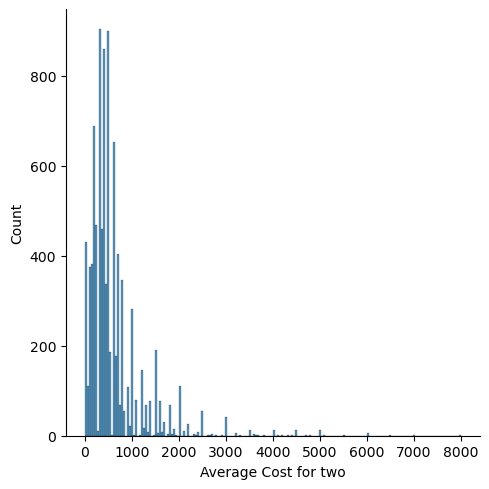

In [502]:
sns.displot(y)

<Axes: >

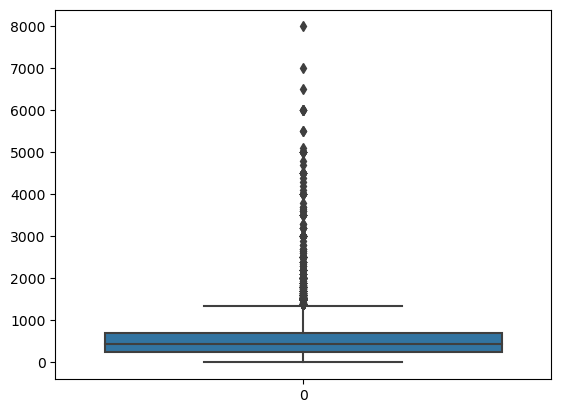

In [503]:
sns.boxplot(y)

In [509]:
data['Average Cost for two']

0       1100
1       1200
2       4000
3       1500
4       1500
        ... 
9377      80
9378     105
9379     170
9380     120
9381      55
Name: Average Cost for two, Length: 9382, dtype: int64

In [510]:
pt.fit_transform(data[['Average Cost for two']])

array([[ 1.11076968],
       [ 1.22888002],
       [ 3.13670201],
       ...,
       [-0.9190211 ],
       [-1.20789759],
       [-1.77314597]])

In [511]:
data['Average Cost for two']

0       1100
1       1200
2       4000
3       1500
4       1500
        ... 
9377      80
9378     105
9379     170
9380     120
9381      55
Name: Average Cost for two, Length: 9382, dtype: int64

In [513]:
tranformed=pt.fit_transform(data[['Average Cost for two']])
tranformed=pd.DataFrame(tranformed,columns=['Tranformed_price'])
tranformed

Tranformed_price
0             1.110770
1             1.228880
2             3.136702
3             1.543040
4             1.543040
...                ...
9377         -1.515051
9378         -1.312395
9379         -0.919021
9380         -1.207898
9381         -1.773146

[9382 rows x 1 columns]

<Axes: >

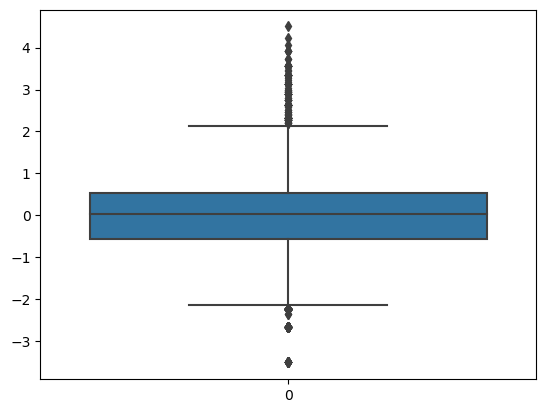

In [514]:
sns.boxplot(tranformed['Tranformed_price'])

In [515]:
#let us use the transformed columns and see the accuracy
y=tranformed['Tranformed_price']

<Axes: xlabel='Tranformed_price', ylabel='Density'>

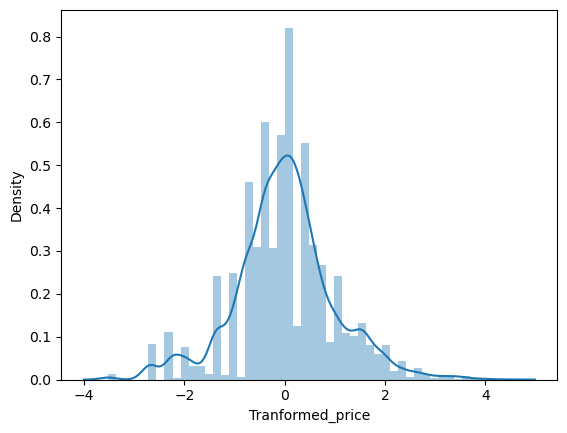

In [517]:
sns.distplot(y)

<Axes: xlabel='Average Cost for two', ylabel='Density'>

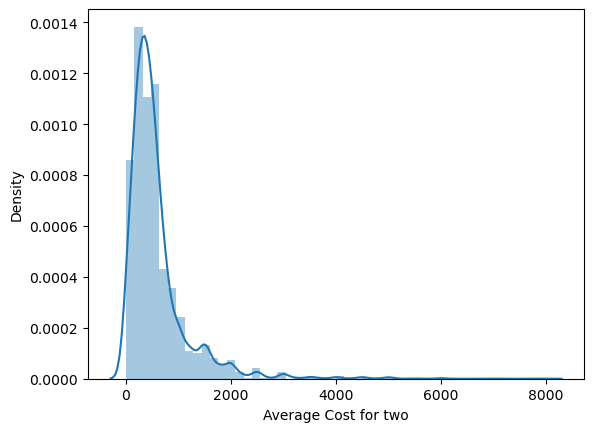

In [518]:
sns.distplot(data['Average Cost for two'])

<Axes: xlabel='Tranformed_price', ylabel='Density'>

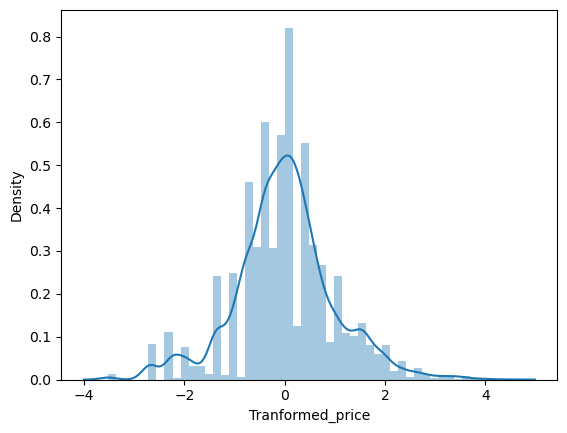

In [520]:
sns.distplot(y)

In [523]:
#Let us build the modelmaxACC=0
maxrs=0
for i in range(1,200):
    lr=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.8656796162200379 94


In [527]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=maxrs)

In [528]:
accuracy={}
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy[model]=r2_score(y_test,pred)
accuracy

{RandomForestRegressor(): 0.9072703582440925,
 ExtraTreesRegressor(): 0.8964284475331983,
 LinearRegression(): 0.8656796162200379,
 GradientBoostingRegressor(): 0.8980417651761168,
 AdaBoostRegressor(): 0.7840158658303258,
 BaggingRegressor(): 0.8967025326057595,
 Ridge(): 0.8648994843855068,
 LassoCV(): 0.8647208039918658,
 DecisionTreeRegressor(): 0.8176066037514953}

In [530]:
#Some improvement is there but not that much we will delete some columns and than se
x1=x.drop(columns='Restaurant Name')

In [531]:
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.8649569155073381 94


In [533]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.3,random_state=maxrs)

In [534]:
accuracy={}
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy[model]=r2_score(y_test,pred)
accuracy

{RandomForestRegressor(): 0.9063256716650919,
 ExtraTreesRegressor(): 0.8947925009263419,
 LinearRegression(): 0.8649569155073381,
 GradientBoostingRegressor(): 0.8981211406766482,
 AdaBoostRegressor(): 0.8193663092742449,
 BaggingRegressor(): 0.897613437175893,
 Ridge(): 0.8648504174757878,
 LassoCV(): 0.8646813929779102,
 DecisionTreeRegressor(): 0.8218865947557997}

In [538]:
x2=x1.drop(columns='Restaurant ID')

In [540]:
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.8634942525651416 94


In [541]:
x_train,x_test,y_train,y_test=train_test_split(x2,y,test_size=0.3,random_state=maxrs)

In [542]:
accuracy={}
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy[model]=r2_score(y_test,pred)
accuracy

{RandomForestRegressor(): 0.8977387479473253,
 ExtraTreesRegressor(): 0.8870078019760418,
 LinearRegression(): 0.8634942525651416,
 GradientBoostingRegressor(): 0.8956243022010542,
 AdaBoostRegressor(): 0.8106139707797104,
 BaggingRegressor(): 0.8853868190843032,
 Ridge(): 0.8627021997270221,
 LassoCV(): 0.8625624165583539,
 DecisionTreeRegressor(): 0.8066834370135771}

In [ ]:
#For the last time i will make the model using the full dataset without deleting anything

In [543]:
full_dataset

ra1  ra2  ra3  ra4  ra5  ra6  col1  col2  col3  col4  col5  de1  de2  \
0     0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0   
1     0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   
3     0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0   
4     0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0   
...   ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ...  ...  ...   
9546  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   
9547  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   
9548  0.0  0.0  1.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   1.0  1.0  0.0   
9549  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   
9550  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   

       b1   b2   d1   d2  cu1  cu2  cu3   c1   c2   c3   c4   c5   c6  code1  \
0     0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0    0.0   
1     0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0   
2     0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0    0.0   
3     1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0   
4     0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...   
9546  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0   
9547  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0    0.0   
9548  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0   
9549  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0   
9550  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0   

      code2  code3  Restaurant ID  City   Address  Locality  Longitude  \
0       0.0    1.0        6317637     2 -0.343878         1   2.498033   
1       0.0    1.0        6304287     2 -0.343878         1   2.497306   
2       0.0    1.0        6300002     4 -0.343878         1   2.499617   
3       0.0    1.0        6318506     4 -0.343878         3   2.499598   
4       0.0    1.0        6314302     4 -0.343878         3   2.499653   
...     ...    ...            ...   ...       ...       ...        ...   
9546    0.0    1.0        5915730    14 -0.343878         4  -1.640540   
9547    0.0    1.0        5908749    14 -0.343878         1  -1.638445   
9548    0.0    1.0        5915807    14 -0.343878         2  -1.638664   
9549    0.0    1.0        5916112    14 -0.343878         2  -1.638619   
9550    0.0    1.0        5927402    14 -0.343878         1  -1.638946   

      Latitude  Average Cost for two  Price range  Aggregate rating     Votes  \
0    -1.602771                  1100            3               4.8  1.191885   
1    -1.603989                  1200            3               4.5  1.507786   
2    -1.601115                  4000            4               4.4  1.116765   
3    -1.600709                  1500            4               4.9  1.266889   
4    -1.600799                  1500            4               4.8  1.034953   
...        ...                   ...          ...               ...       ...   
9546  2.270905                    80            3               4.1  1.652086   
9547  2.268528                   105            3               4.2  1.788687   
9548  2.276969                   170            4               3.7  1.563891   
9549  2.277366                   120            4               4.0  1.719424   
9550  2.263927                    55            2               4.0  1.507786   

      Transformed_outler_no  Restaurant Name  
0                 -0.634799        -0.624754  
1                 -0.634799        -0.624754  
2                 -0.634799        -0.624754  
3                 -0.634799        -0.624754  
4          

In [544]:
x3=full_dataset.drop(columns='Average Cost for two')
y=full_dataset['Average Cost for two']

In [545]:
x3

ra1  ra2  ra3  ra4  ra5  ra6  col1  col2  col3  col4  col5  de1  de2  \
0     0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0   
1     0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   
3     0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0   
4     0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0   
...   ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ...  ...  ...   
9546  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   
9547  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   
9548  0.0  0.0  1.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   1.0  1.0  0.0   
9549  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   
9550  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   

       b1   b2   d1   d2  cu1  cu2  cu3   c1   c2   c3   c4   c5   c6  code1  \
0     0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0    0.0   
1     0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0   
2     0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0    0.0   
3     1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0   
4     0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...   
9546  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0   
9547  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0    0.0   
9548  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0   
9549  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0   
9550  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0   

      code2  code3  Restaurant ID  City   Address  Locality  Longitude  \
0       0.0    1.0        6317637     2 -0.343878         1   2.498033   
1       0.0    1.0        6304287     2 -0.343878         1   2.497306   
2       0.0    1.0        6300002     4 -0.343878         1   2.499617   
3       0.0    1.0        6318506     4 -0.343878         3   2.499598   
4       0.0    1.0        6314302     4 -0.343878         3   2.499653   
...     ...    ...            ...   ...       ...       ...        ...   
9546    0.0    1.0        5915730    14 -0.343878         4  -1.640540   
9547    0.0    1.0        5908749    14 -0.343878         1  -1.638445   
9548    0.0    1.0        5915807    14 -0.343878         2  -1.638664   
9549    0.0    1.0        5916112    14 -0.343878         2  -1.638619   
9550    0.0    1.0        5927402    14 -0.343878         1  -1.638946   

      Latitude  Price range  Aggregate rating     Votes  \
0    -1.602771            3               4.8  1.191885   
1    -1.603989            3               4.5  1.507786   
2    -1.601115            4               4.4  1.116765   
3    -1.600709            4               4.9  1.266889   
4    -1.600799            4               4.8  1.034953   
...        ...          ...               ...       ...   
9546  2.270905            3               4.1  1.652086   
9547  2.268528            3               4.2  1.788687   
9548  2.276969            4               3.7  1.563891   
9549  2.277366            4               4.0  1.719424   
9550  2.263927            2               4.0  1.507786   

      Transformed_outler_no  Restaurant Name  
0                 -0.634799        -0.624754  
1                 -0.634799        -0.624754  
2                 -0.634799        -0.624754  
3                 -0.634799        -0.624754  
4                 -0.634799        -0.624754  
...                     ...              ...  
9546              -0.634799        -0.624754  
9547              -0.634799        -0.624754  
9548              -0.634799        -0.624754  
9549              -0.634799        -0.62

In [546]:
#Just have to encode for the price range again.
a=one_hot.fit_transform(x3[['Price range']])
a=pd.DataFrame(a,columns=['p1','p2','p3','p4'])
x3=pd.concat([a,x3],axis=1)
x3=x3.drop(columns='Price range')
x3.head()

p1   p2   p3   p4  ra1  ra2  ra3  ra4  ra5  ra6  col1  col2  col3  col4  \
0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   
1  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   
2  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   
3  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   
4  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   

   col5  de1  de2   b1   b2   d1   d2  cu1  cu2  cu3   c1   c2   c3   c4   c5  \
0   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0   
1   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0   
2   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0   
3   0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
4   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   

    c6  code1  code2  code3  Restaurant ID  City   Address  Locality  \
0  0.0    0.0    0.0    1.0        6317637     2 -0.343878         1   
1  0.0    0.0    0.0    1.0        6304287     2 -0.343878         1   
2  0.0    0.0    0.0    1.0        6300002     4 -0.343878         1   
3  0.0    0.0    0.0    1.0        6318506     4 -0.343878         3   
4  0.0    0.0    0.0    1.0        6314302     4 -0.343878         3   

   Longitude  Latitude  Aggregate rating     Votes  Transformed_outler_no  \
0   2.498033 -1.602771               4.8  1.191885              -0.634799   
1   2.497306 -1.603989               4.5  1.507786              -0.634799   
2   2.499617 -1.601115               4.4  1.116765              -0.634799   
3   2.499598 -1.600709               4.9  1.266889              -0.634799   
4   2.499653 -1.600799               4.8  1.034953              -0.634799   

   Restaurant Name  
0        -0.624754  
1        -0.624754  
2        -0.624754  
3        -0.624754  
4        -0.624754

In [547]:
x3

p1   p2   p3   p4  ra1  ra2  ra3  ra4  ra5  ra6  col1  col2  col3  \
0     0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   
1     0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   
2     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   
3     0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   
4     0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
9546  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   
9547  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   
9548  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0   0.0   0.0   
9549  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   
9550  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   

      col4  col5  de1  de2   b1   b2   d1   d2  cu1  cu2  cu3   c1   c2   c3  \
0      0.0   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
1      0.0   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0   
2      0.0   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
3      0.0   0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
4      0.0   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
...    ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
9546   0.0   0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0   
9547   0.0   0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
9548   0.0   1.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
9549   0.0   0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0   
9550   0.0   0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0   

       c4   c5   c6  code1  code2  code3  Restaurant ID  City   Address  \
0     0.0  0.0  0.0    0.0    0.0    1.0        6317637     2 -0.343878   
1     0.0  0.0  0.0    0.0    0.0    1.0        6304287     2 -0.343878   
2     1.0  0.0  0.0    0.0    0.0    1.0        6300002     4 -0.343878   
3     0.0  0.0  0.0    0.0    0.0    1.0        6318506     4 -0.343878   
4     0.0  0.0  0.0    0.0    0.0    1.0        6314302     4 -0.343878   
...   ...  ...  ...    ...    ...    ...            ...   ...       ...   
9546  0.0  0.0  0.0    0.0    0.0    1.0        5915730    14 -0.343878   
9547  0.0  0.0  0.0    0.0    0.0    1.0        5908749    14 -0.343878   
9548  0.0  0.0  0.0    0.0    0.0    1.0        5915807    14 -0.343878   
9549  0.0  0.0  0.0    0.0    0.0    1.0        5916112    14 -0.343878   
9550  0.0  0.0  0.0    0.0    0.0    1.0        5927402    14 -0.343878   

      Locality  Longitude  Latitude  Aggregate rating     Votes  \
0            1   2.498033 -1.602771               4.8  1.191885   
1            1   2.497306 -1.603989               4.5  1.507786   
2            1   2.499617 -1.601115               4.4  1.116765   
3            3   2.499598 -1.600709               4.9  1.266889   
4            3   2.499653 -1.600799               4.8  1.034953   
...        ...        ...       ...               ...       ...   
9546         4  -1.640540  2.270905               4.1  1.652086   
9547         1  -1.638445  2.268528               4.2  1.788687   
9548         2  -1.638664  2.276969               3.7  1.563891   
9549         2  -1.638619  2.277366               4.0  1.719424   
9550         1  -1.638946  2.263927               4.0  1.507786   

      Transformed_outler_no  Restaurant Name  
0                 -0.634799        -0.624754  
1                 -0.634799        -0.624754  
2                 -0.634799        -0.624754  
3                 -0.634799        -0.624754  
4                 -0.634799        -0.624754  
...                     ...              ...  
9546              -0.634799        -0.624754  
9547              -0.634799        -0.624754  
9548

In [548]:
#let us do the stamdardization
continous_scales=scaler.fit_transform(x3[continous_columns])
continous_scales=pd.DataFrame(continous_scales,columns=continous_columns)
continous_scales

Restaurant ID      City   Address  Locality  Longitude  Latitude  \
0         -0.310940 -1.399609 -0.343878 -1.316759   2.498033 -1.602771   
1         -0.312458 -1.399609 -0.343878 -1.316759   2.497306 -1.603989   
2         -0.312946 -1.398785 -0.343878 -1.316759   2.499617 -1.601115   
3         -0.310841 -1.398785 -0.343878 -1.246585   2.499598 -1.600709   
4         -0.311319 -1.398785 -0.343878 -1.246585   2.499653 -1.600799   
...             ...       ...       ...       ...        ...       ...   
9546      -0.356658 -1.394665 -0.343878 -1.211498  -1.640540  2.270905   
9547      -0.357452 -1.394665 -0.343878 -1.316759  -1.638445  2.268528   
9548      -0.356649 -1.394665 -0.343878 -1.281672  -1.638664  2.276969   
9549      -0.356614 -1.394665 -0.343878 -1.281672  -1.638619  2.277366   
9550      -0.355330 -1.394665 -0.343878 -1.316759  -1.638946  2.263927   

      Aggregate rating     Votes  Transformed_outler_no  Restaurant Name  
0             1.407131  1.191885              -0.634799        -0.624754  
1             1.209281  1.507786              -0.634799        -0.624754  
2             1.143331  1.116765              -0.634799        -0.624754  
3             1.473081  1.266889              -0.634799        -0.624754  
4             1.407131  1.034953              -0.634799        -0.624754  
...                ...       ...                    ...              ...  
9546          0.945480  1.652086              -0.634799        -0.624754  
9547          1.011430  1.788687              -0.634799        -0.624754  
9548          0.681680  1.563891              -0.634799        -0.624754  
9549          0.879530  1.719424              -0.634799        -0.624754  
9550          0.879530  1.507786              -0.634799        -0.624754  

[9551 rows x 10 columns]

In [550]:
x3=x3.drop(columns=continous_columns)

In [552]:
x3=pd.concat([x3,continous_scales],axis=1)
x3.head()

p1   p2   p3   p4  ra1  ra2  ra3  ra4  ra5  ra6  col1  col2  col3  col4  \
0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   
1  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   
2  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   
3  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   
4  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   

   col5  de1  de2   b1   b2   d1   d2  cu1  cu2  cu3   c1   c2   c3   c4   c5  \
0   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0   
1   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0   
2   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0   
3   0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
4   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   

    c6  code1  code2  code3  Restaurant ID      City   Address  Locality  \
0  0.0    0.0    0.0    1.0      -0.310940 -1.399609 -0.343878 -1.316759   
1  0.0    0.0    0.0    1.0      -0.312458 -1.399609 -0.343878 -1.316759   
2  0.0    0.0    0.0    1.0      -0.312946 -1.398785 -0.343878 -1.316759   
3  0.0    0.0    0.0    1.0      -0.310841 -1.398785 -0.343878 -1.246585   
4  0.0    0.0    0.0    1.0      -0.311319 -1.398785 -0.343878 -1.246585   

   Longitude  Latitude  Aggregate rating     Votes  Transformed_outler_no  \
0   2.498033 -1.602771          1.407131  1.191885              -0.634799   
1   2.497306 -1.603989          1.209281  1.507786              -0.634799   
2   2.499617 -1.601115          1.143331  1.116765              -0.634799   
3   2.499598 -1.600709          1.473081  1.266889              -0.634799   
4   2.499653 -1.600799          1.407131  1.034953              -0.634799   

   Restaurant Name  
0        -0.624754  
1        -0.624754  
2        -0.624754  
3        -0.624754  
4        -0.624754

In [555]:
#let us make the model
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(x3,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.1440571503499365 188


In [556]:
x_train,x_test,y_train,y_test=train_test_split(x3,y,test_size=0.3,random_state=maxrs)

In [557]:
accuracy={}
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy[model]=r2_score(y_test,pred)
accuracy

{RandomForestRegressor(): -0.41630542559732686,
 ExtraTreesRegressor(): -0.1074938437330688,
 LinearRegression(): 0.1440571503499365,
 GradientBoostingRegressor(): -0.2886960335062534,
 AdaBoostRegressor(): -0.33954091751408355,
 BaggingRegressor(): -0.7184043887588993,
 Ridge(): 0.1439627572942922,
 LassoCV(): 0.1418189281826634,
 DecisionTreeRegressor(): -0.7627911128343907}

In [ ]:
#All the model collapsed here let us try for the transformed column

In [567]:
a=pt.fit_transform(full_dataset[['Average Cost for two']])

In [568]:
a=pd.DataFrame(a,columns=['transformed_label'])
a

transformed_label
0              0.974401
1              1.060687
2              2.302484
3              1.284065
4              1.284065
...                 ...
9546          -1.416818
9547          -1.187274
9548          -0.769920
9549          -1.072964
9550          -1.725820

[9551 rows x 1 columns]

In [569]:
y=a['transformed_label']

In [570]:
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(x3,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.7975906369365742 154


In [571]:
x_train,x_test,y_train,y_test=train_test_split(x3,y,test_size=0.3,random_state=maxrs)

In [572]:
accuracy={}
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy[model]=r2_score(y_test,pred)
accuracy

{RandomForestRegressor(): 0.8752158253681489,
 ExtraTreesRegressor(): 0.86650727638497,
 LinearRegression(): 0.7975906369365742,
 GradientBoostingRegressor(): 0.8847597116144109,
 AdaBoostRegressor(): 0.809147482218056,
 BaggingRegressor(): 0.8702177354836025,
 Ridge(): 0.7974646428343038,
 LassoCV(): 0.7977455706904214,
 DecisionTreeRegressor(): 0.7689832204127632}

In [573]:
#No use it is better to use the dataset with no outliers so let us use that only and conclude.

In [575]:
x=data.drop(columns='Average Cost for two')
y=data['Average Cost for two']

In [576]:
x

ra1  ra2  ra3  ra4  ra5  ra6  col1  col2  col3  col4  col5  de1  de2  \
0     0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0   
1     0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0   
2     0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   
3     0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0   
4     0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   0.0  1.0  0.0   
...   ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ...  ...  ...   
9377  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   
9378  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   
9379  0.0  0.0  1.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   1.0  1.0  0.0   
9380  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   
9381  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   0.0  1.0  0.0   

       b1   b2   d1   d2  cu1  cu2  cu3   c1   c2   c3   c4   c5   c6  code1  \
0     0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0    0.0   
1     0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0   
2     0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0    0.0   
3     1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0   
4     0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...   
9377  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0   
9378  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0    0.0   
9379  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0    0.0   
9380  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0   
9381  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0    0.0   

      code2  code3  Restaurant ID  City   Address  Locality  Longitude  \
0       0.0    1.0        6317637     2 -0.343878         1   2.498033   
1       0.0    1.0        6304287     2 -0.343878         1   2.497306   
2       0.0    1.0        6300002     4 -0.343878         1   2.499617   
3       0.0    1.0        6318506     4 -0.343878         3   2.499598   
4       0.0    1.0        6314302     4 -0.343878         3   2.499653   
...     ...    ...            ...   ...       ...       ...        ...   
9377    0.0    1.0        5915730    14 -0.343878         4  -1.640540   
9378    0.0    1.0        5908749    14 -0.343878         1  -1.638445   
9379    0.0    1.0        5915807    14 -0.343878         2  -1.638664   
9380    0.0    1.0        5916112    14 -0.343878         2  -1.638619   
9381    0.0    1.0        5927402    14 -0.343878         1  -1.638946   

      Latitude  Price range  Aggregate rating     Votes  \
0    -1.602771            3               4.8  1.191885   
1    -1.603989            3               4.5  1.507786   
2    -1.601115            4               4.4  1.116765   
3    -1.600709            4               4.9  1.266889   
4    -1.600799            4               4.8  1.034953   
...        ...          ...               ...       ...   
9377  2.270905            3               4.1  1.652086   
9378  2.268528            3               4.2  1.788687   
9379  2.276969            4               3.7  1.563891   
9380  2.277366            4               4.0  1.719424   
9381  2.263927            2               4.0  1.507786   

      Transformed_outler_no  Restaurant Name  
0                 -0.634799        -0.624754  
1                 -0.634799        -0.624754  
2                 -0.634799        -0.624754  
3                 -0.634799        -0.624754  
4                 -0.634799        -0.624754  
...                     ...              ...  
9377              -0.634799        -0.624754  
9378              -0.634799        -0.624754  
9379              -0.634799        -0.624754  
9380              -0.634799        -0.62

In [577]:
a=one_hot.fit_transform(x[['Price range']])
a=pd.DataFrame(a,columns=['p1','p2','p3','p4'])
x=pd.concat([a,x],axis=1)
x=x.drop(columns='Price range')
x.head()

p1   p2   p3   p4  ra1  ra2  ra3  ra4  ra5  ra6  col1  col2  col3  col4  \
0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   
1  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   
2  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   0.0   
3  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   
4  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   0.0   

   col5  de1  de2   b1   b2   d1   d2  cu1  cu2  cu3   c1   c2   c3   c4   c5  \
0   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0   
1   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0   
2   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0   
3   0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   
4   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0   

    c6  code1  code2  code3  Restaurant ID  City   Address  Locality  \
0  0.0    0.0    0.0    1.0        6317637     2 -0.343878         1   
1  0.0    0.0    0.0    1.0        6304287     2 -0.343878         1   
2  0.0    0.0    0.0    1.0        6300002     4 -0.343878         1   
3  0.0    0.0    0.0    1.0        6318506     4 -0.343878         3   
4  0.0    0.0    0.0    1.0        6314302     4 -0.343878         3   

   Longitude  Latitude  Aggregate rating     Votes  Transformed_outler_no  \
0   2.498033 -1.602771               4.8  1.191885              -0.634799   
1   2.497306 -1.603989               4.5  1.507786              -0.634799   
2   2.499617 -1.601115               4.4  1.116765              -0.634799   
3   2.499598 -1.600709               4.9  1.266889              -0.634799   
4   2.499653 -1.600799               4.8  1.034953              -0.634799   

   Restaurant Name  
0        -0.624754  
1        -0.624754  
2        -0.624754  
3        -0.624754  
4        -0.624754

In [578]:
x

p1   p2   p3   p4  ra1  ra2  ra3  ra4  ra5  ra6  col1  col2  col3  \
0     0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   
1     0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   
2     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   
3     0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   
4     0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0   1.0   0.0   0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
9377  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   
9378  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   
9379  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0   0.0   0.0   0.0   
9380  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   
9381  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   0.0   1.0   0.0   

      col4  col5  de1  de2   b1   b2   d1   d2  cu1  cu2  cu3   c1   c2   c3  \
0      0.0   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
1      0.0   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0   
2      0.0   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
3      0.0   0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
4      0.0   0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
...    ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
9377   0.0   0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0   
9378   0.0   0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
9379   0.0   1.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   
9380   0.0   0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0   
9381   0.0   0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0   

       c4   c5   c6  code1  code2  code3  Restaurant ID  City   Address  \
0     0.0  0.0  0.0    0.0    0.0    1.0        6317637     2 -0.343878   
1     0.0  0.0  0.0    0.0    0.0    1.0        6304287     2 -0.343878   
2     1.0  0.0  0.0    0.0    0.0    1.0        6300002     4 -0.343878   
3     0.0  0.0  0.0    0.0    0.0    1.0        6318506     4 -0.343878   
4     0.0  0.0  0.0    0.0    0.0    1.0        6314302     4 -0.343878   
...   ...  ...  ...    ...    ...    ...            ...   ...       ...   
9377  0.0  0.0  0.0    0.0    0.0    1.0        5915730    14 -0.343878   
9378  0.0  0.0  0.0    0.0    0.0    1.0        5908749    14 -0.343878   
9379  0.0  0.0  0.0    0.0    0.0    1.0        5915807    14 -0.343878   
9380  0.0  0.0  0.0    0.0    0.0    1.0        5916112    14 -0.343878   
9381  0.0  0.0  0.0    0.0    0.0    1.0        5927402    14 -0.343878   

      Locality  Longitude  Latitude  Aggregate rating     Votes  \
0            1   2.498033 -1.602771               4.8  1.191885   
1            1   2.497306 -1.603989               4.5  1.507786   
2            1   2.499617 -1.601115               4.4  1.116765   
3            3   2.499598 -1.600709               4.9  1.266889   
4            3   2.499653 -1.600799               4.8  1.034953   
...        ...        ...       ...               ...       ...   
9377         4  -1.640540  2.270905               4.1  1.652086   
9378         1  -1.638445  2.268528               4.2  1.788687   
9379         2  -1.638664  2.276969               3.7  1.563891   
9380         2  -1.638619  2.277366               4.0  1.719424   
9381         1  -1.638946  2.263927               4.0  1.507786   

      Transformed_outler_no  Restaurant Name  
0                 -0.634799        -0.624754  
1                 -0.634799        -0.624754  
2                 -0.634799        -0.624754  
3                 -0.634799        -0.624754  
4                 -0.634799        -0.624754  
...                     ...              ...  
9377              -0.634799        -0.624754  
9378              -0.634799        -0.624754  
9379

In [579]:
#And we will be using the transformed label in this process we had the best accuracy so let us proceed
b=pt.fit_transform(data[['Average Cost for two']])

In [580]:
b=pd.DataFrame(b,columns=['transformed_label'])
b

transformed_label
0              1.110770
1              1.228880
2              3.136702
3              1.543040
4              1.543040
...                 ...
9377          -1.515051
9378          -1.312395
9379          -0.919021
9380          -1.207898
9381          -1.773146

[9382 rows x 1 columns]

In [582]:
y=b['transformed_label']

In [583]:
y

0       1.110770
1       1.228880
2       3.136702
3       1.543040
4       1.543040
          ...   
9377   -1.515051
9378   -1.312395
9379   -0.919021
9380   -1.207898
9381   -1.773146
Name: transformed_label, Length: 9382, dtype: float64

In [584]:
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.865138841688013 75


In [586]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=maxrs)

In [587]:
accuracy={}
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy[model]=r2_score(y_test,pred)
accuracy

{RandomForestRegressor(): 0.9065880961100936,
 ExtraTreesRegressor(): 0.8918296018768458,
 LinearRegression(): 0.865138841688013,
 GradientBoostingRegressor(): 0.9007107504653364,
 AdaBoostRegressor(): 0.8228896871594701,
 BaggingRegressor(): 0.8947751229587436,
 Ridge(): 0.8653259504173276,
 LassoCV(): 0.060242724194959685,
 DecisionTreeRegressor(): 0.8289709575970636}

In [589]:
#Cross validation
from sklearn.model_selection import cross_val_score
for model in models:
    print(model,',',cross_val_score(model,x,y,cv=5).mean())
#We will proceed for the tuning for the model with the best score

RandomForestRegressor() , 0.6435720293918141
ExtraTreesRegressor() , 0.6501479987459107
LinearRegression() , 0.7630559680953694
GradientBoostingRegressor() , 0.7105937314105192
AdaBoostRegressor() , 0.641619038022025
BaggingRegressor() , 0.6600597384788687
Ridge() , 0.7629439641024305
LassoCV() , -0.039634817841475954
DecisionTreeRegressor() , 0.45481768721160065


In [591]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [ 0.1, 0.05],
    'max_depth': [3, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [ 'sqrt', 'log2']
}

# Create a GradientBoostingRegressor instance
gbr = GradientBoostingRegressor()


grid_search_gbr = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)


grid_search_gbr.fit(x,y)


best_params = grid_search_gbr.best_params_
best_score = grid_search_gbr.best_score_

print("Best Parameters:", best_params)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [593]:
model_reg=GradientBoostingRegressor(learning_rate=0.1,max_depth=3,max_features='sqrt',min_samples_leaf=2,
                                   min_samples_split=5,n_estimators=20)

In [598]:
model_reg.fit(x_train,y_train)
pred=model_reg.predict(x_test)
r2_score(y_test,pred)

0.9007678835947976

In [599]:
#So this is the model with the best accuracy for the regression tak let us save this
mean_absolute_error(y_test,pred)

0.2351706166989455

In [600]:
mean_squared_error(y_test,pred)

0.10003684855627662

In [601]:
joblib.dump(model_reg,'reg')

['reg']

In [602]:
from sklearn.linear_model import Ridge,RidgeCV

In [605]:
r=RidgeCV()

In [606]:
r.fit(x_train,y_train)
pred=r.predict(x_test)

In [607]:
r2_score(y_test,pred)

-620044.3922106498

In [608]:
r.alpha_

1.0

In [ ]:
Ridge()

In [609]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define the parameter grid
param_grid ={
    'fit_intercept': [True, False],
    'max_iter': [None, 1000, 2000],
    'tol': [0.0001, 0.001, 0.01],
    'solver': ['auto', 'svd', 'cholesky'],
    'random_state': [None, 42]
}

# Create a Ridge instance
ridge = Ridge(alpha=r.alpha_)

grid_search_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

grid_search_ridge.fit(x, y)

best_params = grid_search_ridge.best_params_
best_score = grid_search_ridge.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'fit_intercept': False, 'max_iter': None, 'random_state': None, 'solver': 'svd', 'tol': 0.0001}
Best Score: -0.23743028341377995


In [611]:
r=Ridge(fit_intercept=False,max_iter=None,random_state=None,solver='svd',tol=0.0001)

In [612]:
r.fit(x_train,y_train)

Ridge(fit_intercept=False, solver='svd')

In [613]:
pred=r.predict(x_test)

In [614]:
r2_score(y_test,pred)

0.8653229753937767

The ridge also gave us 0.86 score but not as high as gradient boost.

In [615]:
#The best model which is the gradient boost
model_reg.fit(x_train,y_train)
pred=model_reg.predict(x_test)
r2_score(y_test,pred)

0.9007105458461554

In [ ]:
#The label we used was the transformed so let us see the real prediction as compared to the real one

In [622]:
y_test.reset_index(drop=True,inplace=True)

In [628]:
y_test

0       0.351722
1       0.143791
2       0.351722
3       3.136702
4      -0.393335
          ...   
2810    0.143791
2811    1.812225
2812   -0.775782
2813    0.618659
2814    0.445865
Name: transformed_label, Length: 2815, dtype: float64

In [630]:
test=[]
for i in y_test:
    test.append(i)

In [636]:
prediction=[]
for i in pred:
    prediction.append(i)

In [659]:
#prediction and real for the transformed label
predict={'Prediction':prediction,
        'Real':test}

In [676]:
predict=pd.DataFrame(predict)
predict

Prediction      Real
0       0.452030  0.351722
1       0.314056  0.143791
2       0.255524  0.351722
3       3.411255  3.136702
4      -0.471338 -0.393335
5       0.352342  0.143791
6       0.441338  0.534624
7      -0.232056 -0.393335
8       0.364393  0.445865
9      -0.609864 -0.238020
10     -0.502712 -0.393335
11      0.323281  0.445865
12      1.481485  1.726592
13     -0.947027 -1.349745
14      2.457646  2.741284
15     -0.584564 -1.349745
16      0.379744  0.534624
17     -0.906016 -1.349745
18     -0.545367 -0.098828
19      2.313129  1.973114
20      0.476852  0.351722
21     -0.699671 -0.775782
22      0.328954  0.445865
23      0.472564  0.143791
24      1.353186  0.984135
25     -0.251328 -0.393335
26      1.440437  1.228880
27     -0.418185 -0.569865
28     -0.943105 -0.775782
29     -0.230319 -0.393335
30     -0.266158 -0.098828
31      0.390902  0.143791
32      0.367666  0.351722
33     -0.267081 -0.098828
34     -0.762299 -0.393335
35      0.282255  0.351722
36     -0.265663 -0.393335
37     -0.553799 -0.393335
38     -0.637474 -0.393335
39      0.289234 -0.098828
40     -0.561839 -0.393335
41      0.295855  0.143791
42      0.374171  0.534624
43     -0.482867 -0.775782
44     -0.364626 -0.098828
45      1.393912  1.726592
46     -0.318913 -0.393335
47     -0.574069 -0.775782
48      1.332160  1.543040
49      1.005252  0.984135
50      2.426362  2.327275
51      2.572274  2.897599
52     -1.109696 -3.518210
53     -0.939874 -1.025612
54     -0.528812 -1.349745
55     -0.255244 -0.098828
56     -0.580702 -0.393335
57     -0.529453 -0.569865
58      0.371897  0.143791
59     -0.437392 -0.393335
60     -0.668959 -0.569865
61     -0.526923 -0.569865
62      1.164101  1.339683
63      0.437415  0.774636
64     -0.489811 -0.098828
65     -0.863357 -0.775782
66      1.202298  1.894291
67      2.610420  4.071925
68     -1.568936 -1.835079
69     -0.515271 -0.569865
70     -2.256741 -2.243304
71     -0.523225 -0.098828
72      0.643984  0.698513
73      0.476344  0.143791
74      1.455764  1.637013
75     -0.175872 -0.098828
76      0.363100  0.143791
77      0.301929  0.251374
78      0.438721  0.351722
79     -0.489649 -0.393335
80     -0.407266 -0.098828
81      0.299408  0.351722
82      0.269075  0.351722
83      0.424858  0.143791
84     -2.699253 -2.679116
85     -2.181331 -2.243304
86     -0.475260 -0.775782
87      0.420887  0.143791
88      0.378011  0.143791
89     -0.587346 -1.349745
90      0.709820  0.351722
91     -0.562503  0.027643
92     -0.280039  0.027643
93     -0.396953  0.027643
94     -0.509044 -0.238020
95      1.462941  1.444143
96     -0.920392 -1.349745
97      0.427239  0.445865
98      0.630124  0.143791
99     -0.396745 -0.238020
100    -0.480541 -0.569865
101     0.358282  0.143791
102     0.431035  0.534624
103    -0.643889 -0.569865
104    -0.553301 -1.349745
105     0.431891  0.698513
106    -0.654623 -1.835079
107     0.625079  0.698513
108    -0.472498 -0.569865
109    -0.617525 -1.349745
110    -0.883226 -0.689164
111     1.148973  1.339683
112    -0.584004 -1.025612
113    -0.301182 -0.238020
114     0.436937  0.445865
115    -0.630683 -0.569865
116    -0.652662 -1.349745
117     1.003386  1.543040
118     0.341095  0.445865
119    -1.509474 -1.428912
120     1.031658  1.637013
121    -0.504123 -0.775782
122     0.337066  0.143791
123     0.379690  0.251374
124    -0.427566 -0.238020
125    -0.517813 -0.238020
126     0.227336  0.143791
127    -0.514661 -1.025612
128    -0.484855 -0.393335
129    -2.722024 -2.679116
130    -0.426188 -0.393335
131     1.501613  1.934089
132    -0.350033 -1.025612
133    -0.652834 -0.775782
134    -0.316332 -0.569865
135    -0.403505  0.027643
136    -0.439491 -1.025612
137     0.346067  0.351722
138     0.359727  0.143791
139    -0.446513 -1.349745
140     0.411945  0.534624
141     2.273338  1.973114
142    -0.455170 -0.775782
143    -0.404349 -0.098828
144    -0.527190 -1.349745
145    -0.717709 -1.349745
146    -0.384020 -0.775782
147    -0.

In [654]:
Pred=pt.inverse_transform(predict[['Average Cost for two']])

In [657]:
real=pt.inverse_transform(predict[['Average Cost for two']])

In [667]:
Pred=pd.DataFrame(Pred)

In [668]:
real=pd.DataFrame(real)

In [671]:
Pred.columns=['Predicted']

In [672]:
real.columns=['Actual']

In [677]:
pd.concat([Pred['Predicted'],real['Actual']],axis=1)

Predicted  Actual
0      653.381866   600.0
1      580.841517   500.0
2      552.002155   600.0
3     4639.655717  4000.0
4      277.047680   300.0
5      600.319375   500.0
6      647.524799   700.0
7      352.038846   300.0
8      606.552714   650.0
9      239.614544   350.0
10     268.204306   300.0
11     585.489966   650.0
12    1437.138936  1700.0
13     164.559676   100.0
14    2706.289049  3200.0
15     246.144351   100.0
16     614.563700   700.0
17     172.572327   100.0
18     256.528173   400.0
19    2478.361687  2000.0
20     667.134215   600.0
21     217.495998   200.0
22     588.362863   650.0
23     664.742530   500.0
24    1312.609446  1000.0
25     345.482644   300.0
26    1396.354625  1200.0
27     292.536267   250.0
28     165.313564   200.0
29     352.634610   300.0
30     340.501492   400.0
31     620.437504   500.0
32     608.253864   600.0
33     340.193356   400.0
34     203.018345   300.0
35     565.033660   600.0
36     340.666915   300.0
37     254.266697   300.0
38     232.639993   300.0
39     568.474471   400.0
40     252.124815   300.0
41     571.753291   500.0
42     611.646219   700.0
43     273.772555   200.0
44     308.802859   400.0
45    1351.205398  1700.0
46     323.224829   300.0
47     248.892675   200.0
48    1293.015462  1500.0
49    1016.171877  1000.0
50    2655.642222  2500.0
51    2898.215376  3500.0
52     135.529034     0.0
53     165.936418   150.0
54     261.012901   100.0
55     344.161993   400.0
56     247.152952   300.0
57     260.837952   250.0
58     610.458624   500.0
59     286.865046   300.0
60     224.876729   250.0
61     261.528184   250.0
62    1144.330218  1300.0
63     645.386311   850.0
64     271.814193   400.0
65     181.218696   200.0
66    1176.910604  1900.0
67    2964.339042  6500.0
68      74.187051    50.0
69     264.725097   250.0
70      24.381189    25.0
71     262.539750   400.0
72     765.590236   800.0
73     666.850443   500.0
74    1411.478378  1600.0
75     371.695465   400.0
76     605.881095   500.0
77     574.774312   550.0
78     646.097439   600.0
79     271.859927   300.0
80     295.798304   400.0
81     573.518660   600.0
82     558.579065   600.0
83     638.576629   500.0
84       9.523741    10.0
85      28.005152    25.0
86     275.930203   200.0
87     636.434654   500.0
88     613.655273   500.0
89     245.419873   100.0
90     807.280977   600.0
91     251.948437   450.0
92     335.888820   450.0
93     298.904330   450.0
94     266.445976   350.0
95    1418.602497  1400.0
96     169.730581   100.0
97     639.863720   650.0
98     757.027544   500.0
99     298.967415   350.0
100    274.430957   250.0
101    603.385581   500.0
102    641.919284   700.0
103    231.041870   250.0
104    254.400052   100.0
105    642.383956   800.0
106    228.386588    50.0
107    753.928522   800.0
108    276.716974   250.0
109    237.663568   100.0
110    177.151447   220.0
111   1131.618856  1300.0
112    246.290406   150.0
113    328.955018   350.0
114    645.126096   650.0
115    234.340905   250.0
116    228.870120   100.0
117   1014.734707  1500.0
118    594.546782   650.0
119     80.620651    90.0
120   1036.675037  1600.0
121    267.811620   200.0
122    592.489075   500.0
123    614.535246   550.0
124    289.755829   350.0
125    264.025138   350.0
126    538.510440   500.0
127    264.893294   150.0
128    273.210805   300.0
129      9.004384    10.0
130    290.163075   300.0
131   1457.467307  1950.0
132    313.352301   150.0
133    228.827501   200.0
134    324.054264   250.0
135    296.928099   450.0
136    286.250546   150.0
137    597.093296   600.0
138    604.133057   500.0
139    284.201650   100.0
140    631.631275   700.0
141   2418.267551  2000.0
142    281.691134   200.0
143    296.674175   400.0
144    261.455322   100.0
145    213.248083   100.0
146    302.834876   200.0
147    209.113477   150.0
148    265.065749   450.0
149    266.868449   400.0
150    286.851500   250.0
151    315.821450   300.0
152    681.618456   700.0
153 

In [675]:
pd.set_option('display.max_rows',None)

So we can see the differences between the actual and the predicted hence we completed this project and below are the conclusions for this project.

Conclusions.(for classification part where we predicted the price range of the restaurants):-
1.At first we need to do a lot of preprocessing of the feature columns as there were a lot of categorical columns which needed to be encoded accordingly. So at first we treated all the columns accordingly and made them suitable for the model buiding process. After that we treated the outliers for the continous columns and deleted the outliers. In the last we separated the 
label and the feature columns and started building the classification model

2.For the classification task we made the models in 3 ways:-
  1.In the first technique we made the model without considering the multicollinearity and the variance inflation factor score 
  and mde the model using all the feature columns. In this way also some models like the random forest, gradient boost gave us
  a great accuracy and the best accuracy was of the gradient boost which was 96%.
  
  2.In the second time we deleted the columns with high vif scores and this resulted in a better accuracy. This time each model
  performed better than the previous one and we got the best accuracy of 98% which was of the gradient boost and after the
  tuning this gave us an accuracy of 98.2% which was the best model for us for the classificatin part

3.The best model was the gradient boost classifier where we deleted the feature column with high variance inflation score and
also we used the transformed average cost column as it had a very high skewness so this is why we had to use the transformed column for this.

Conclusions.(for regression part where we predicted the average cost of the restaurants):-
1.The preprocessing was the same for this task also . They only difference was that this time the label was the average cost column and the price range column was the feature this time. So what we did is we deleted this time the average cost from the dataset and encoded the price range column accordingly and than we started building the model.

2.This time also we made the model using many techniques:-
  1.At first we made the model using all the feature columns after treating and deleting the outliers. And model performed well
  in this case also with randomforest regressor with the best accuracy of 87%.
  
  2.After that we deleted the columns with high correlation and this resulted in a slight better accuracy.
  
  3.In the last we used the transformed label because the actual default label was having a very high skewness and it had a 
  very high no of outliers and this resulted in a very good accuracy. The best performing model was the gradientboost
  regressor with an accuracy of 90.1% after the tuning and this ws 3% more than the previous best.
  
3.The best performing model was the gradient boost regressor with an r2_Score of 90.1%. And in this model we deleted the 
feature columns with very high correlation and we used the transformed label which resulted in a extra 3% accuracy.
this model had an mean abolute error of 0.2351706166989455   and mean squared error of 0.1000 respectively.

In the last we also converted the label and the prediction to the actual form to see the actual difference between our prediction and the actual values.

------------------------------------------This concludes this project-----------------------------------------------------------

In [11]:
print('*'*127)
print('                                                      THANKS')
print('*'*127)

*******************************************************************************************************************************
                                                      THANKS
*******************************************************************************************************************************
